# 2022 Axios Harris Poll

The Datset is from [TidyTuesday](https://github.com/rfordatascience/tidytuesday/tree/master/data/2022/2022-05-31)

This survey is the result of a partnership between Axios and Harris Poll to gauge the reputation of the most visible brands in America, based on 20 years of Harris Poll research. From Trader Joe's to Disney, here's how this year's class stacks up.

Methodology: The Axios Harris Poll 100 is based on a survey of 33,096 Americans in a nationally representative sample conducted March 11-April 3, 2022. The two-step process starts fresh each year by surveying the public’s top-of-mind awareness of companies that either excel or falter in society.

These 100 “most visible companies” are then ranked by a second group of Americans across the seven key dimensions of reputation to arrive at the ranking. If a company is not on the list, it did not reach a critical level of visibility to be measured.

Phase 1

In February 2022, The Harris Poll fielded three rounds of “nominations” among a nationally representative sample of Americans to determine which companies were top-of-mind for the public. Respondents were asked which two companies they think have the best reputation and which two have the worst reputation. Both sets of nominations were then combined into a single list, with subsidiaries and brands tallied added to their parent organizations. The 100 companies with the most nominations were then selected to be on the ‘Most Visible’ list.

Phase 2

The ”ratings” phase of the survey was conducted among 33,096 online interviews from March 11th to April 2nd, 2022 among a nationally representative sample of U.S. adults. Respondents were randomly assigned two companies to rate for which they answered they were very or somewhat familiar with. Each company received approximately 325 ratings. An RQ score is calculated by: [ (Sum of ratings of each of the 9 attributes)/(the total number of attributes answered x 7) ] x 100. Score ranges: 80 & above: Excellent | 75-79: Very Good | 70-74: Good | 65-69: Fair | 55-64: Poor | 50-54: Very Poor | Below 50: Critical

For more details visit below links

[Axios And Harris Poll](https://www.axios.com/2022/05/24/2022-axios-harris-poll-100-rankings)

[The Harris Poll Overview](https://theharrispoll.com/partners/media/axios-harrispoll-100/)

In [84]:
library(tidyverse)
library(paletteer)
library(mice)
library(showtext)
library(patchwork)
library(naniar)
library(tidytext)
library(reshape2)
library(ggrepel)
library(ggtext)
library(lubridate)
library(janitor)
library(ggbump)
library(cowplot)

library(repr)
options(repr.plot.width = 20, repr.plot.height =13)

In [85]:
font_add_google('Fira Sans', 'firasans')
showtext_auto()

In [86]:
my_theme <- function() {
  
  # Colors
  color.background = "#F2F2F2"
  color.text = "#030303"
  
  # Begin construction of chart
  theme_bw(base_size=15) +
    
    # Format background colors
    theme(panel.background = element_rect(fill=color.background, color=color.background)) +
    theme(plot.background  = element_rect(fill=color.background, color=color.background)) +
    theme(panel.border     = element_rect(color=color.background)) +
    theme(strip.background = element_rect(fill=color.background, color=color.background)) +
    
    # Format the grid
    theme(panel.grid.major.y = element_blank()) +
    theme(panel.grid.minor.y = element_blank()) +
    theme(panel.grid.major.x = element_blank())+
    theme(panel.grid.minor.x = element_blank()) +
    theme(axis.ticks       = element_blank()) +
    
    # Format the legend
    theme(legend.position = "right") +
    theme(legend.background = element_rect(fill=color.background, color=color.background))+
    theme(legend.text = element_text(size = 25, face = "bold", color=color.text))+
    theme(legend.justification = "center")+
    theme(legend.title = element_text(family = "firasans",
                                    color = "#030303",
                                    size = 25, face = "bold"))+
    
    # Format title and axis labels
    theme(plot.title       = element_text(color=color.text, size=40, face = "bold", hjust = 0.5, family = 'firasans'))+
    theme(plot.subtitle    = element_text(color=color.text, size=30, face = "bold", hjust = 0.5, family = 'firasans'))+
    theme(plot.caption     = element_text(color=color.text, size=20, face = "bold", hjust = 0.5, family = 'firasans'))+
    theme(axis.title.x     = element_text(size=20, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'firasans')) +
    theme(axis.title.y     = element_text(size=20, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'firasans')) +
    theme(axis.text.x      = element_text(size=25, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'firasans')) +
    theme(axis.text.y      = element_text(size=25, color = color.text, face = "bold", family = 'firasans')) +
    theme(strip.text       = element_text(size=25, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'firasans')) +
    
     # Plot margins
    theme(plot.margin = unit(c(0.35, 0.2, 0.3, 0.35), "cm"))
}

In [87]:
poll <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-31/poll.csv')
reputation <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-31/reputation.csv')

Rows: 500 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): company, industry
dbl (6): 2022_rank, 2022_rq, change, year, rank, rq

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 700 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): company, industry, name
dbl (2): score, rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [88]:
head(poll)

company      industry 2022_rank 2022_rq change year rank rq  
1 Trader Joe's Retail   1         82.4    NA     2017 NA     NA
2 Trader Joe's Retail   1         82.4    NA     2018 NA     NA
3 Trader Joe's Retail   1         82.4    NA     2019 NA   78.2
4 Trader Joe's Retail   1         82.4    NA     2020 NA   80.7
5 Trader Joe's Retail   1         82.4    NA     2021 NA     NA
6 HEB Grocery  Retail   2         82.0    NA     2017 NA     NA

In [89]:
head(reputation)

company      industry name        score rank
1 Trader Joe's Retail   TRUST       82.7   3  
2 Trader Joe's Retail   ETHICS      82.5   2  
3 Trader Joe's Retail   GROWTH      84.1   2  
4 Trader Joe's Retail   P&S         83.5   9  
5 Trader Joe's Retail   CITIZENSHIP 80.0   3  
6 Trader Joe's Retail   VISION      81.9  13

# Discription Of Variables

### *Poll*

- `company` Company Name
- `industry` Industry group
- `2022_rank` Rank (1 is better than 100)
- `2022_rq` An RQ score is calculated by: [ (Sum of ratings of each of the 9 attributes)/(the total number of attributes answered x 7) ] x 100. Score ranges: 80 & above: Excellent; 75-79: Very Good ; 70-74: Good ; 65-69: Fair ; 55-64: Poor ; 50-54: Very Poor ; Below 50: Critical
- `change`  Change in rank from 2021
- `year` Year for that rank/RQ
- `rank` integer	Rank corresponding to the year
- `rq RQ` score corresponding to the year

## *reputation*

- `company` Company Name
- `industry` Industry group
- `name` Name of reputation category (P&S = Product and Service)
- `score` Score for reputation category
- `rank` Rank for reputation category

First We will analyze the poll dataset.

In [90]:
poll <- poll %>%
clean_names()

In [91]:
poll %>%
count(company, sort = TRUE)

company                            n
1   3M Company                         5
2   Adidas                             5
3   Amazon.com                         5
4   American Express                   5
5   Apple                              5
6   AT&T                               5
7   Bank of America                    5
8   Berkshire Hathaway                 5
9   Best Buy                           5
10  Big Lots                           5
11  Blue Cross Blue Shield Association 5
12  BP                                 5
13  Burger King                        5
14  Chick-fil-A                        5
15  Chipotle                           5
16  Citigroup                          5
17  Comcast                            5
18  Costco                             5
19  CVS (CVS Health)                   5
20  Dell                               5
21  Delta Air Lines                    5
22  Dollar Tree                        5
23  DoorDash                           5
24  eBay                               5
25  Electronic Arts, Inc.              5
26  ExxonMobil                         5
27  Facebook                           5
28  FedEx Corporation                  5
29  Ford Motor Company                 5
30  Fox Corporation                    5
⋮   ⋮                                  ⋮
71  Stellantis                         5
72  Subaru                             5
73  Subway                             5
74  T-Mobile                           5
75  Target                             5
76  Tesla Motors                       5
77  The Coca-Cola Company              5
78  The Hershey Company                5
79  The Home Depot                     5
80  The Kraft Heinz Company            5
81  The Kroger Company                 5
82  The Trump Organization             5
83  The Walt Disney Company            5
84  TikTok                             5
85  Toyota Motor Corporation           5
86  Trader Joe's                       5
87  Twitter                            5
88  Uber                               5
89  Unilever                           5
90  UnitedHealth Group                 5
91  UPS                                5
92  USAA                               5
93  Verizon Communications             5
94  Walgreens                          5
95  Walmart                            5
96  Wegmans                            5
97  Wells Fargo & Company              5
98  Wendy's                            5
99  Wish.com                           5
100 Yum! Brands                        5

There are total 100 companies.

In [92]:
poll %>%
count(year, sort = TRUE)

year n  
1 2017 100
2 2019 100
3 2020 100
4 2021 100
5 2018  99
6   NA   1

In [93]:
df <- poll %>% 
select(-rq)%>%
pivot_wider(names_from = year, values_from = rank)
df

company                            industry           x2022_rank x2022_rq
1   Trader Joe's                       Retail              1         82.4    
2   HEB Grocery                        Retail              2         82.0    
3   Patagonia                          Retail              3         81.8    
4   The Hershey Company                Food & Beverage     4         81.8    
5   Wegmans                            Groceries           5         80.6    
6   Samsung                            Tech                6         80.5    
7   Amazon.com                         Ecommerce           7         80.3    
8   Toyota Motor Corporation           Automotive          8         80.3    
9   Honda Motor Company                Automotive          9         80.1    
10  Sony                               Tech               10         79.6    
11  IBM                                Tech               11         79.5    
12  Tesla Motors                       Automotive         12         79.5    
13  Blue Cross Blue Shield Association Healthcare         13         79.2    
14  Berkshire Hathaway                 Other              14         79.1    
15  Microsoft                          Tech               15         79.0    
16  The Home Depot                     Retail             16         78.9    
17  UPS                                Logistics          17         78.9    
18  USAA                               Financial Services 18         78.9    
19  Publix Supermarkets                Groceries          19         78.8    
20  Subaru                             Automotive         20         78.8    
21  Apple                              Tech               21         78.6    
22  Netflix                            Tech               22         78.5    
23  3M Company                         Industrial         23         78.4    
24  General Electric                   Industrial         24         78.4    
25  The Kroger Company                 Groceries          25         78.4    
26  Costco                             Retail             26         78.2    
27  LG Corporation                     Tech               27         78.2    
28  Chick-fil-A                        Food & Beverage    28         78.1    
29  Adidas                             Retail             29         77.9    
30  Walgreens                          Retail             30         77.9    
⋮   ⋮                                  ⋮                  ⋮          ⋮       
71  AT&T                               Telecom             71        71.9    
72  Johnson & Johnson                  Pharma              72        71.8    
73  Robinhood                          Tech                73        71.8    
74  Dollar Tree                        Retail              74        70.9    
75  Grubhub Inc.                       Food Delivery       75        70.9    
76  Big Lots                           Retail              76        70.8    
77  Walmart                            Retail              77        70.7    
78  Shein                              Retail              78        70.6    
79  Bank of America                    Financial Services  79        70.5    
80  Goldman Sachs                      Financial Services  80        70.4    
81  Burger King                        Food & Beverage     81        70.3    
82  Spectrum                           Telecom             82        70.3    
83  eBay                               Ecommerce           83        69.8    
84  Subway                             Food & Beverage     84        69.6    
85  Comcast                            Media               85        69.5    
86  McDonald's                         Food & Beverage     86        69.3    
87  JCPenney                           Retail              87        68.6    
88  ExxonMobil                         Energy              88        68.1    
89  BP                                 Energy              89        68.0    
90  My Pillow             

In [94]:
df %>%
count(industry, sort = TRUE)

industry           n 
1  Retail             22
2  Tech               15
3  Food & Beverage    11
4  Financial Services  8
5  Automotive          7
6  Consumer Goods      4
7  Ecommerce           4
8  Media               4
9  Telecom             4
10 Energy              3
11 Groceries           3
12 Airline             2
13 Food Delivery       2
14 Healthcare          2
15 Industrial          2
16 Logistics           2
17 Other               2
18 Pharma              2
19 Insurance           1

There are total 19 different industries.

# Which Tech Companies have the Best And Worst Ranks in 2022??

In [95]:
tech <- df %>%
filter(industry == 'Tech')
tech

company               industry x2022_rank x2022_rq change 2017 2018 2019
1  Samsung               Tech      6         80.5      25    49   35    7  
2  Sony                  Tech     10         79.6      24    42   31   10  
3  IBM                   Tech     11         79.5      28    40   32   49  
4  Microsoft             Tech     15         79.0      21    20   11    9  
5  Apple                 Tech     21         78.6      -5     5   29   32  
6  Netflix               Tech     22         78.5      16    18   21   24  
7  LG Corporation        Tech     27         78.2      NA    NA   NA   NA  
8  Google                Tech     31         77.8      29     8   28   41  
9  Dell                  Tech     38         76.9      NA    NA   NA   NA  
10 Electronic Arts, Inc. Tech     69         72.3     -18    NA   NA   51  
11 Robinhood             Tech     73         71.8       6    NA   NA   NA  
12 Uber                  Tech     91         67.3      -1    NA   76   78  
13 TikTok                Tech     94         63.7       0    NA   NA   NA  
14 Facebook              Tech     97         60.9       1    66   51   94  
15 Twitter               Tech     98         60.3      -5    NA   NA   89  
   2020 2021 NA
1  22   31   NA
2  NA   34   NA
3  33   39   NA
4  19   36   NA
5  27   16   NA
6  17   38   NA
7  NA   NA   NA
8  24   60   NA
9  NA   NA   NA
10 NA   51   NA
11 NA   79   NA
12 80   90   NA
13 NA   94   NA
14 97   98   NA
15 95   93   NA

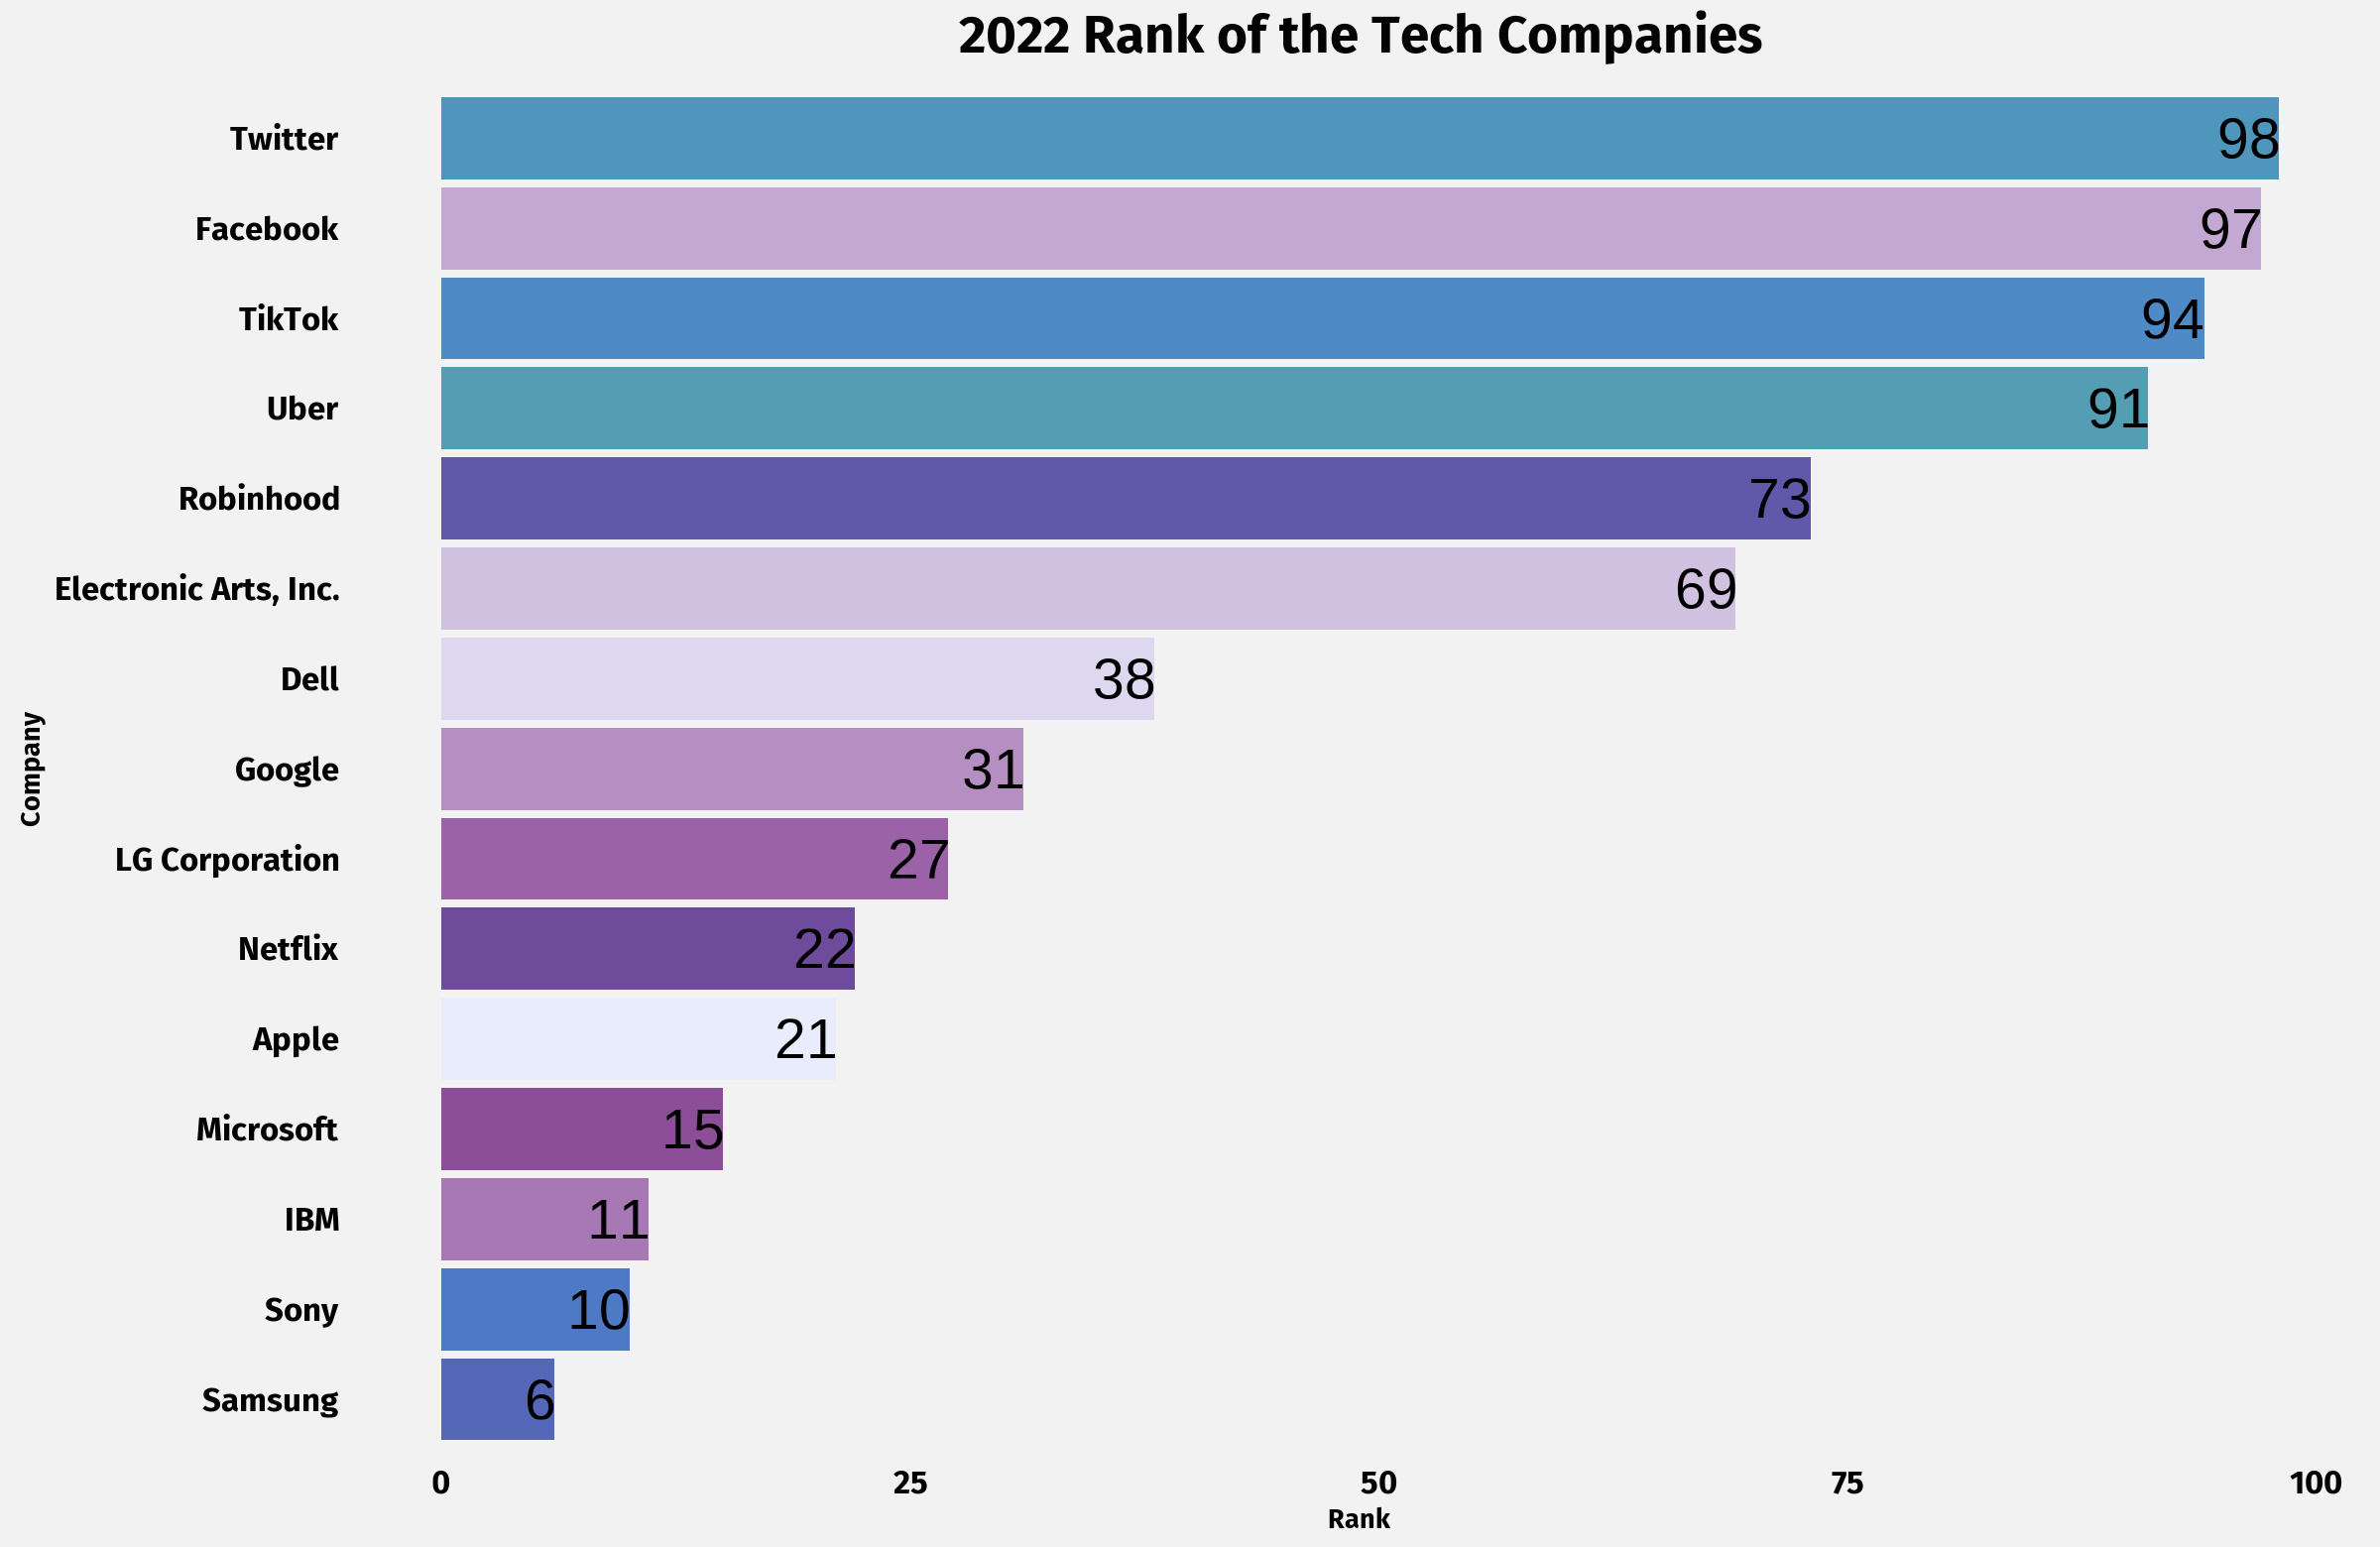

In [96]:
ggplot(tech, aes(reorder(company, x2022_rank), x2022_rank, fill = company))+
geom_col()+
geom_text(aes(label = x2022_rank), size = 15, hjust = 1, vjust = 0.5)+
scale_fill_paletteer_d("khroma::smooth_rainbow")+
labs(title = "2022 Rank Of the Retail Companies")+
my_theme()+
labs(title = '2022 Rank of the Tech Companies',
    x = 'Company',
    y = 'Rank')+
theme(legend.position = 'none')+
coord_flip()

We can see that Uber, TikTok, Facebook and Twitter have worst Rank. While Samsang has Highest Rank 6.

## Rank from 2017 - 2021

Warning message:
“Removed 25 rows containing non-finite values (stat_bump).”
Warning message in f(...):
“'StatBump' needs at least two observations per group”
Warning message in f(...):
“'StatBump' needs at least two observations per group”
Warning message:
“Removed 25 rows containing missing values (geom_point).”


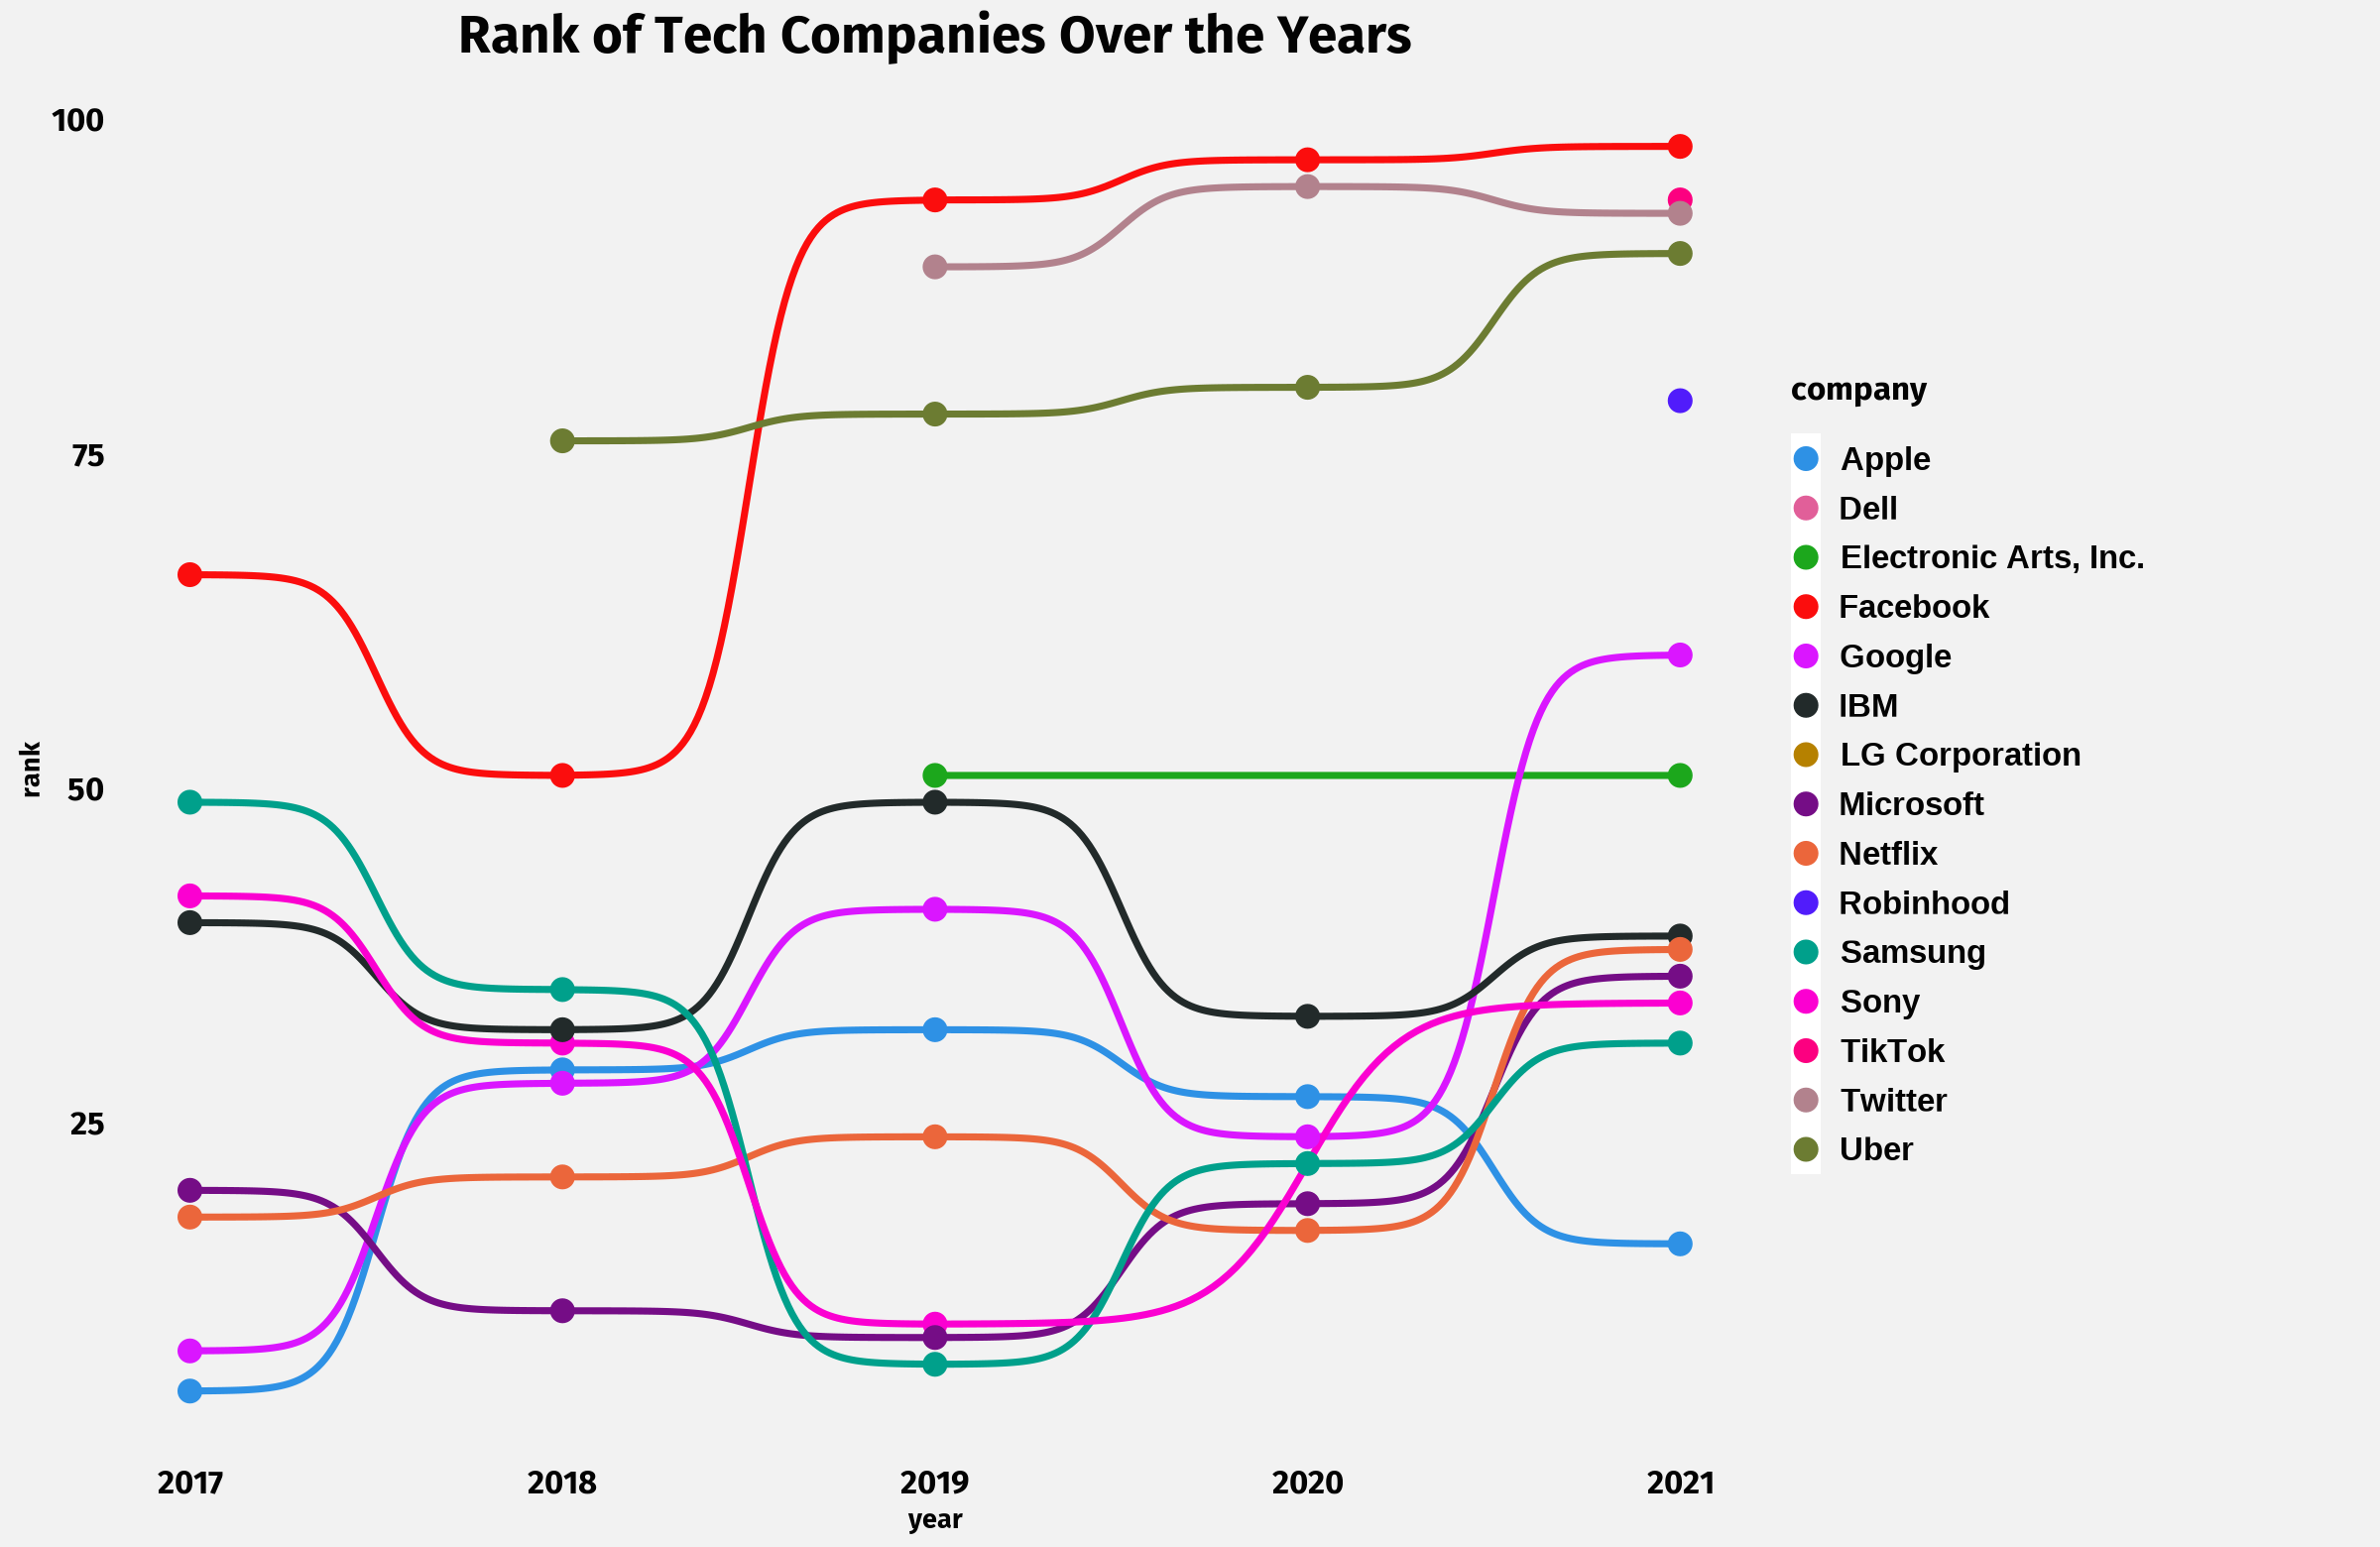

In [97]:
b_df <- poll %>%
filter(industry == 'Tech')%>%
ggplot(aes(x = year, y = rank, color = company)) +
geom_bump(size = 1.5) +
geom_point(size = 6)+
scale_colour_paletteer_d("Polychrome::dark")+
my_theme()+
labs(title = "Rank of Tech Companies Over the Years")

b_df

# Which Retail Companies have the Best And Worst Ranks in 2022??

In [98]:
retail <- df %>%
filter(industry == 'Retail')

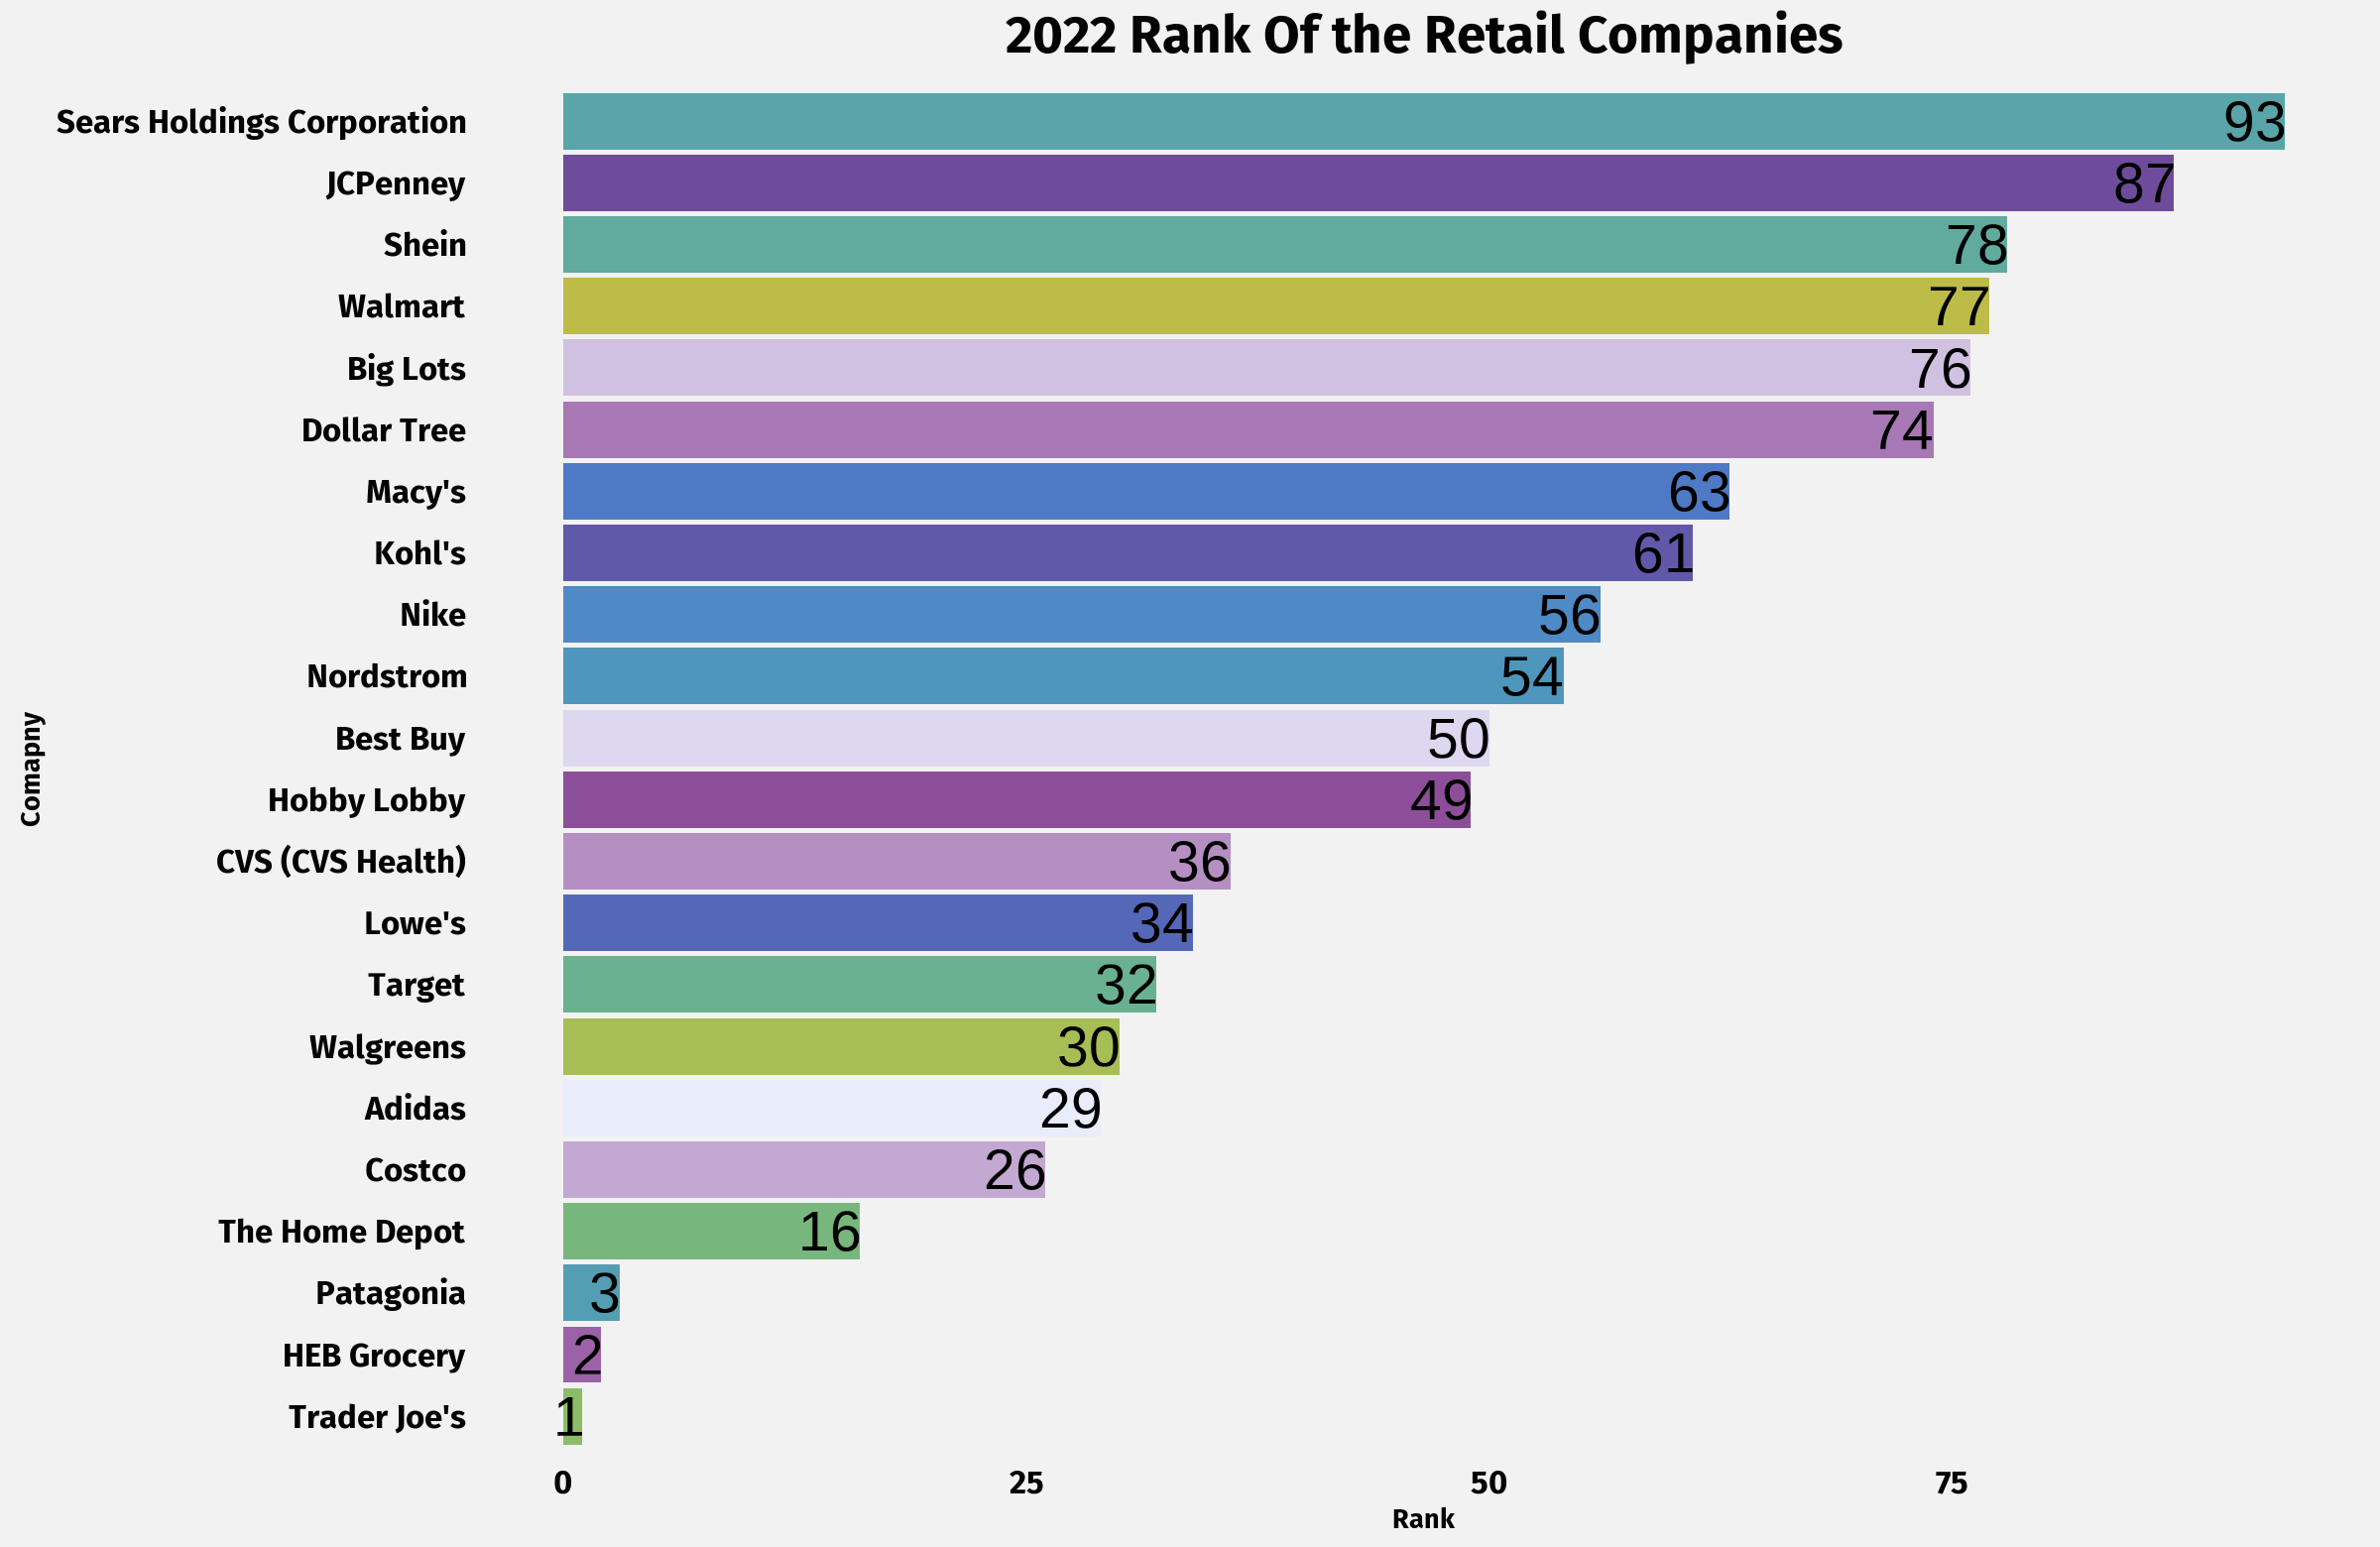

In [99]:
ggplot(retail, aes(reorder(company, x2022_rank), x2022_rank, fill = company))+
geom_col()+
geom_text(aes(label = x2022_rank), size = 15, hjust = 1, vjust = 0.5)+
scale_fill_paletteer_d("khroma::smooth_rainbow")+
labs(title = "2022 Rank Of the Retail Companies",
    x = 'Comapny',
    y = 'Rank')+
my_theme()+
theme(legend.position = 'none')+
coord_flip()

- Trader Joe's, HEB Grocery and Patagonia are top 3 cpmpanies.
- Sear's Holding Corporation, JCpenny and Shein have worst ranks.

In [100]:
r_df <- poll %>%
filter(industry == 'Retail')%>%
na.omit()

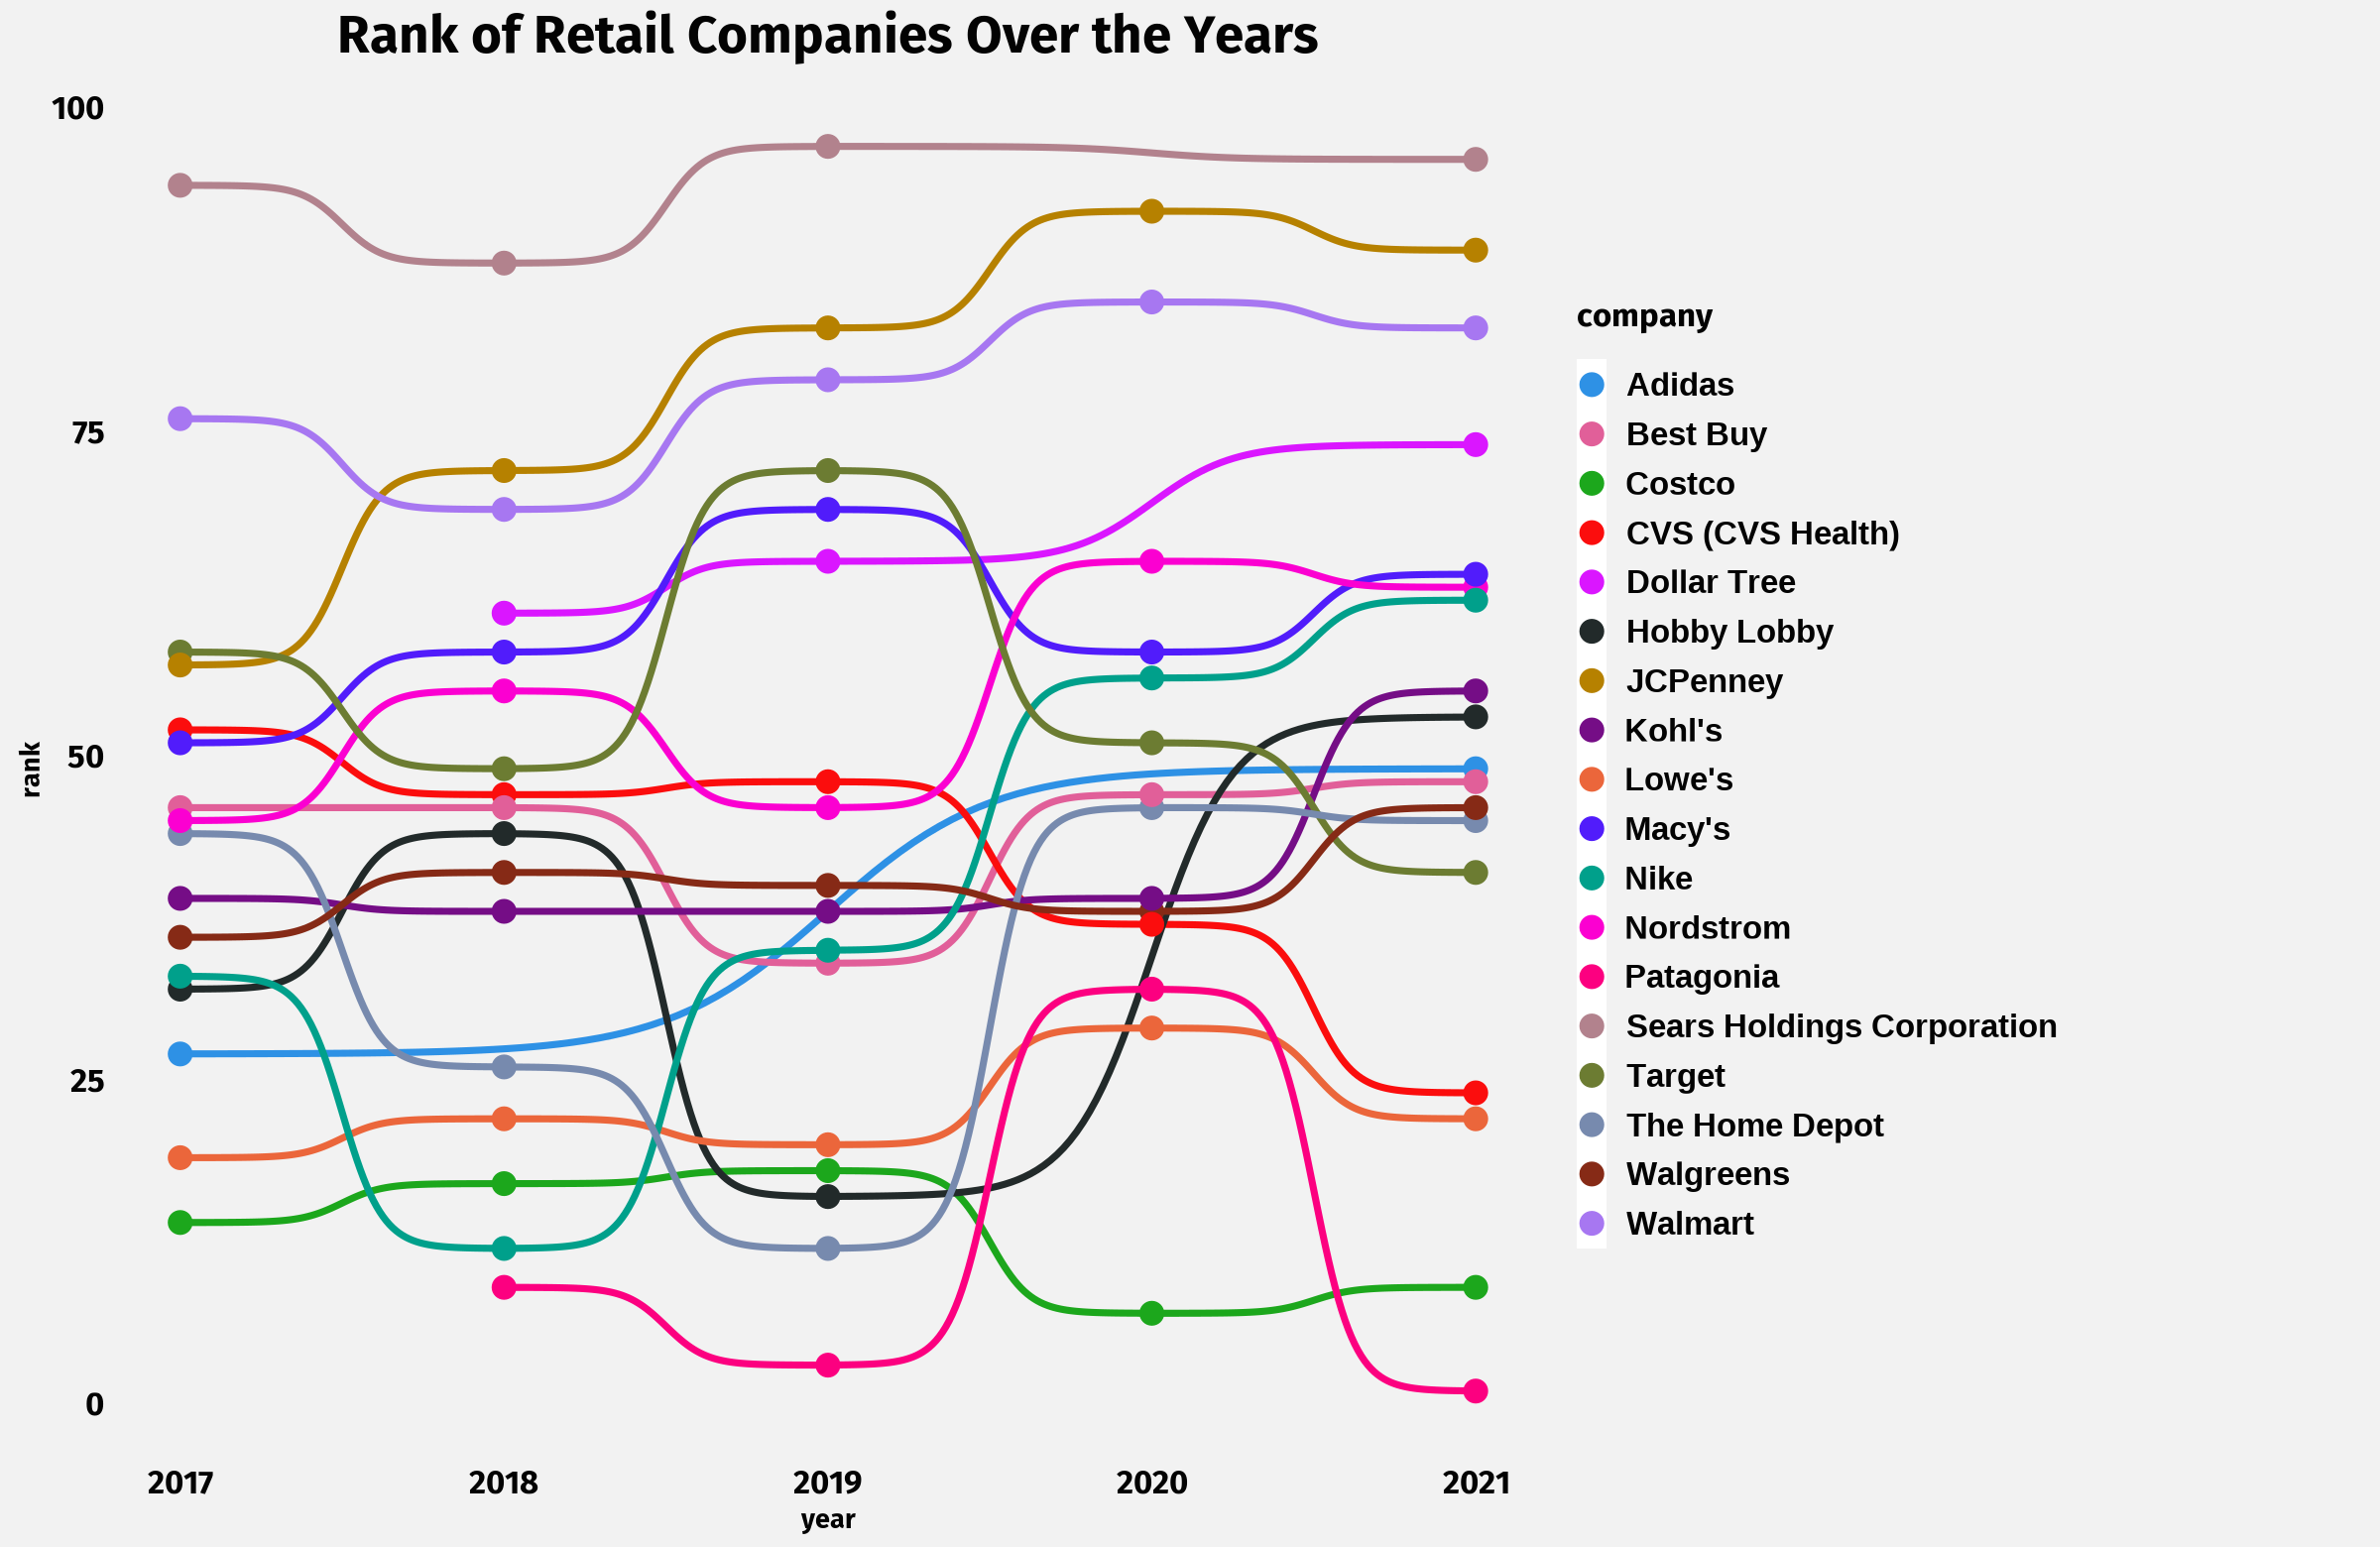

In [101]:
ggplot(r_df, aes(x = year, y = rank, color = company)) +
  geom_bump(size = 1.5) +
  geom_point(size = 6)+
  scale_colour_paletteer_d("Polychrome::dark")+
  my_theme()+
  labs(title = "Rank of Retail Companies Over the Years")

We can see that Trader Joe's, HEB Grocery and Patagonia have the highest Ranks in 2022

# Which Food and Beverage Companies have the Best And Worst Ranks in 2022??

In [102]:
f1_df <- df %>%
filter(industry == 'Food & Beverage')

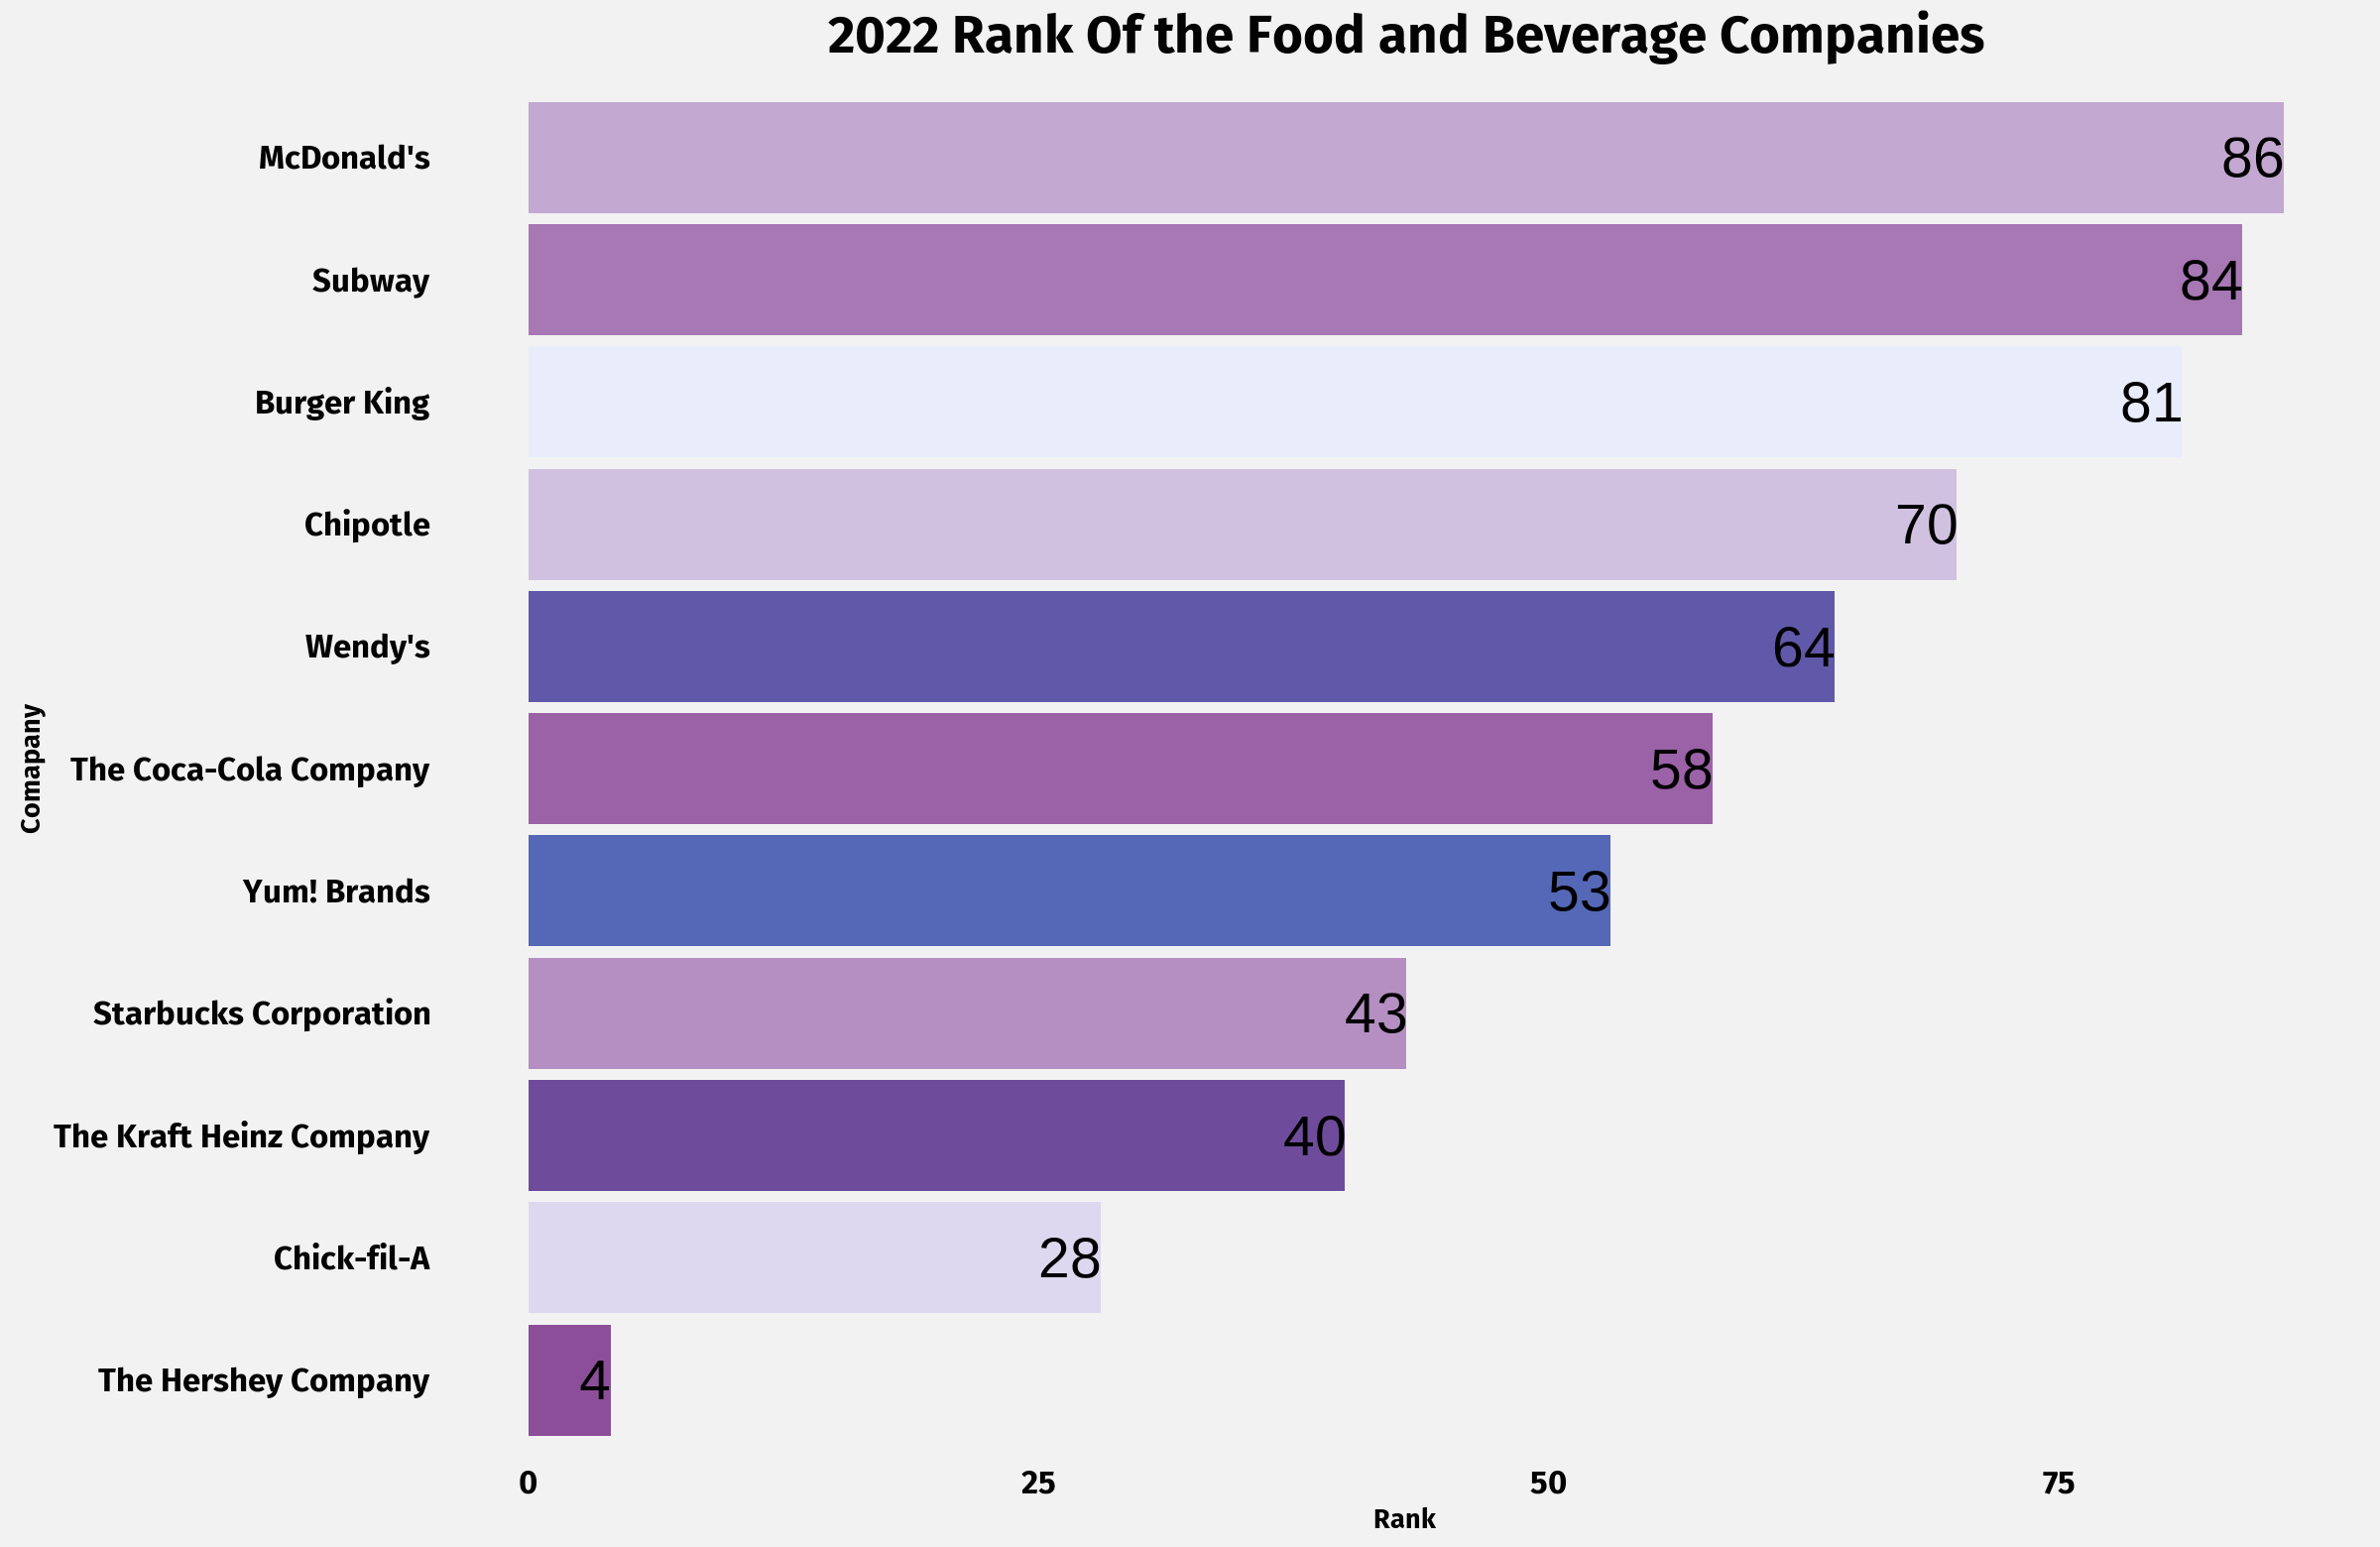

In [103]:
ggplot(f1_df, aes(reorder(company, x2022_rank), x2022_rank, fill = company))+
geom_col()+
geom_text(aes(label = x2022_rank), size = 15, hjust = 1, vjust = 0.5)+
scale_fill_paletteer_d("khroma::smooth_rainbow")+
labs(title = "2022 Rank Of the Food and Beverage Companies",
    x = 'Comapany',
    y = 'Rank')+
my_theme()+
theme(legend.position = 'none')+
coord_flip()

- The Hershey Compnay has the highest rank of 4.
- Burger King, subway and Mcdonald's have the worst ranks.

In [104]:
f_df <- poll %>%
filter(industry == 'Food & Beverage')

Warning message:
“Removed 19 rows containing non-finite values (stat_bump).”
Warning message:
“Removed 19 rows containing missing values (geom_point).”


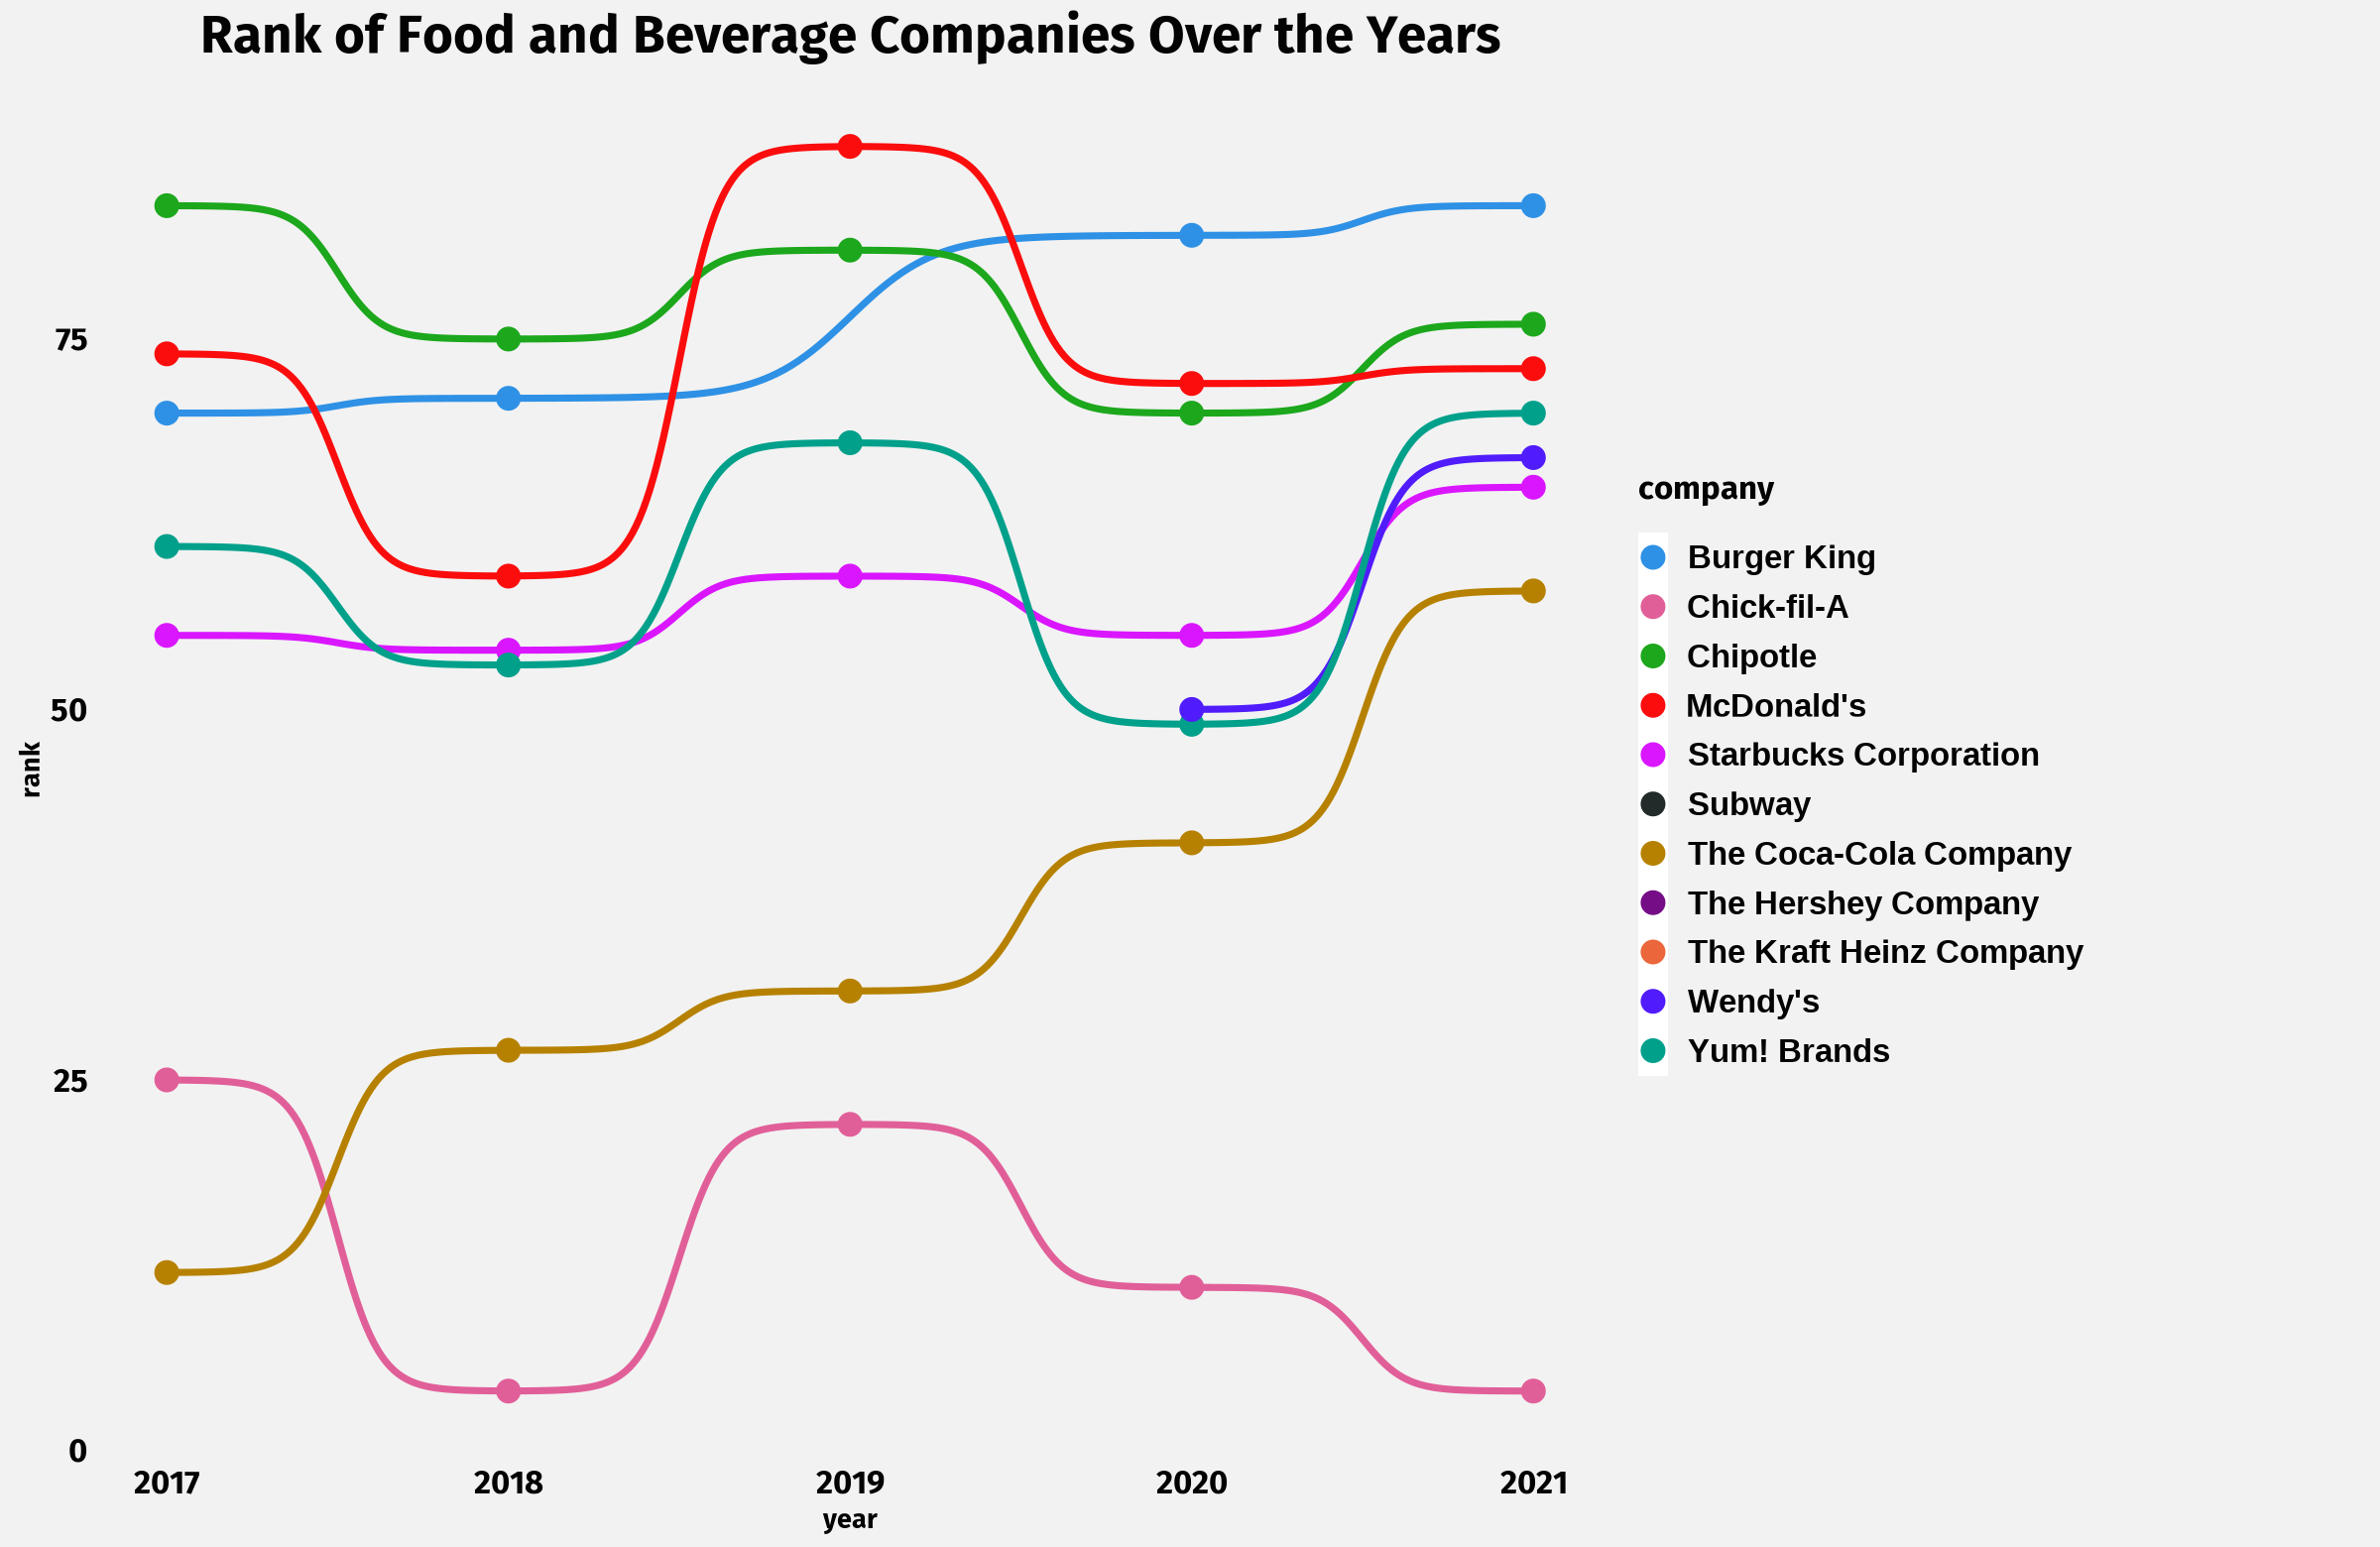

In [105]:
ggplot(f_df, aes(x = year, y = rank, color = company)) +
  geom_bump(size = 1.5) +
  geom_point(size = 6)+
  scale_colour_paletteer_d("Polychrome::dark")+
  my_theme()+
  labs(title = "Rank of Food and Beverage Companies Over the Years")

# Which Financial Services Companies have the Best And Worst Ranks in 2022??

In [106]:
fins <- df %>%
filter(industry == 'Financial Services')

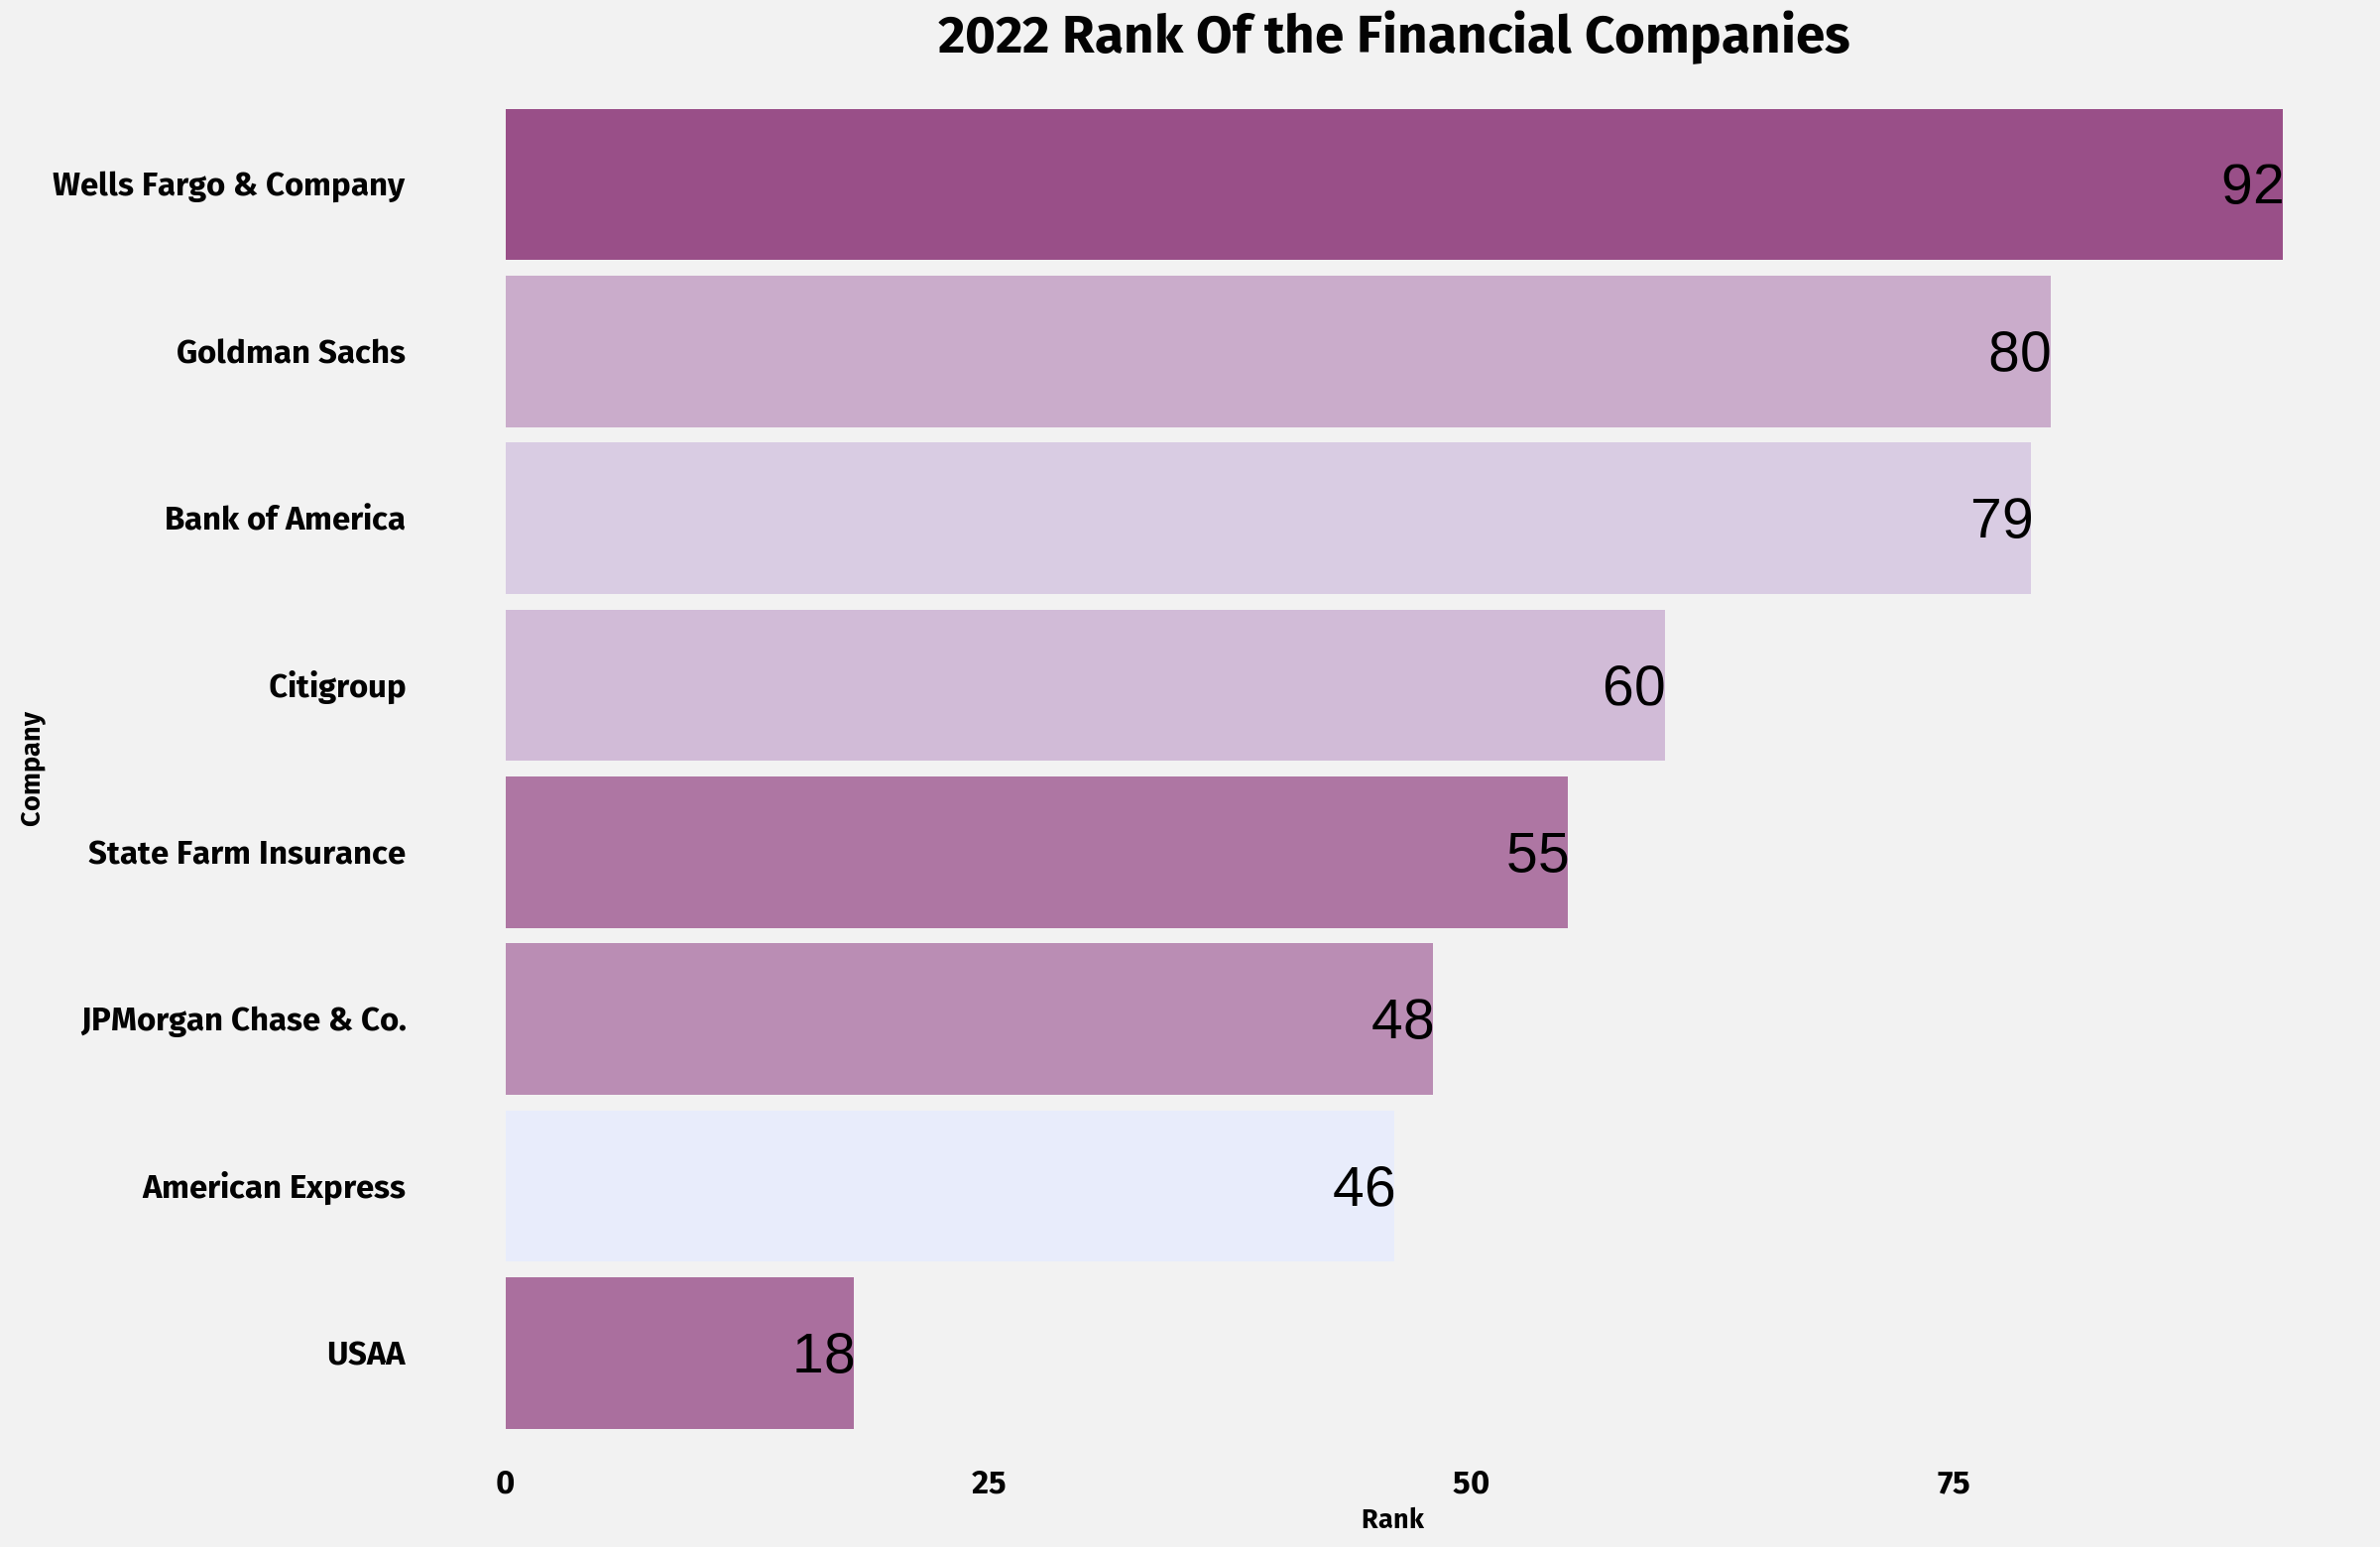

In [107]:
ggplot(fins, aes(reorder(company, x2022_rank), x2022_rank, fill = company))+
geom_col()+
geom_text(aes(label = x2022_rank), size = 15, hjust = 1, vjust = 0.5)+
scale_fill_paletteer_d("khroma::discrete_rainbow")+
my_theme()+
labs(title = '2022 Rank Of the Financial Companies',
    x = 'Company',
    y = 'Rank')+
theme(legend.position = 'none')+
coord_flip()

- USSA has best Rank.
- Goldman Sachs, Wells Fargo and company has worst ranks.

In [108]:
fin_df <- poll %>%
filter(industry == 'Financial Services')

Warning message:
“Removed 7 rows containing non-finite values (stat_bump).”
Warning message:
“Removed 7 rows containing missing values (geom_point).”


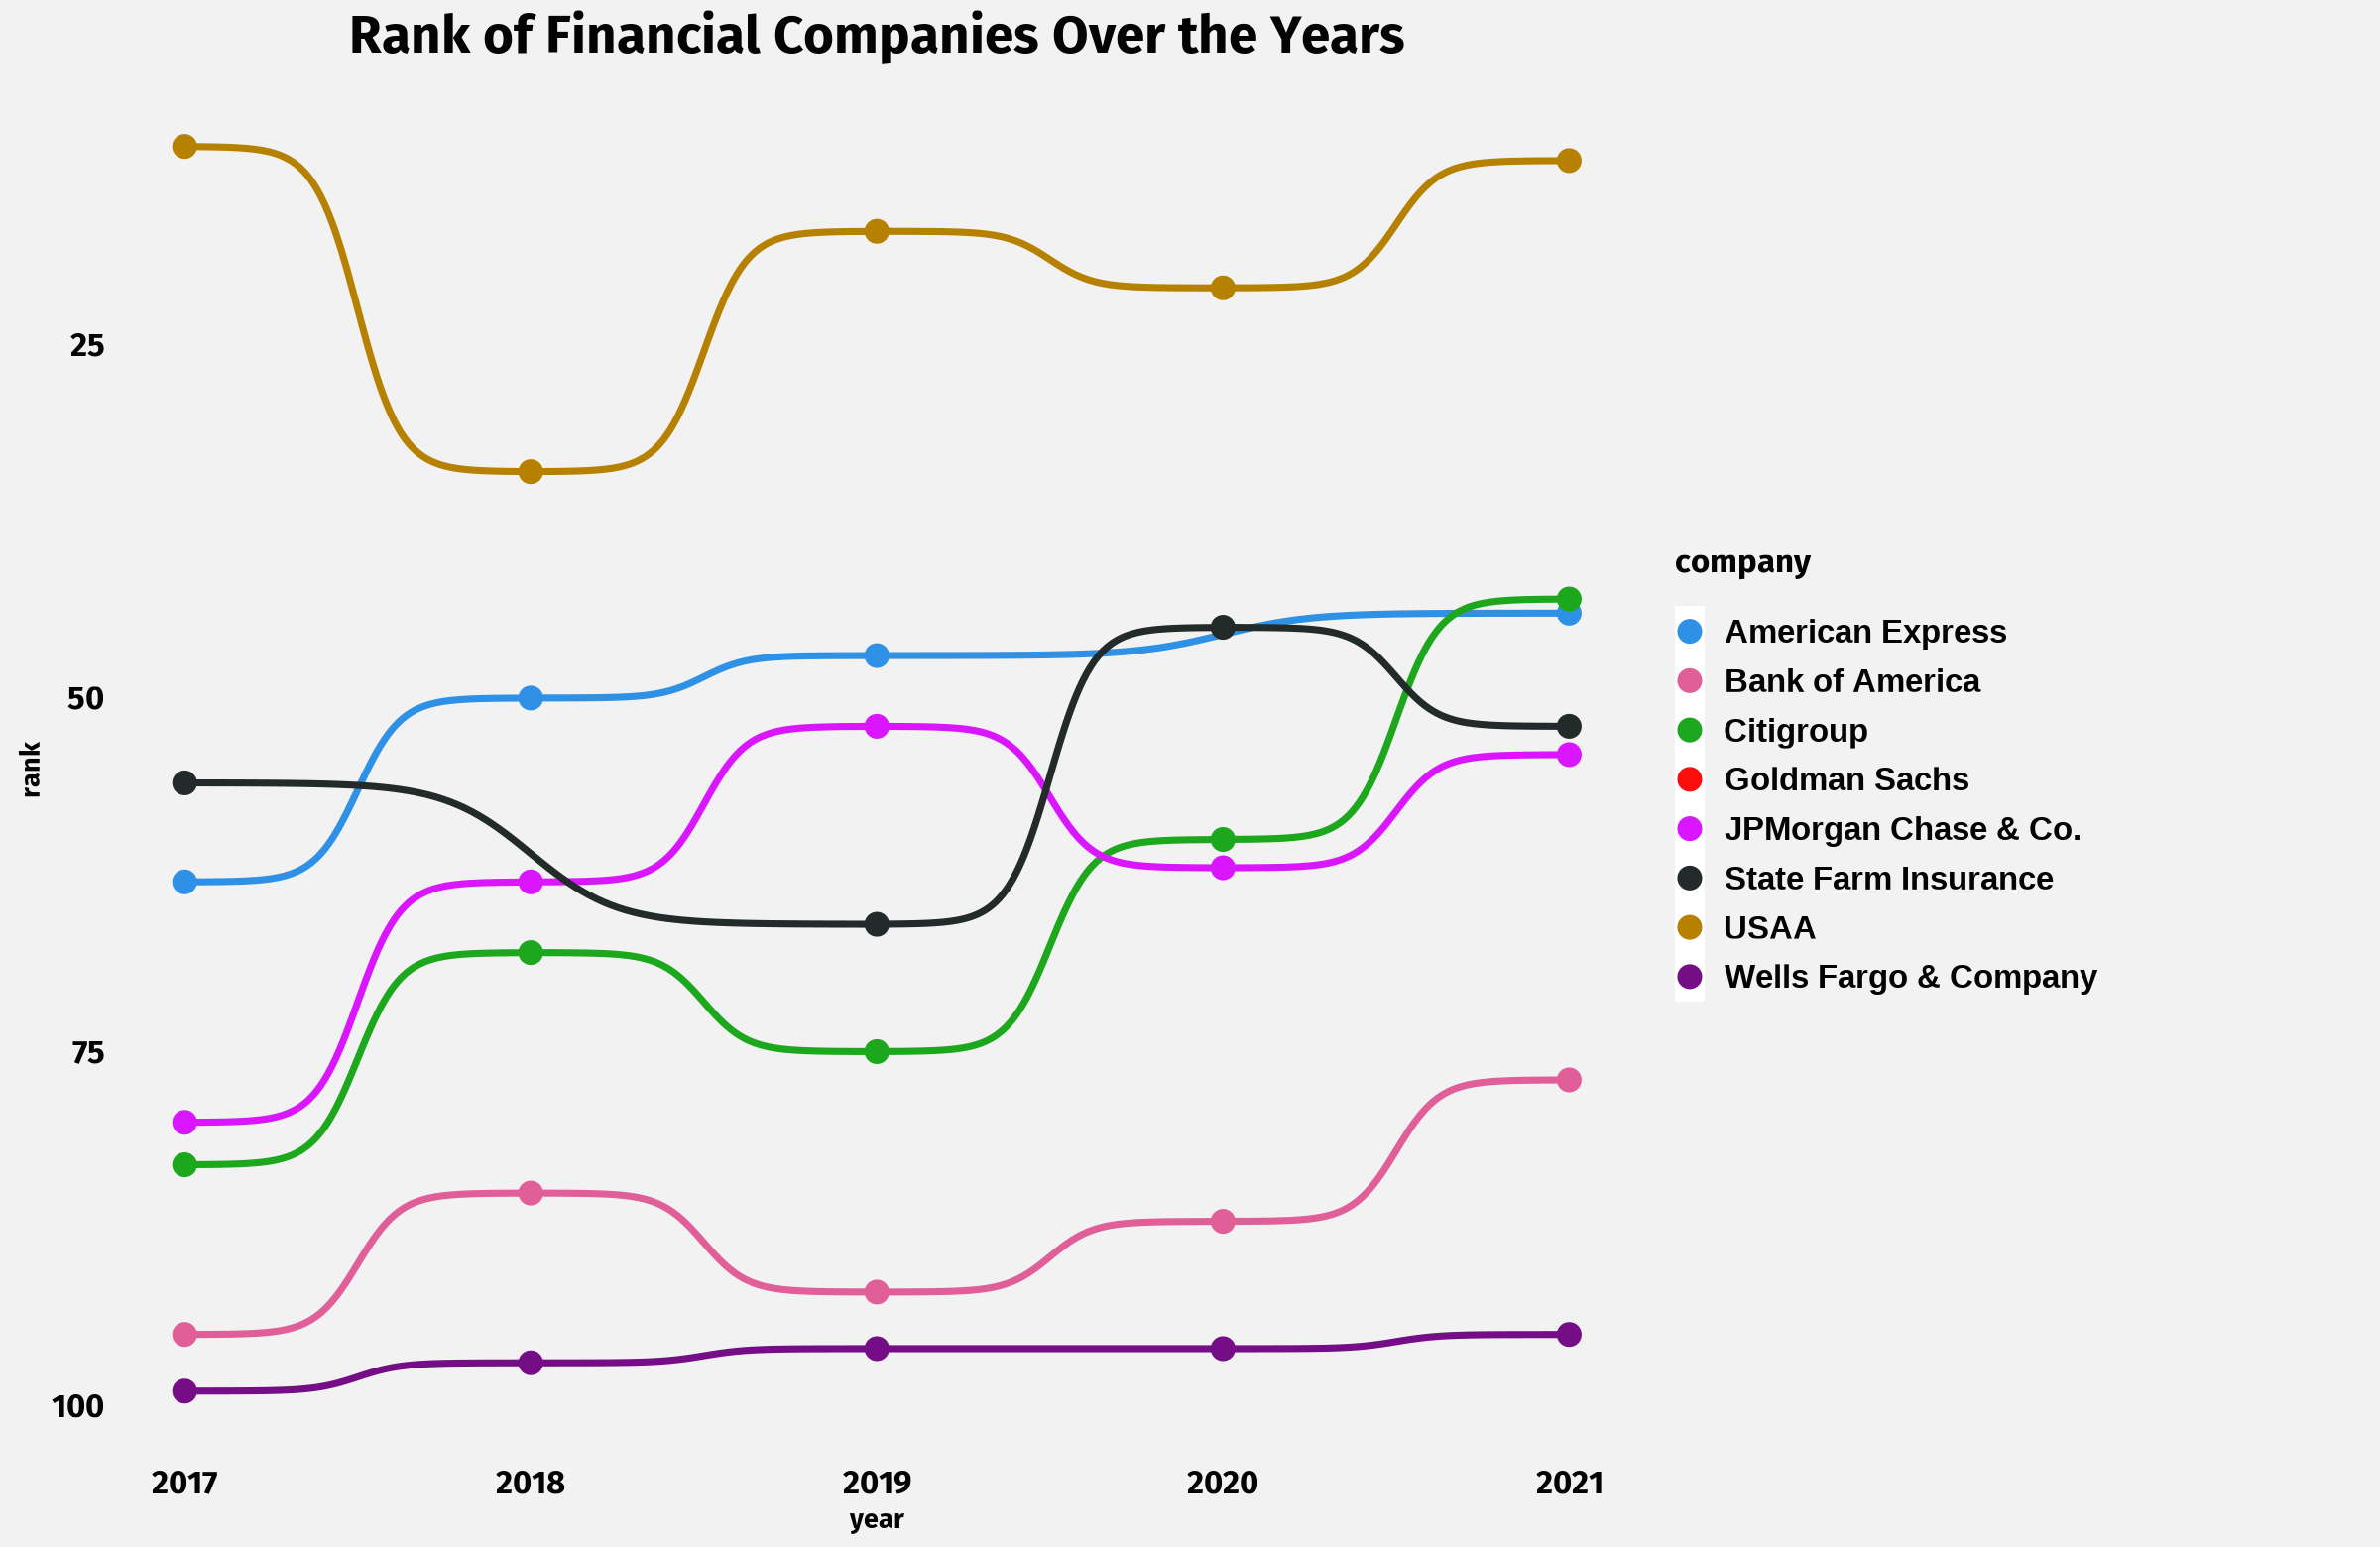

In [109]:
ggplot(fin_df, aes(x = year, y = rank, color = company)) +
  geom_bump(size = 1.5) +
  geom_point(size = 6)+
  scale_y_reverse()+
  scale_colour_paletteer_d("Polychrome::dark")+
  my_theme()+
  labs(title = 'Rank of Financial Companies Over the Years')

# Reputation

In [110]:
head(reputation)

company      industry name        score rank
1 Trader Joe's Retail   TRUST       82.7   3  
2 Trader Joe's Retail   ETHICS      82.5   2  
3 Trader Joe's Retail   GROWTH      84.1   2  
4 Trader Joe's Retail   P&S         83.5   9  
5 Trader Joe's Retail   CITIZENSHIP 80.0   3  
6 Trader Joe's Retail   VISION      81.9  13

In [111]:
reputation %>%
count(industry, sort = TRUE)

industry           n  
1  Retail             154
2  Tech               105
3  Food & Beverage     77
4  Financial Services  56
5  Automotive          49
6  Consumer Goods      28
7  Ecommerce           28
8  Media               28
9  Telecom             28
10 Energy              21
11 Groceries           21
12 Airline             14
13 Food Delivery       14
14 Healthcare          14
15 Industrial          14
16 Logistics           14
17 Other               14
18 Pharma              14
19 Insurance            7

In [112]:
reputation %>%
count(name, sort = TRUE)

name        n  
1 CITIZENSHIP 100
2 CULTURE     100
3 ETHICS      100
4 GROWTH      100
5 P&S         100
6 TRUST       100
7 VISION      100

# Top 20 Companies in Each Category According to Ranks

**Lower Rank is Best**

## Citizenship

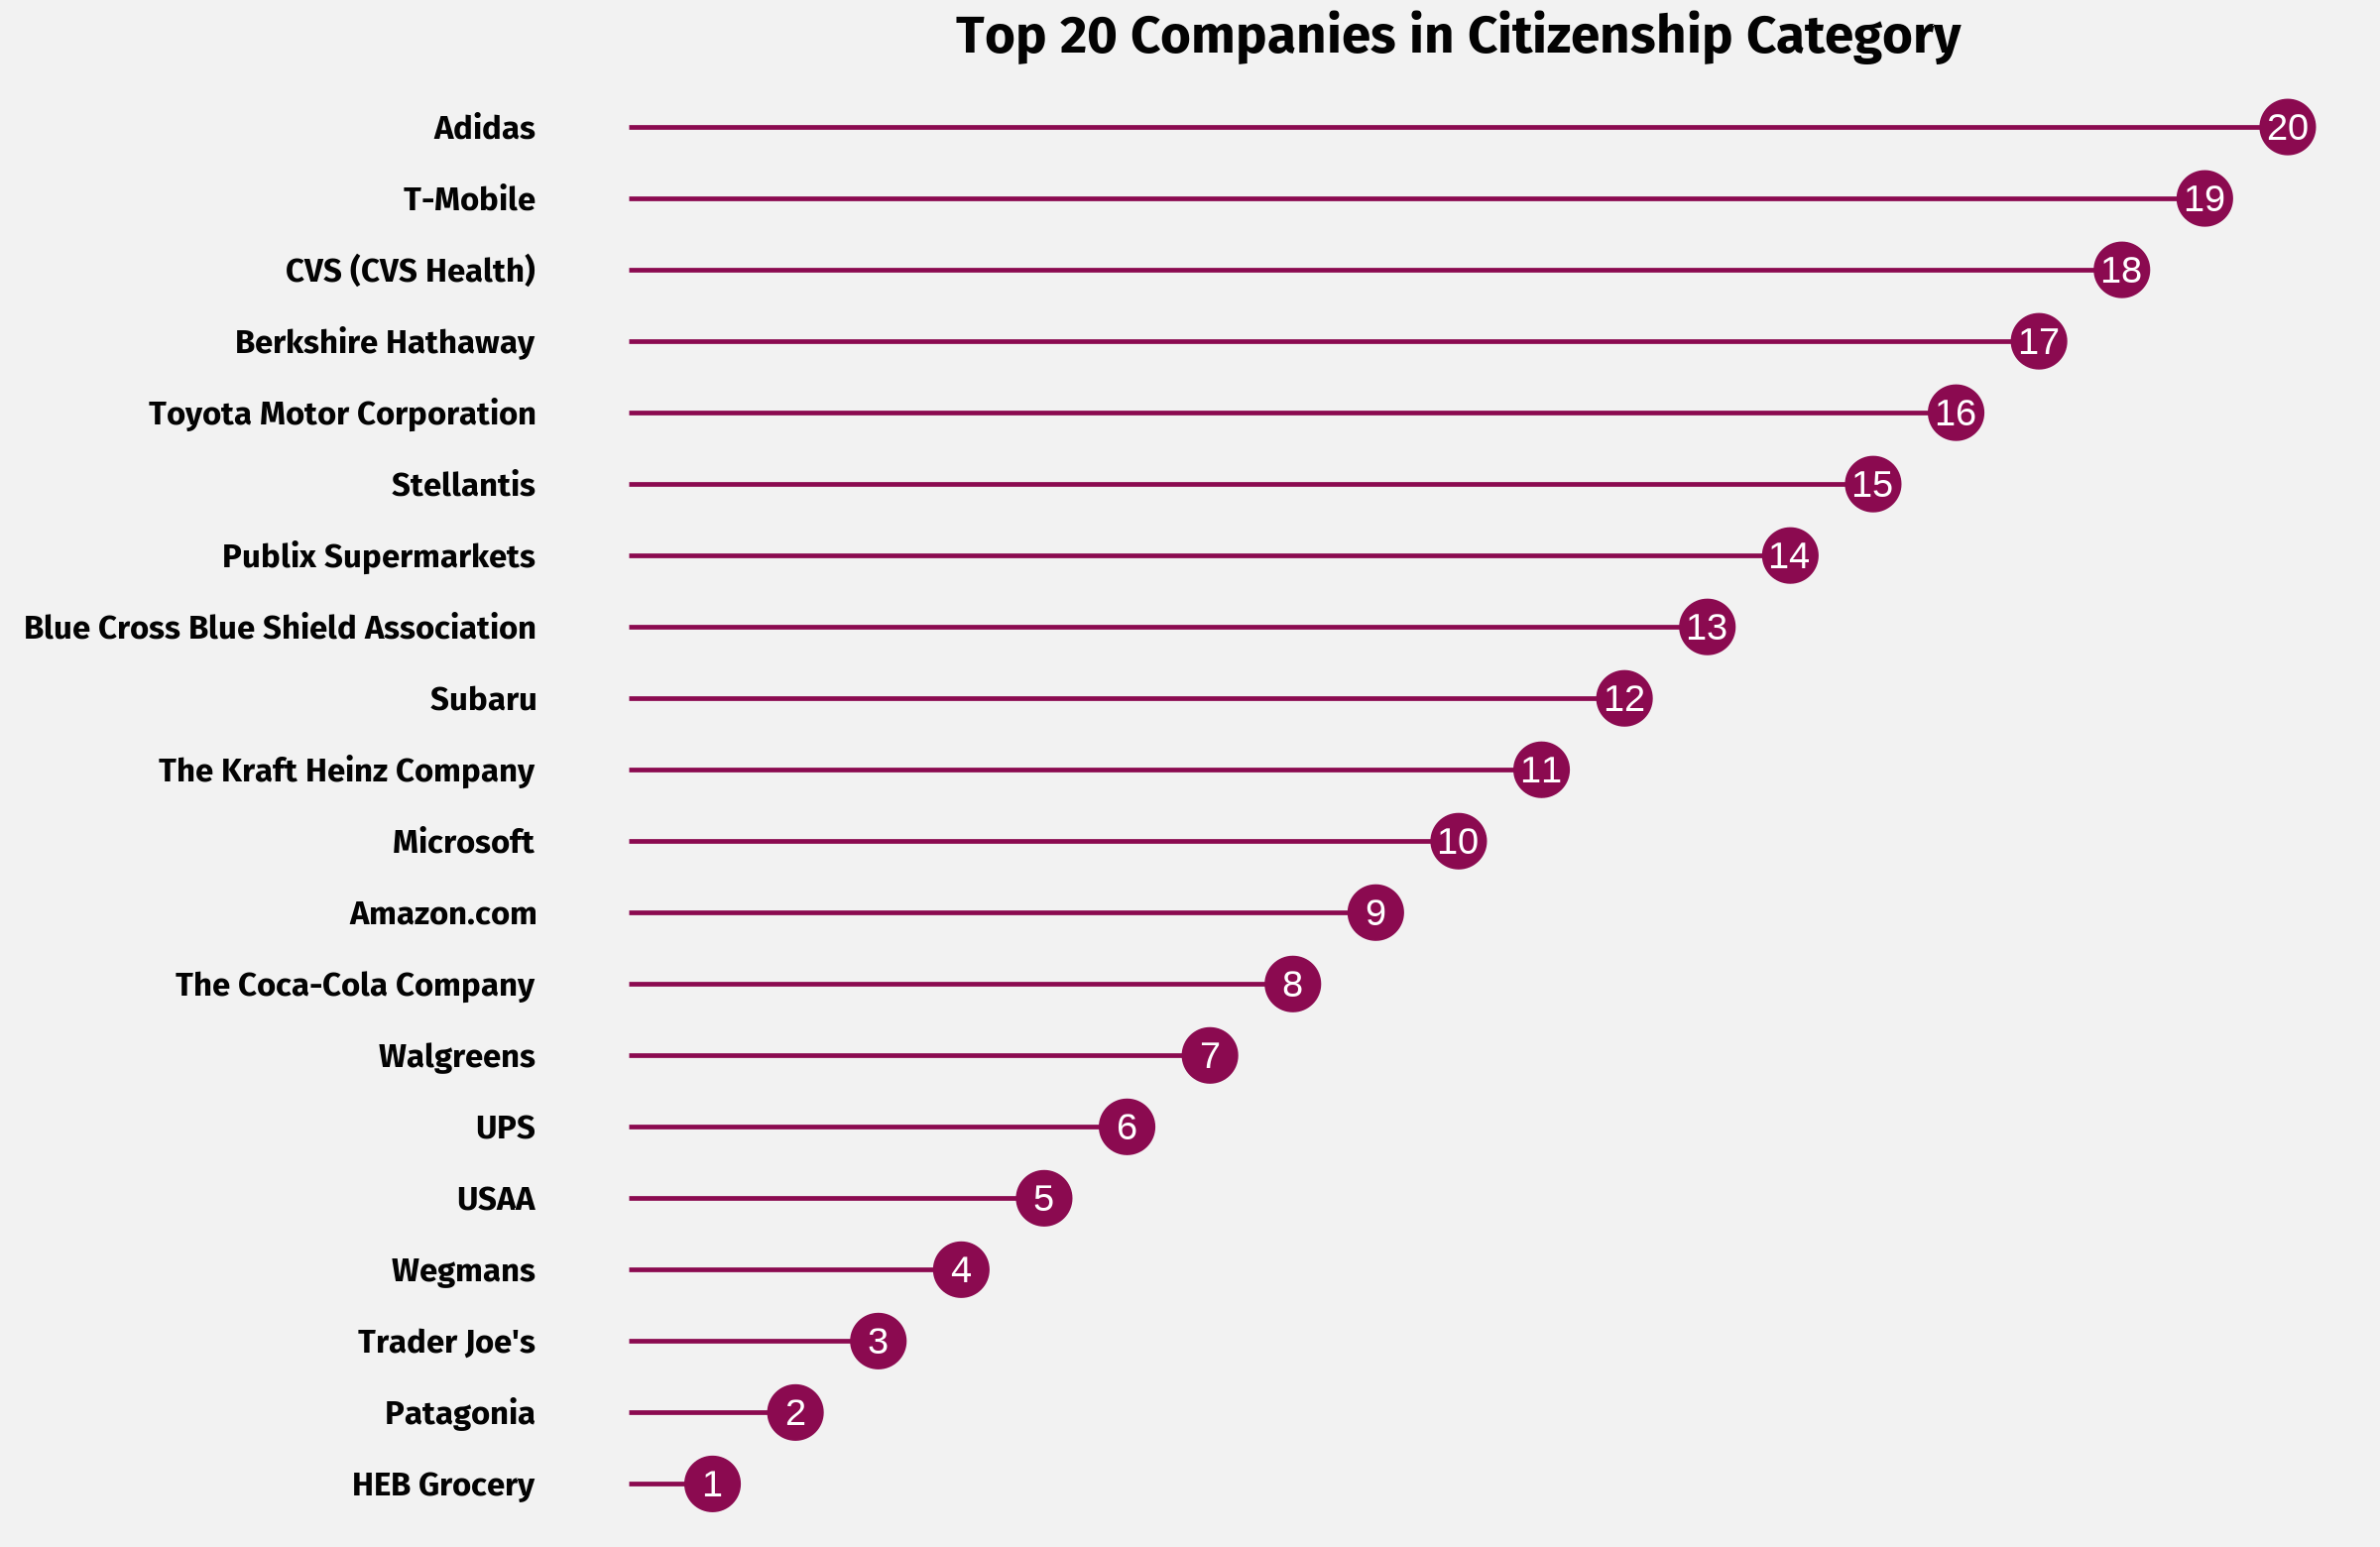

In [113]:
citi <- reputation %>%
filter(name == 'CITIZENSHIP')%>%
arrange(rank)%>%
head(20)%>%
ggplot(aes(reorder(company, rank),rank))+
geom_point(size=15, color="#8B0A50")  +
  geom_segment(aes(x=company, xend=company, y=0, yend=rank), color = '#8B0A50',size = 1) +
  geom_text(aes(label = rank), size = 10, color = 'white')+
  coord_flip()+
my_theme()+
labs(title = 'Top 20 Companies in Citizenship Category')+
theme(axis.title.x = element_blank())+
theme(axis.title.y = element_blank())+
theme(axis.text.x = element_blank())
citi

Top 3 Companies

- HEB Grocery
- Patagonia
- Trader Joe's

## Culture

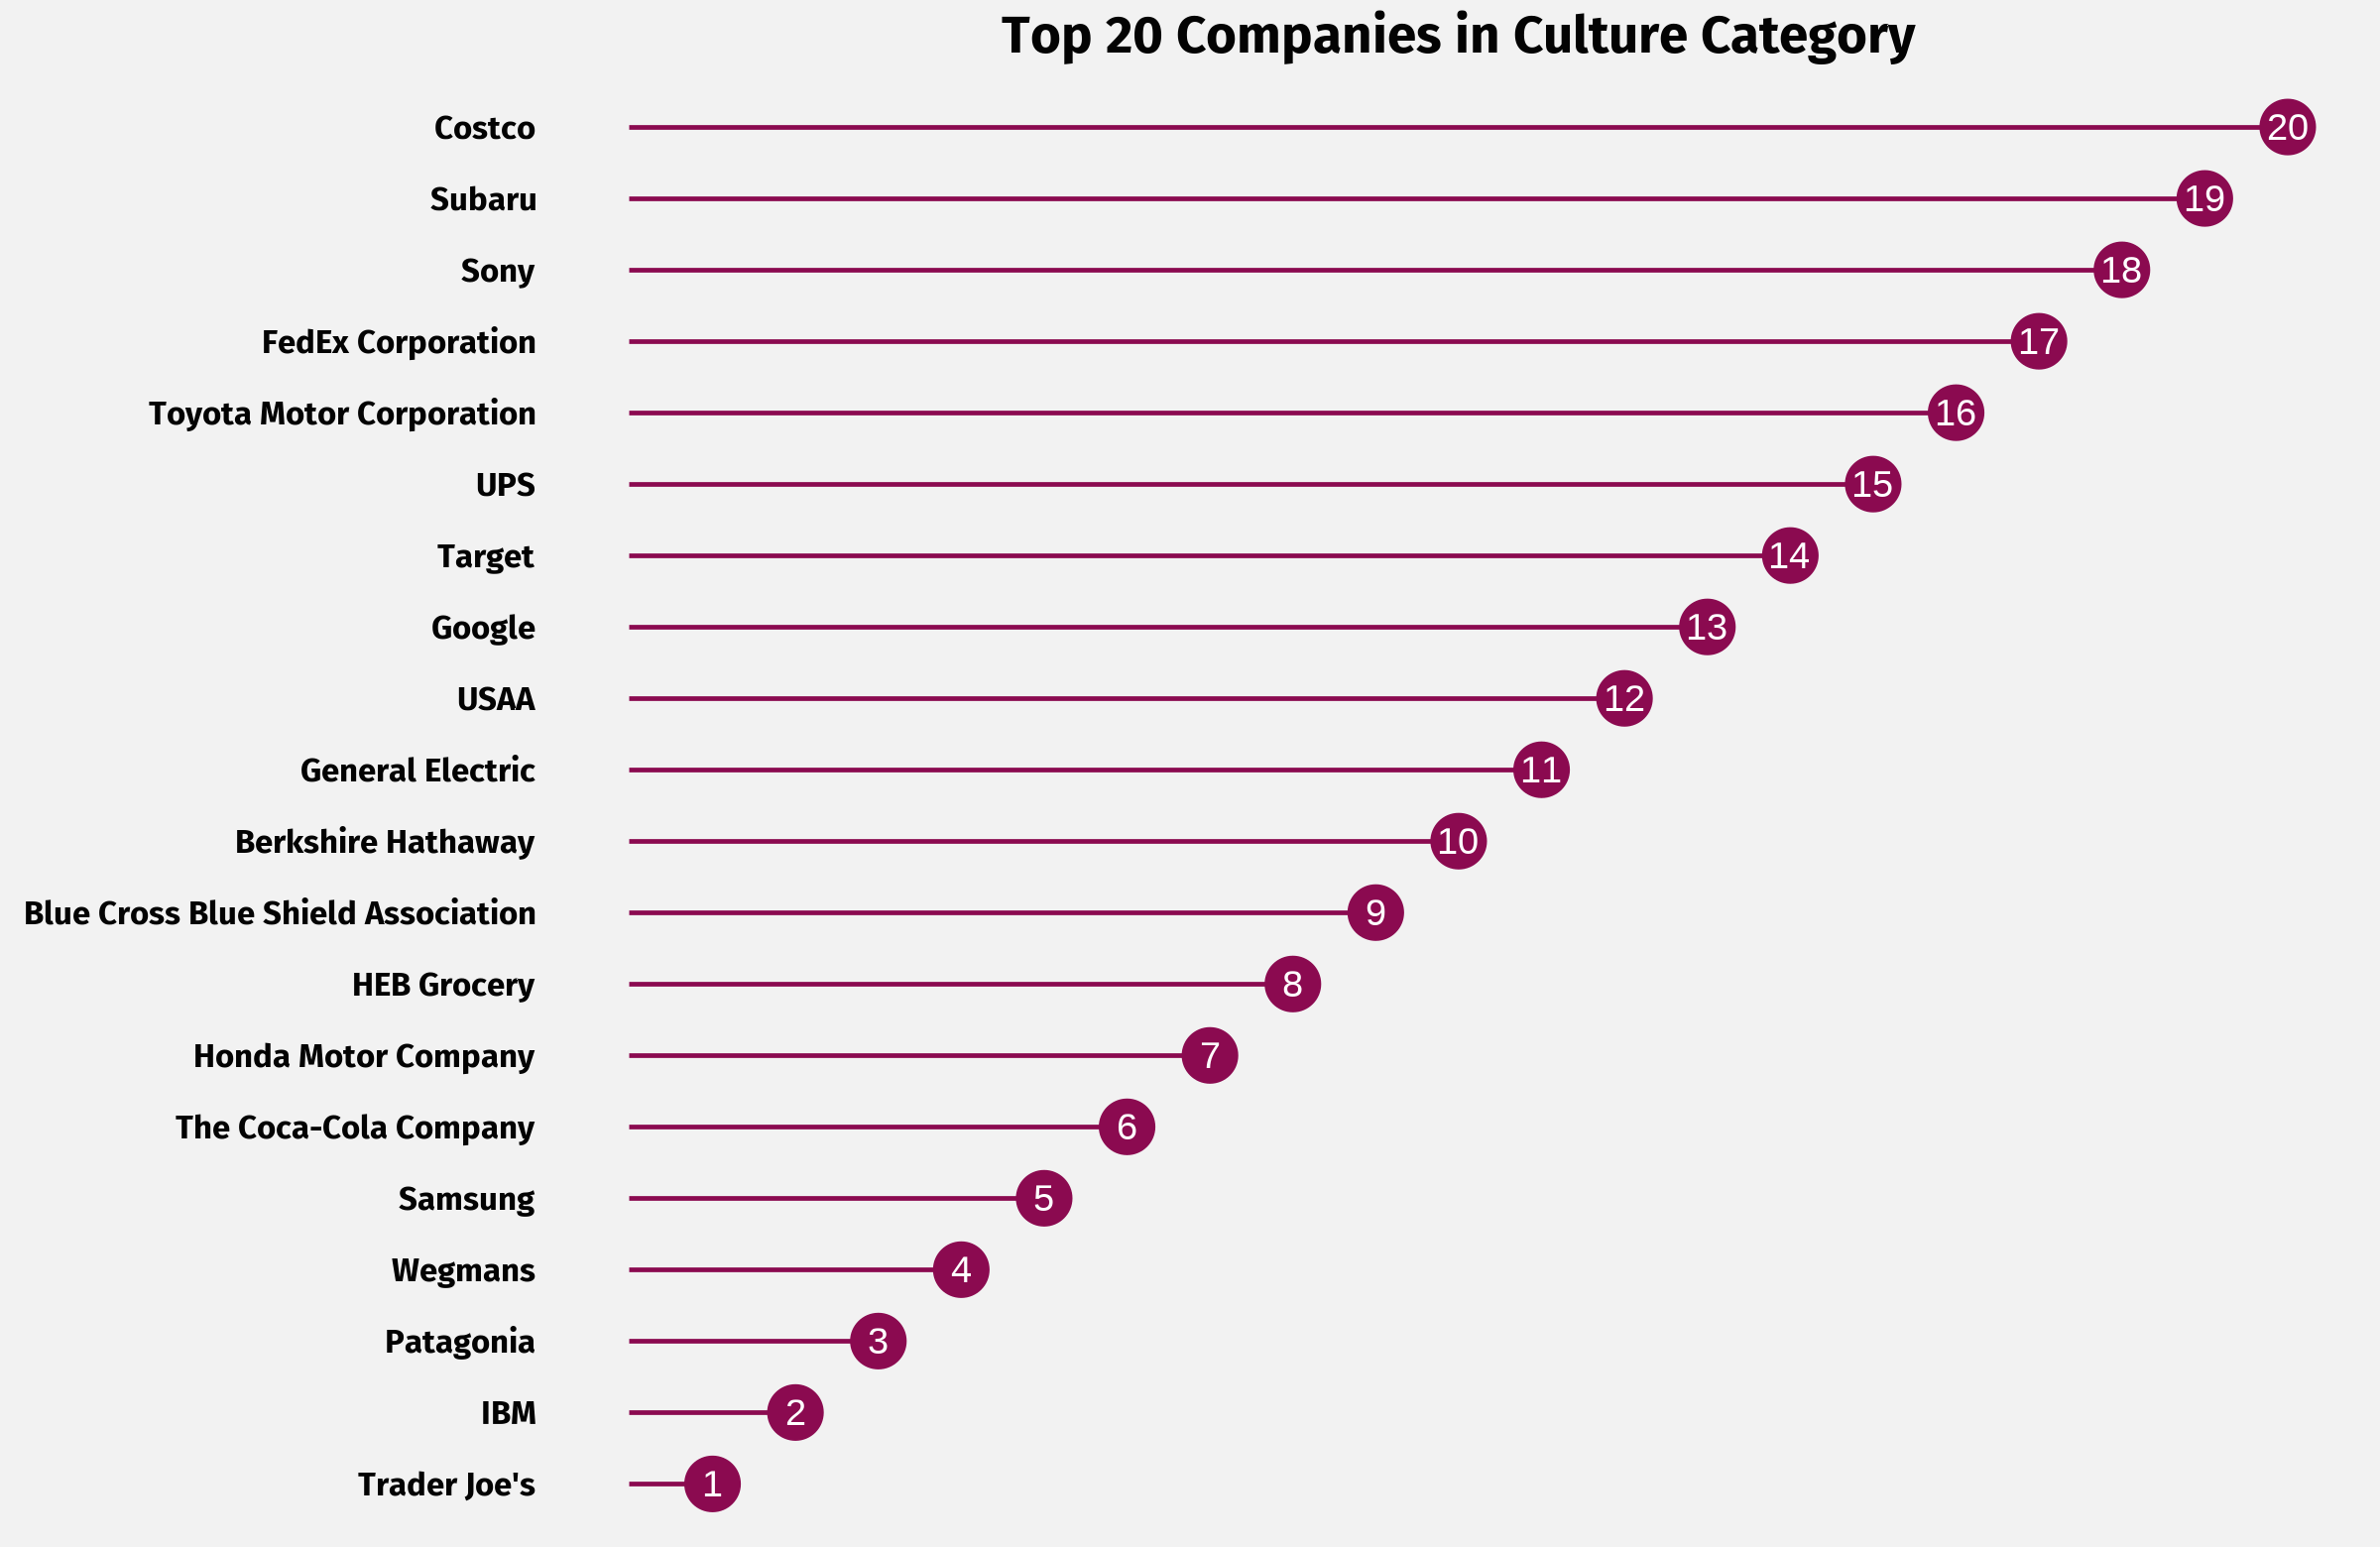

In [114]:
cul <- reputation %>%
filter(name == 'CULTURE')%>%
arrange(rank)%>%
head(20)%>%
ggplot(aes(reorder(company, rank),rank))+
geom_point( size=15, color="#8B0A50")  +
  geom_segment(aes(x=company, xend=company, y=0, yend=rank), color = '#8B0A50',size = 1) +
  geom_text(aes(label = rank), size = 10, color = 'white')+
coord_flip()+
my_theme()+
labs(title = 'Top 20 Companies in Culture Category')+
theme(axis.title.x = element_blank())+
theme(axis.title.y = element_blank())+
theme(axis.text.x = element_blank())
cul

Top 3 Companies

- Trader Joe's
- IBM
- Patagonia

## Ethics

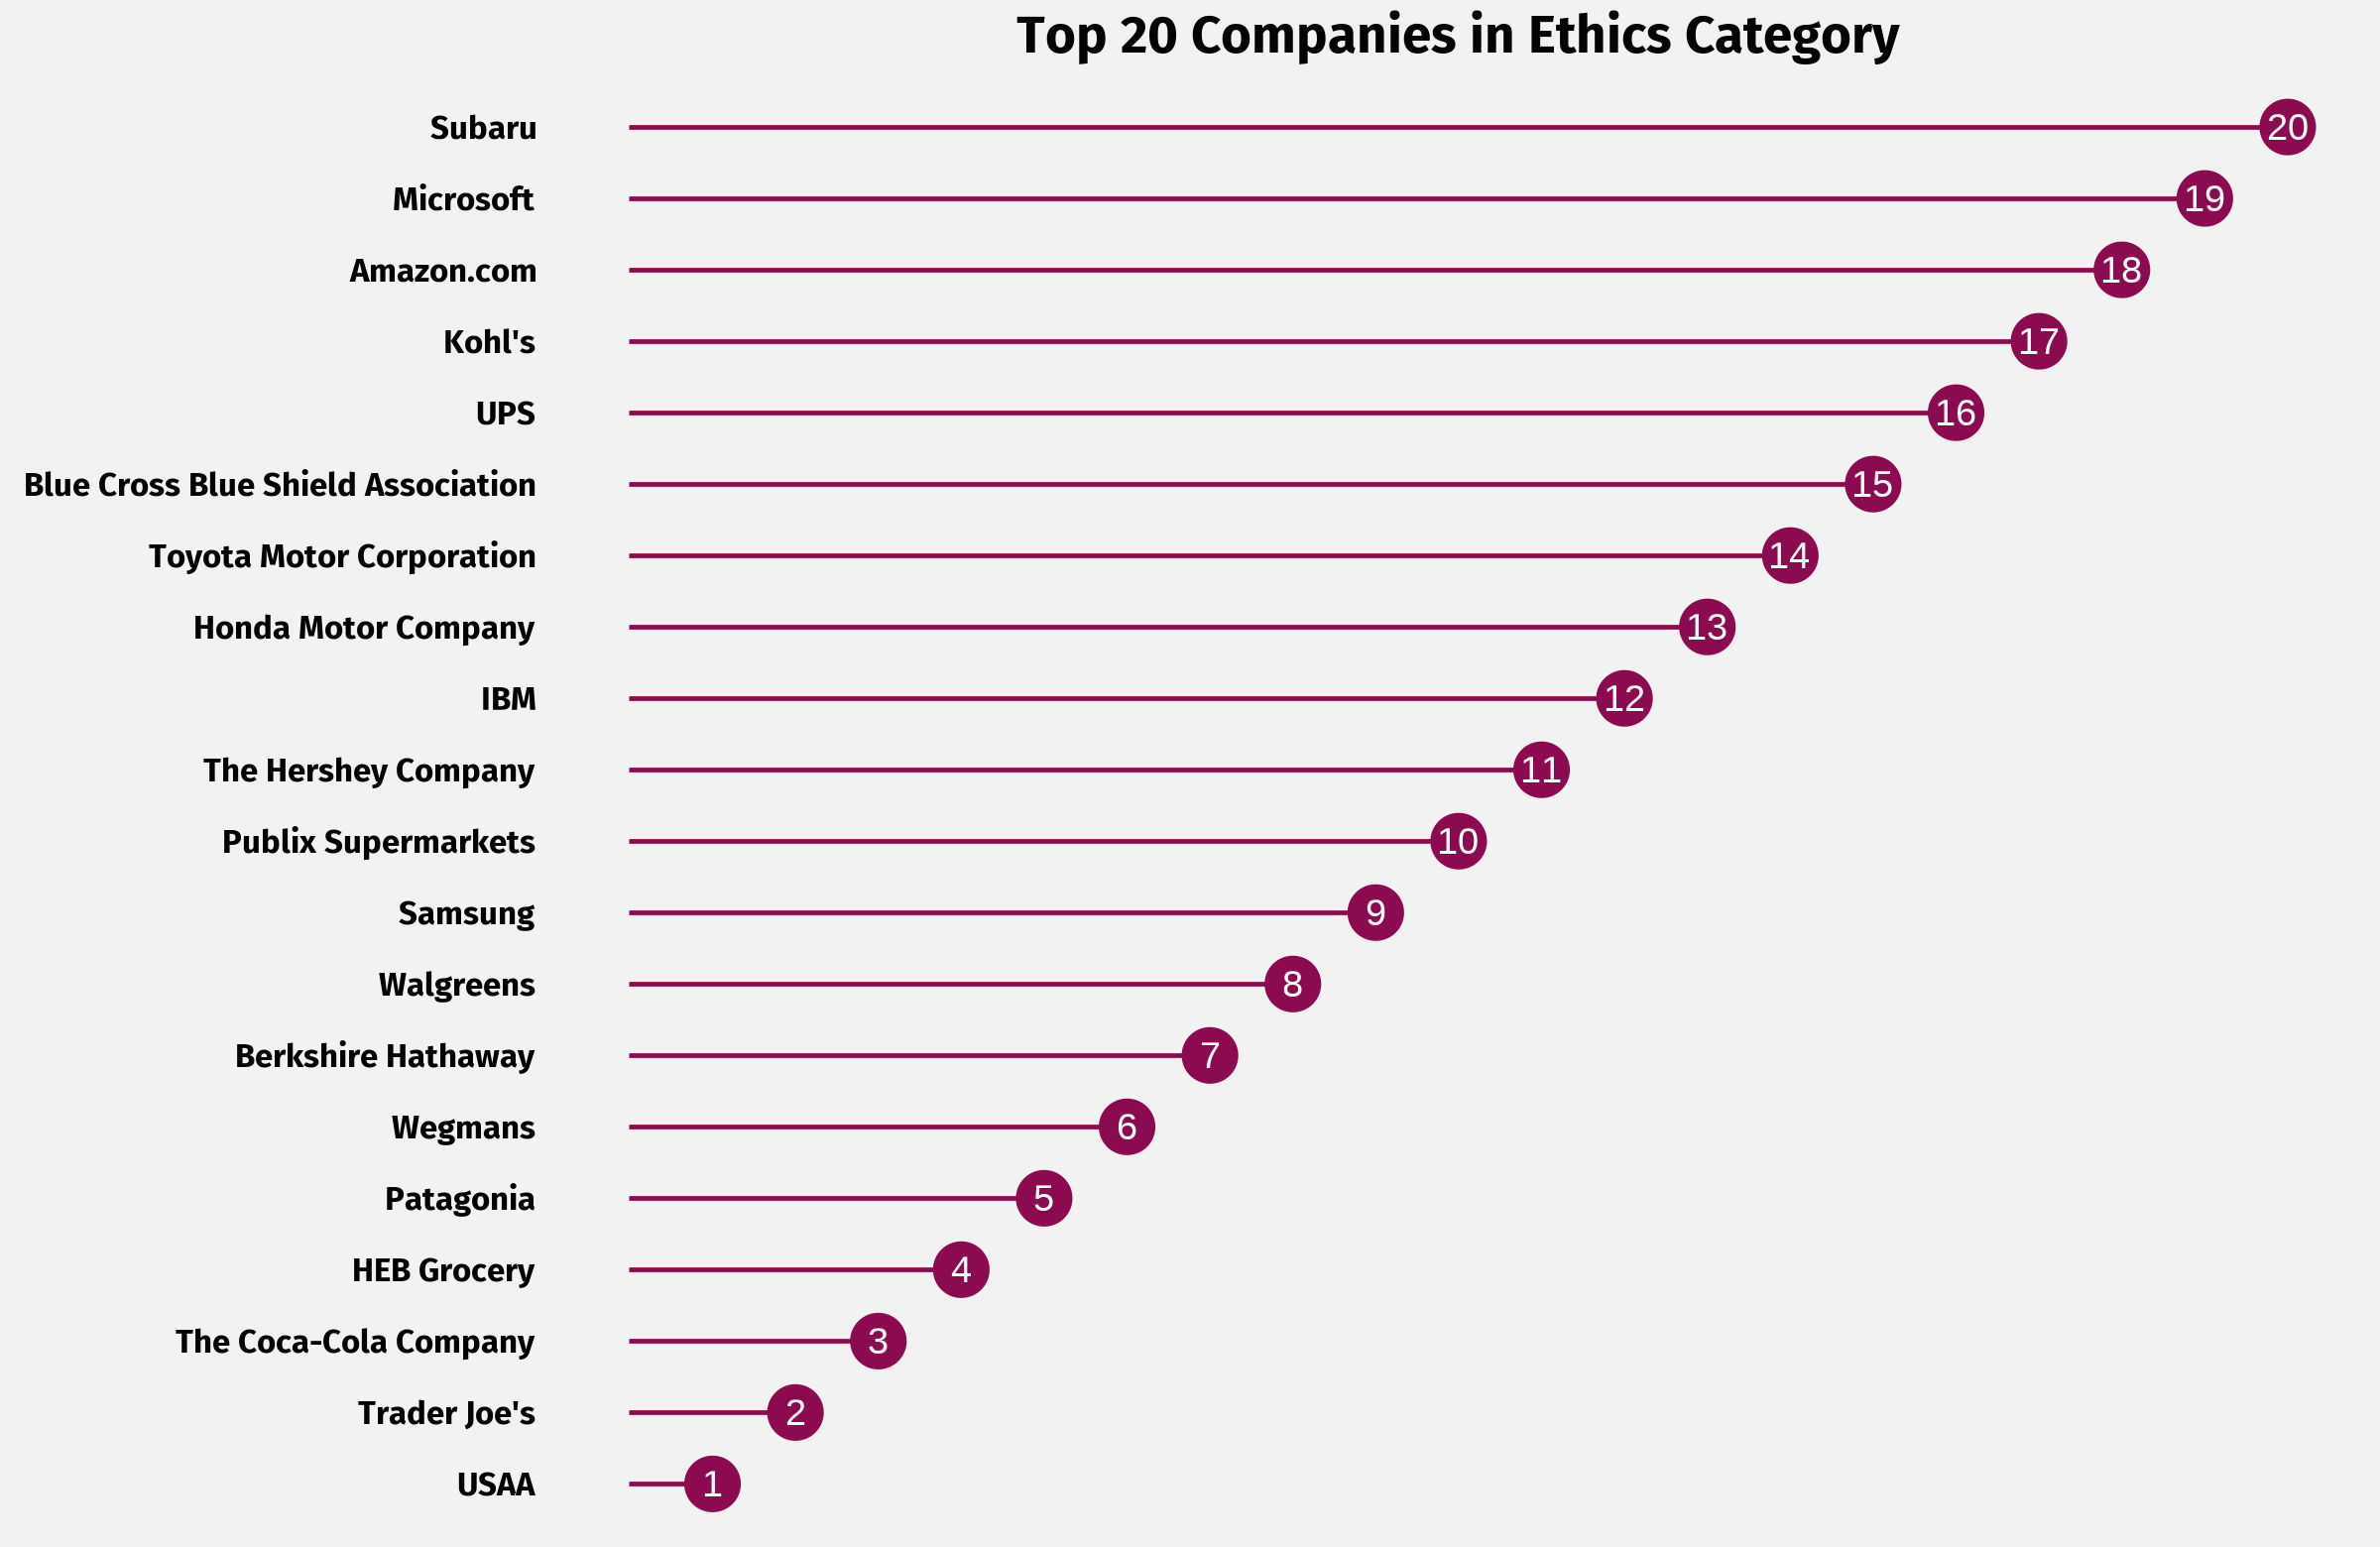

In [115]:
eth <- reputation %>%
filter(name == 'ETHICS')%>%
arrange(rank)%>%
head(20)%>%
ggplot(aes(reorder(company, rank),rank))+
geom_point( size=15, color="#8B0A50")  +
  geom_segment(aes(x=company, xend=company, y=0, yend=rank), color = '#8B0A50',size = 1) +
  geom_text(aes(label = rank), size = 10, color = 'white')+
  coord_flip()+
my_theme()+
labs(title = 'Top 20 Companies in Ethics Category')+
theme(axis.title.x = element_blank())+
theme(axis.title.y = element_blank())+
theme(axis.text.x = element_blank())
eth

Top 3 Companies

- USSA
- Trader Joe's
- The Coca-Cola Company

## Growth

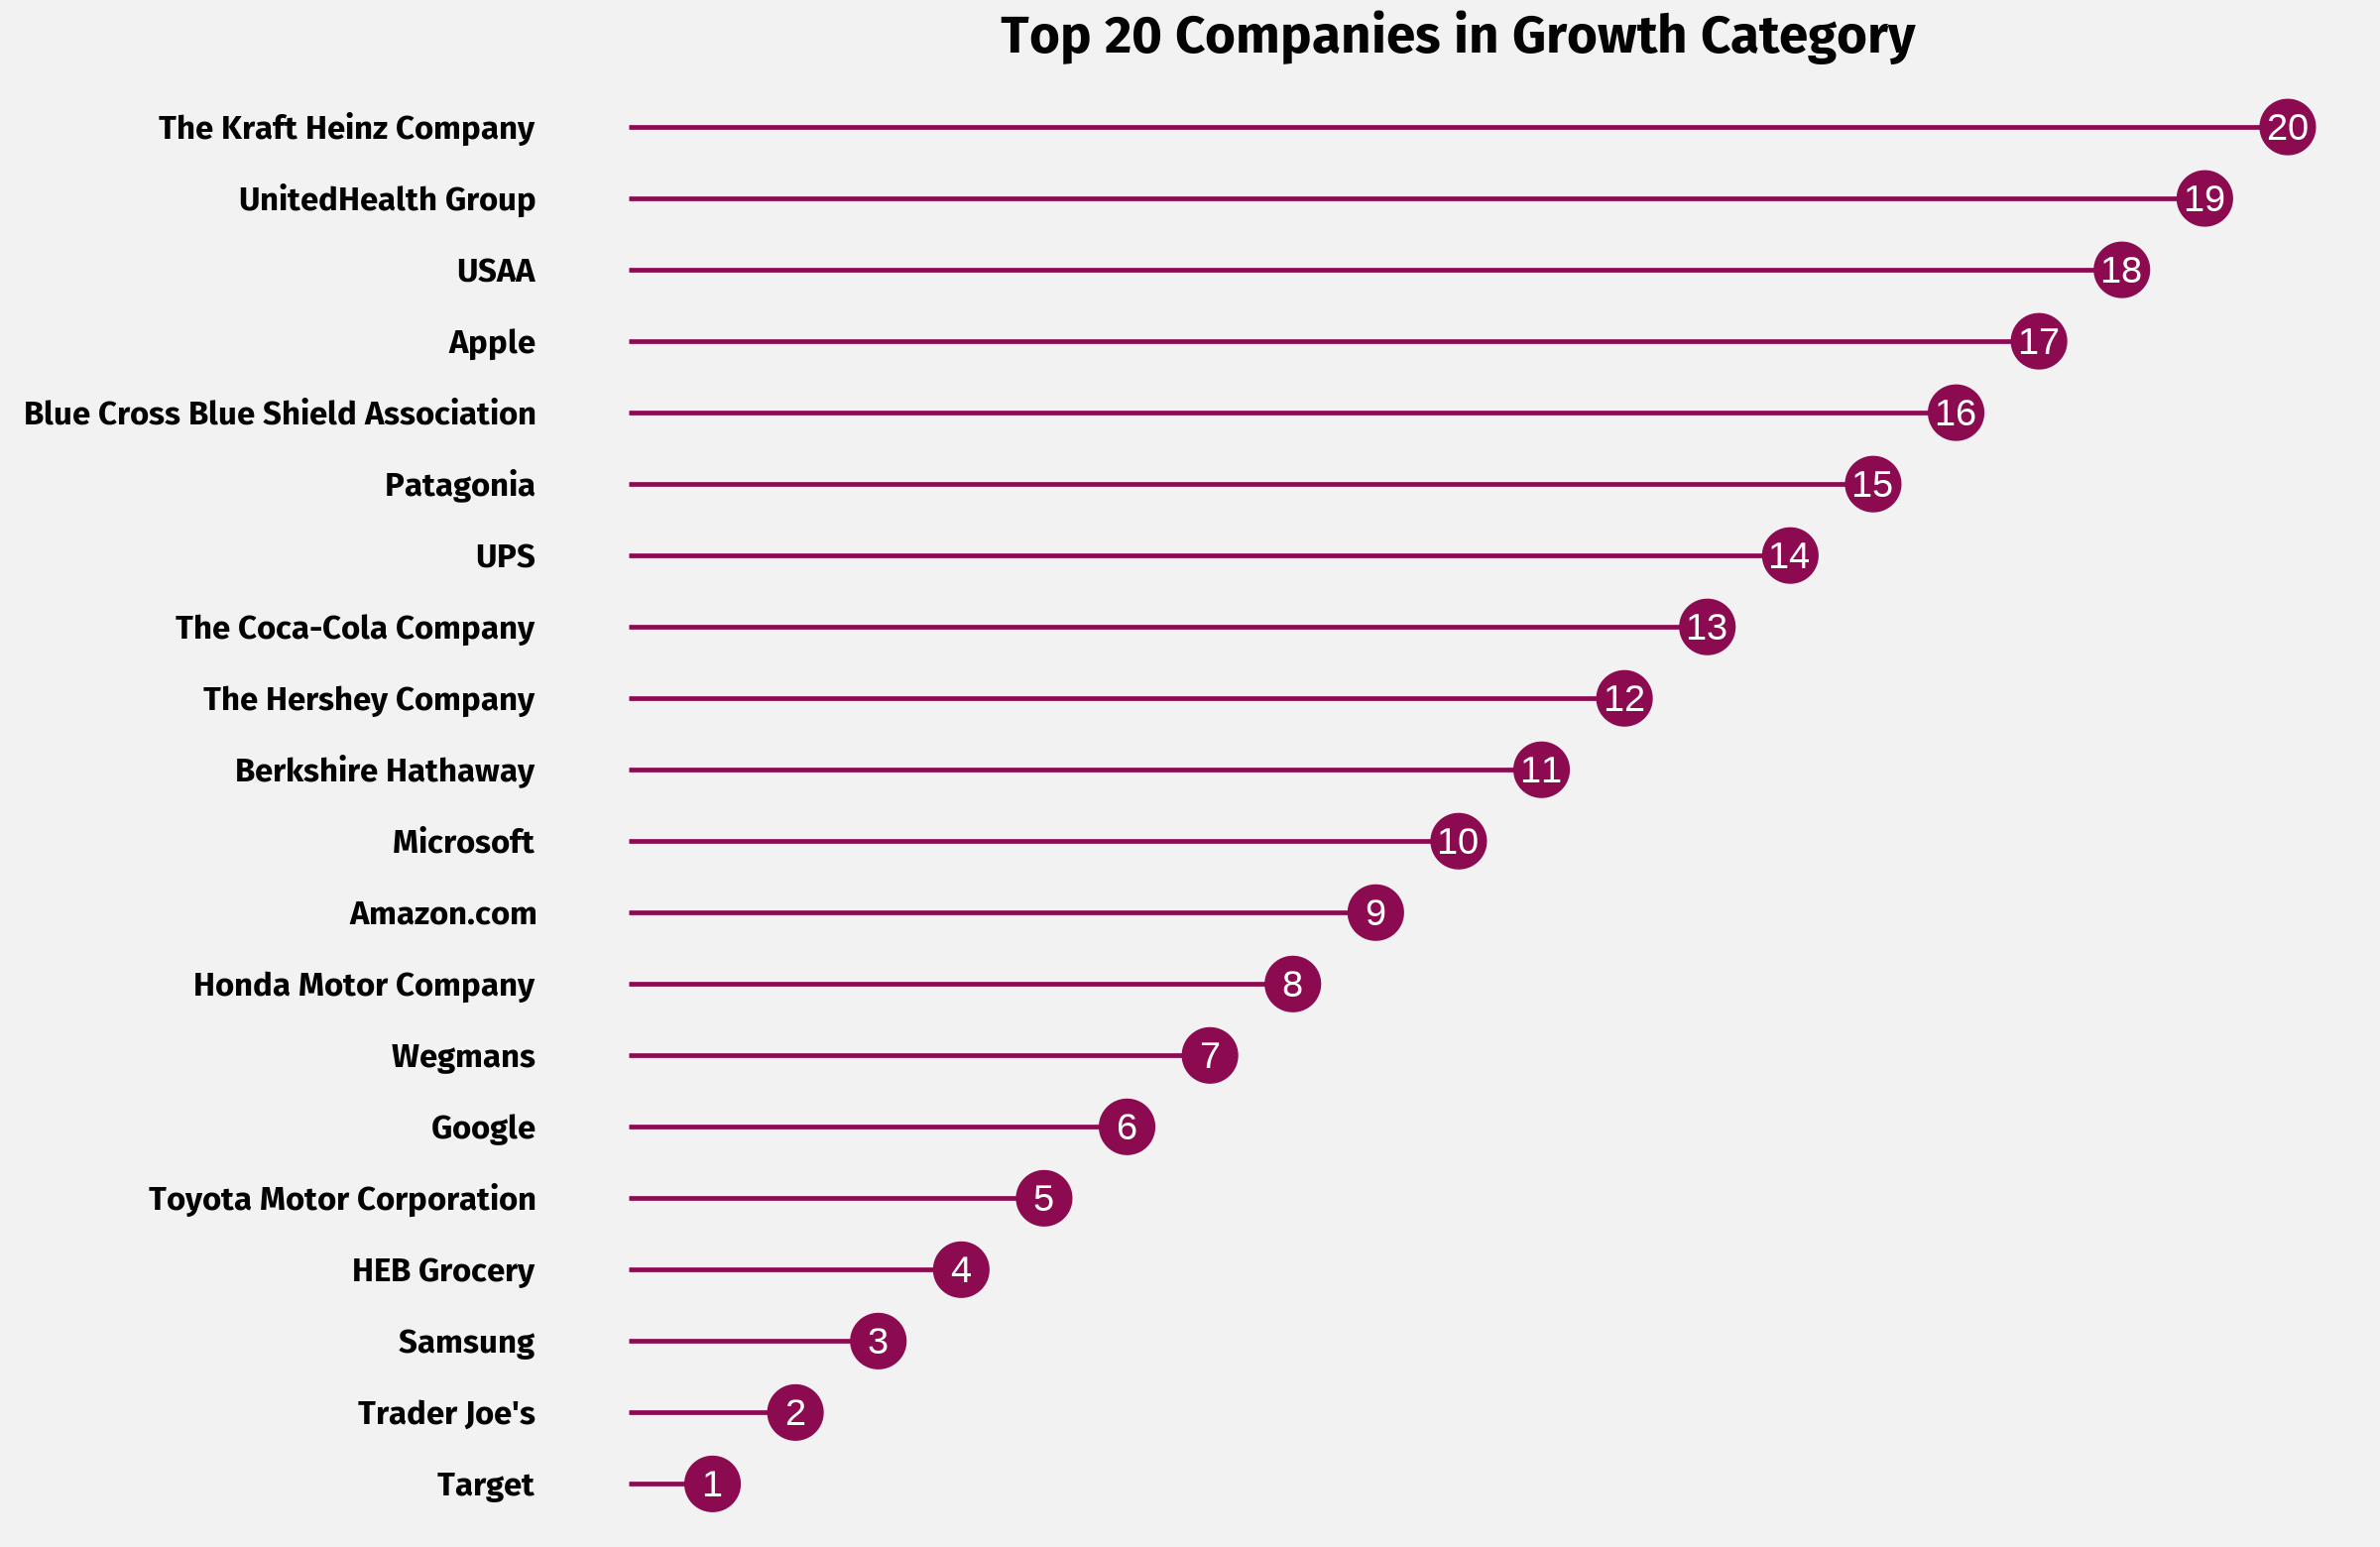

In [116]:
gro <- reputation %>%
filter(name == 'GROWTH')%>%
arrange(rank)%>%
head(20)%>%
ggplot(aes(reorder(company, rank),rank))+
geom_point( size=15, color="#8B0A50")  +
  geom_segment(aes(x=company, xend=company, y=0, yend=rank), color = '#8B0A50',size = 1) +
  geom_text(aes(label = rank), size = 10, color = 'white')+
  coord_flip()+
my_theme()+
labs(title = 'Top 20 Companies in Growth Category')+
theme(axis.title.x = element_blank())+
theme(axis.title.y = element_blank())+
theme(axis.text.x = element_blank())
gro

Top 3 Companies

- Target
- Trader Joe's
- Samsung

## P&S

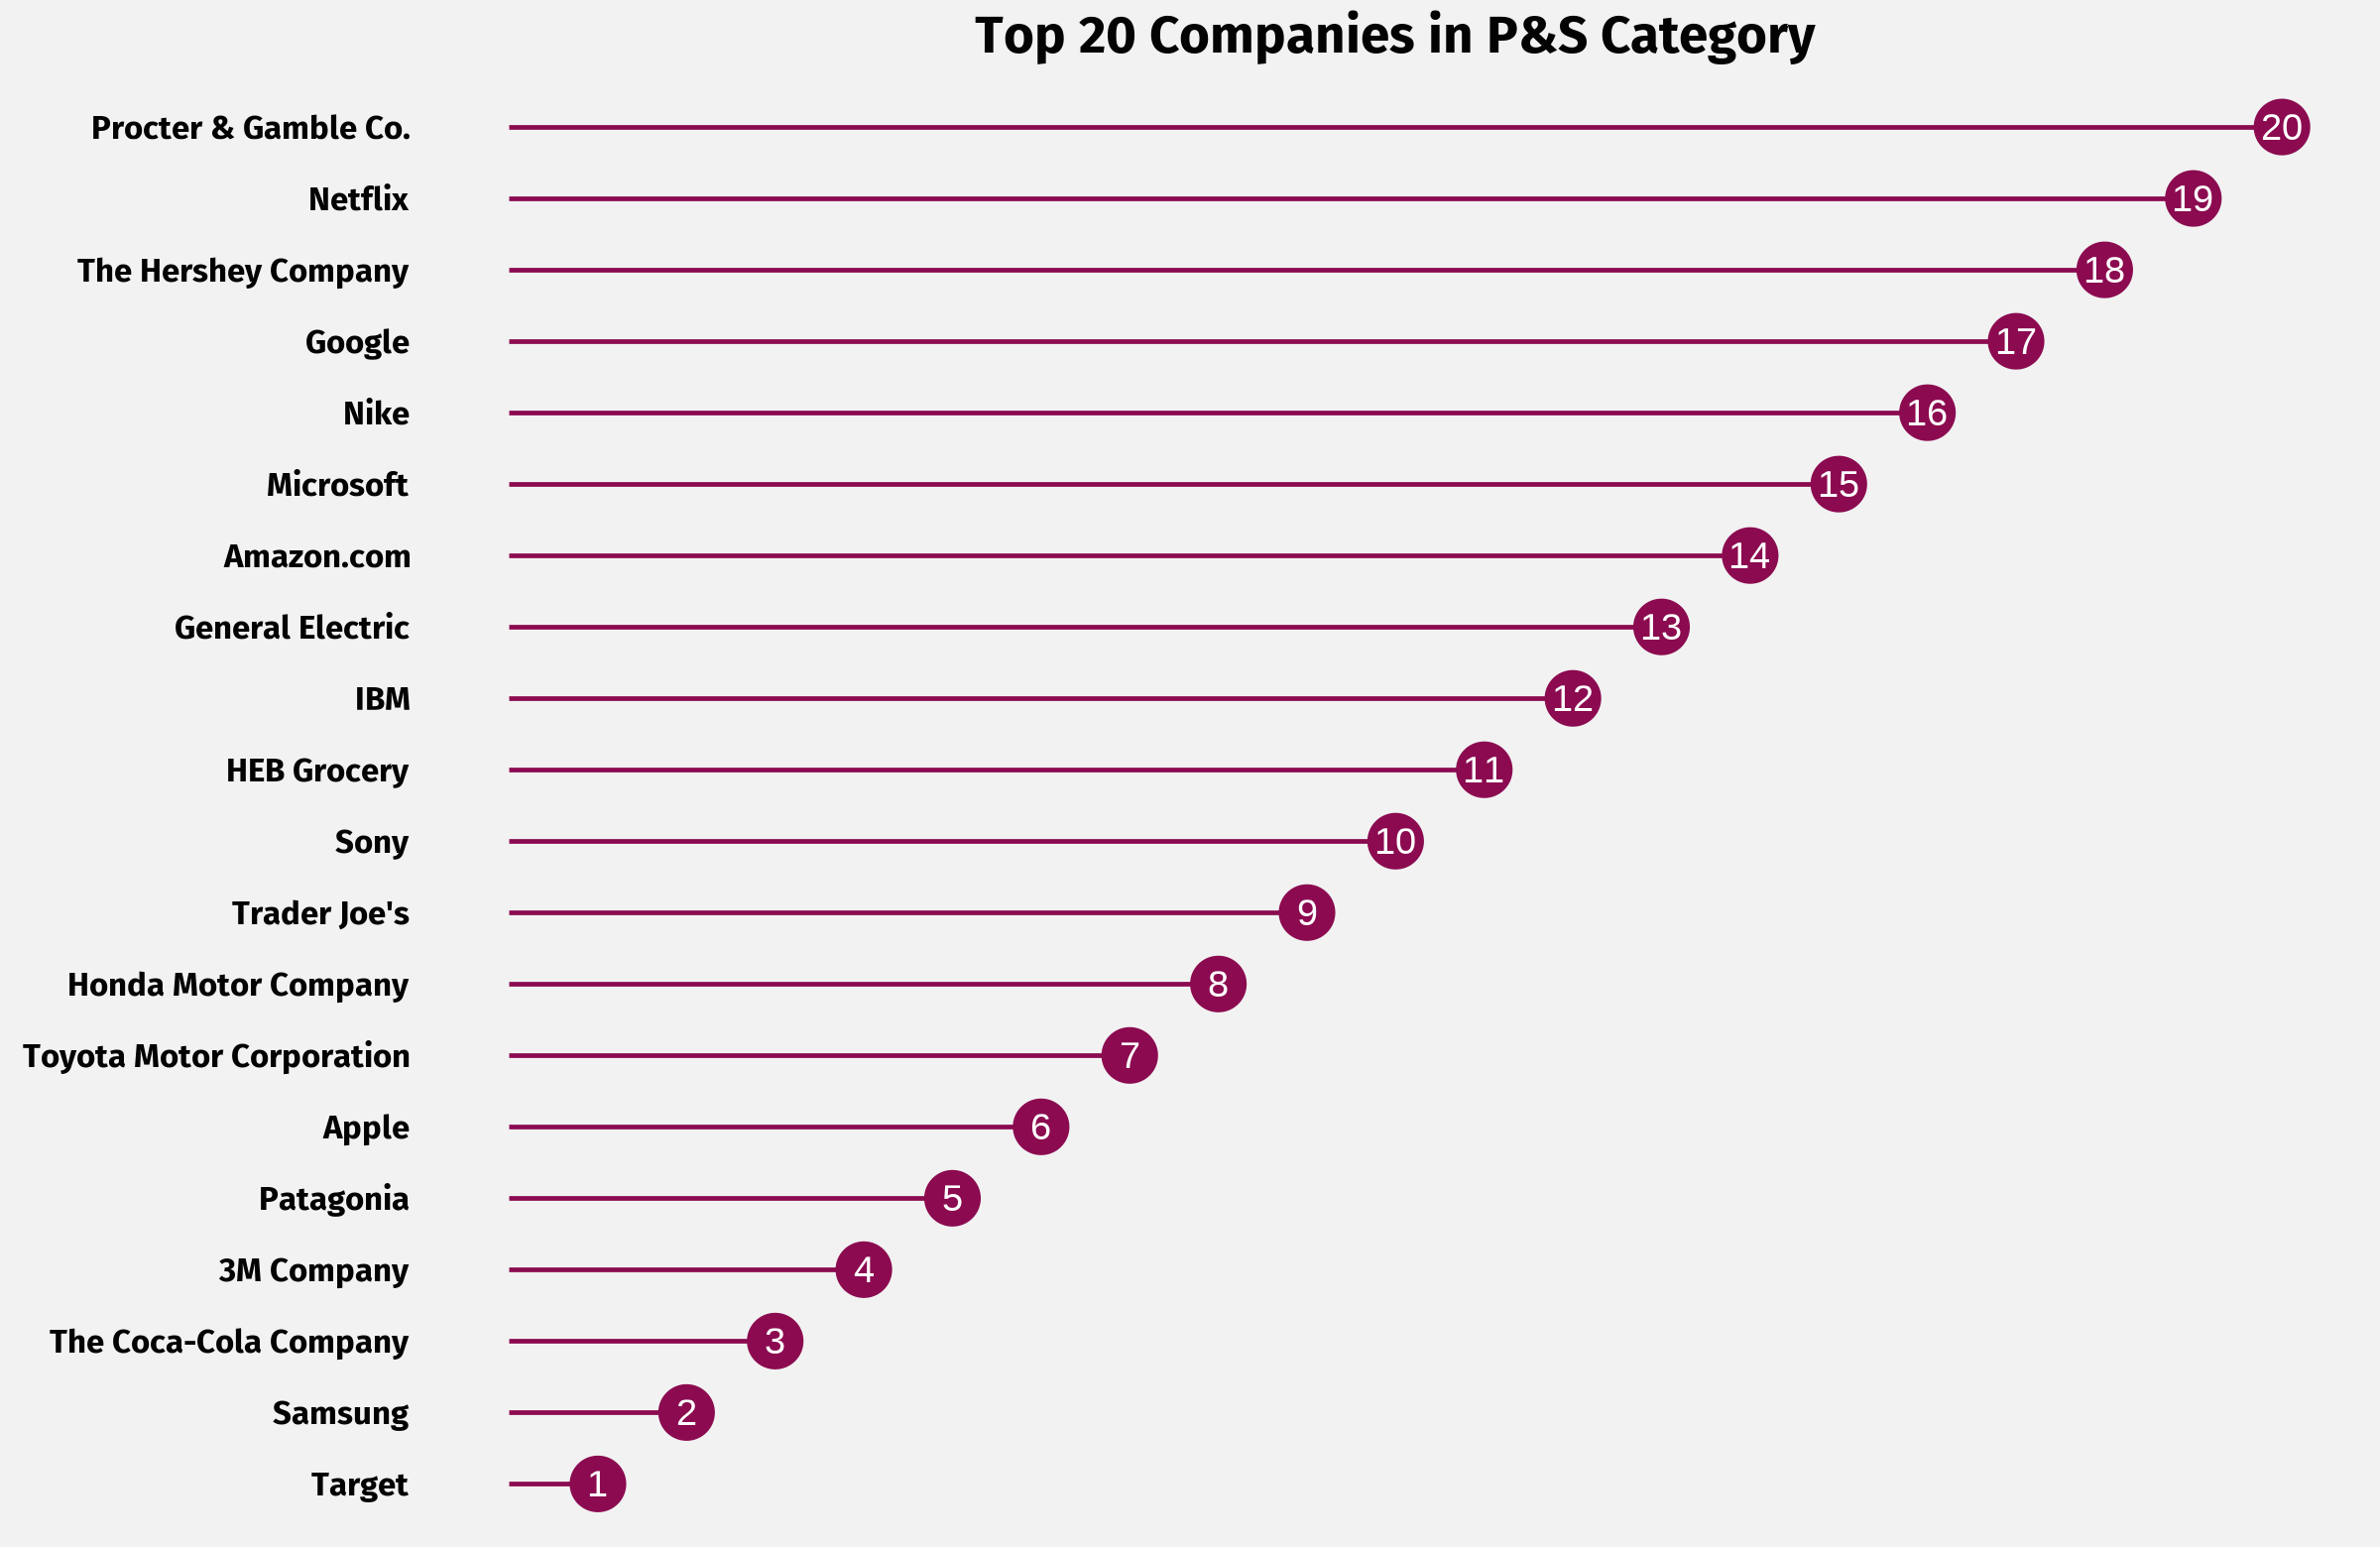

In [117]:
ps <- reputation %>%
filter(name == 'P&S')%>%
arrange(rank)%>%
head(20)%>%
ggplot(aes(reorder(company, rank),rank))+
geom_point(size=15, color="#8B0A50")  +
  geom_segment(aes(x=company, xend=company, y=0, yend=rank), color = '#8B0A50',size = 1) +
  geom_text(aes(label = rank), size = 10, color = 'white')+
  coord_flip()+
my_theme()+
labs(title = 'Top 20 Companies in P&S Category')+
theme(axis.title.x = element_blank())+
theme(axis.title.y = element_blank())+
theme(axis.text.x = element_blank())
ps

Top 3 Companies

- Target
- Samsang
- The Cola-Cola Company

## Trust

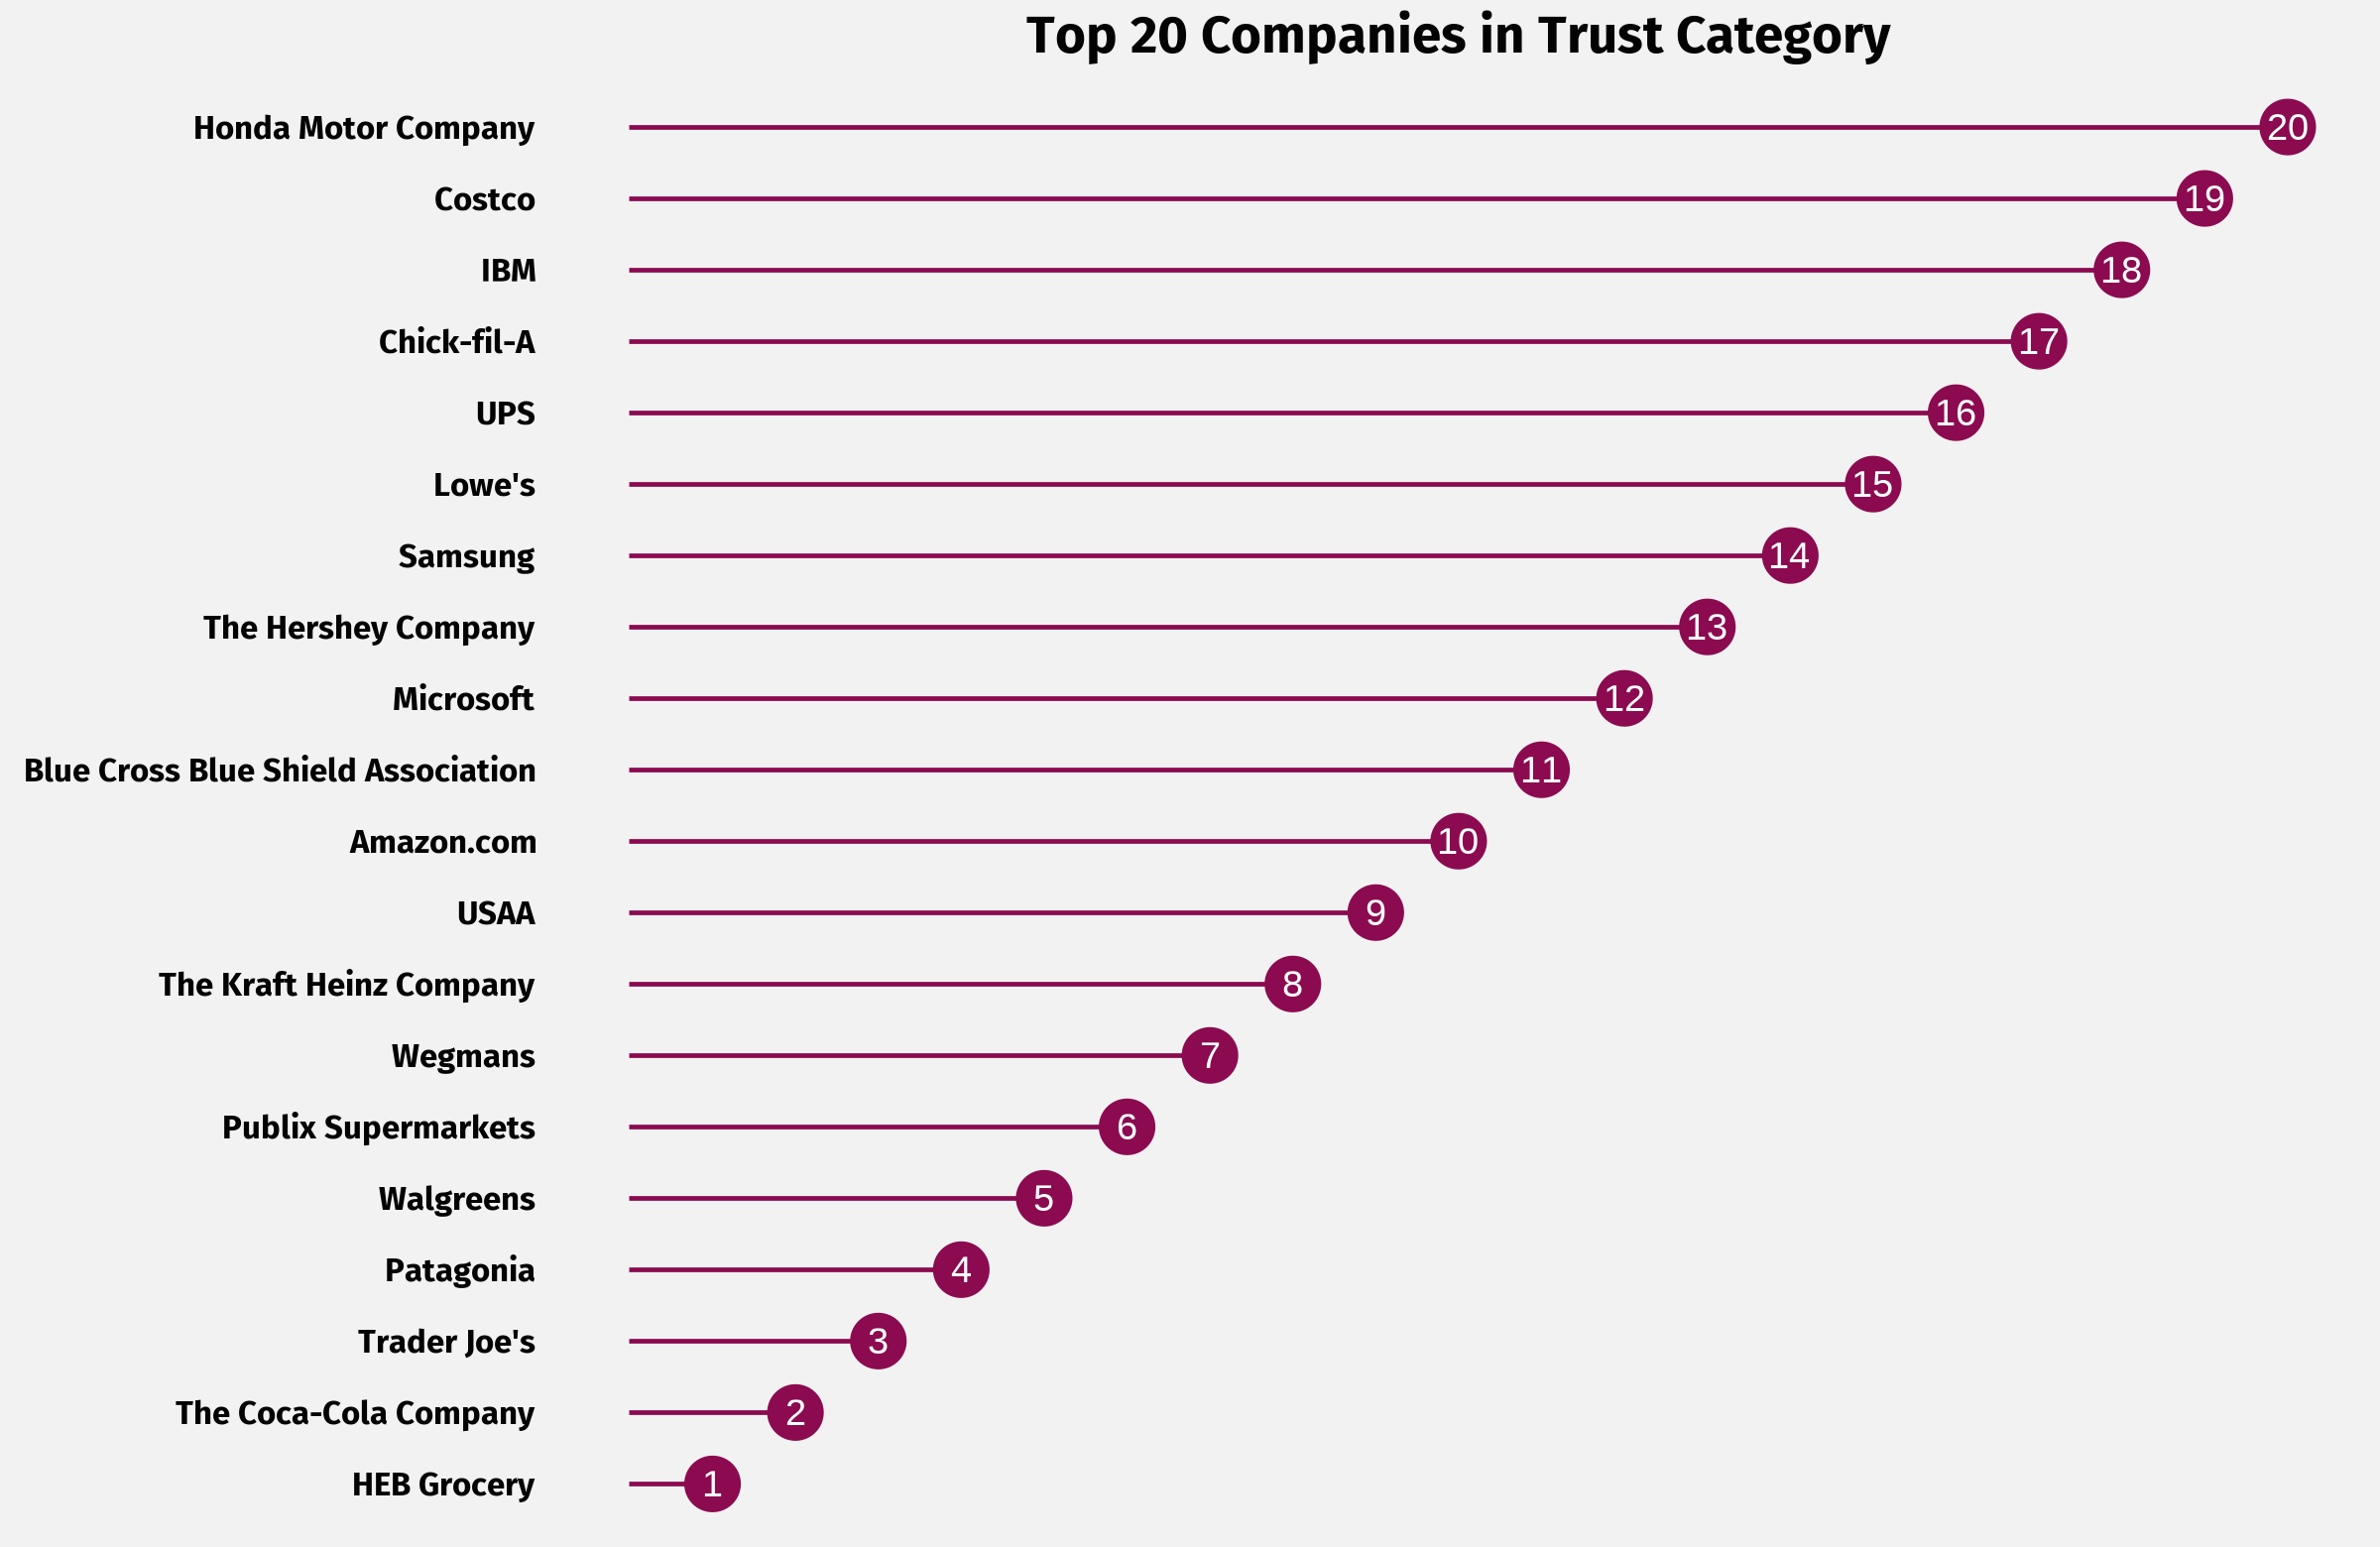

In [118]:
tr <- reputation %>%
filter(name == 'TRUST')%>%
arrange(rank)%>%
head(20)%>%
ggplot(aes(reorder(company, rank),rank))+
geom_point(size=15, color="#8B0A50")  +
  geom_segment(aes(x=company, xend=company, y=0, yend=rank), color = '#8B0A50',size = 1) +
  geom_text(aes(label = rank), size = 10, color = 'white')+
  coord_flip()+
my_theme()+
labs(title = 'Top 20 Companies in Trust Category')+
theme(axis.title.x = element_blank())+
theme(axis.title.y = element_blank())+
theme(axis.text.x = element_blank())
tr

Top 3 Companies

- HEB Grocery
- The Cola-Cola Company
- Trader Joe's

## Vision

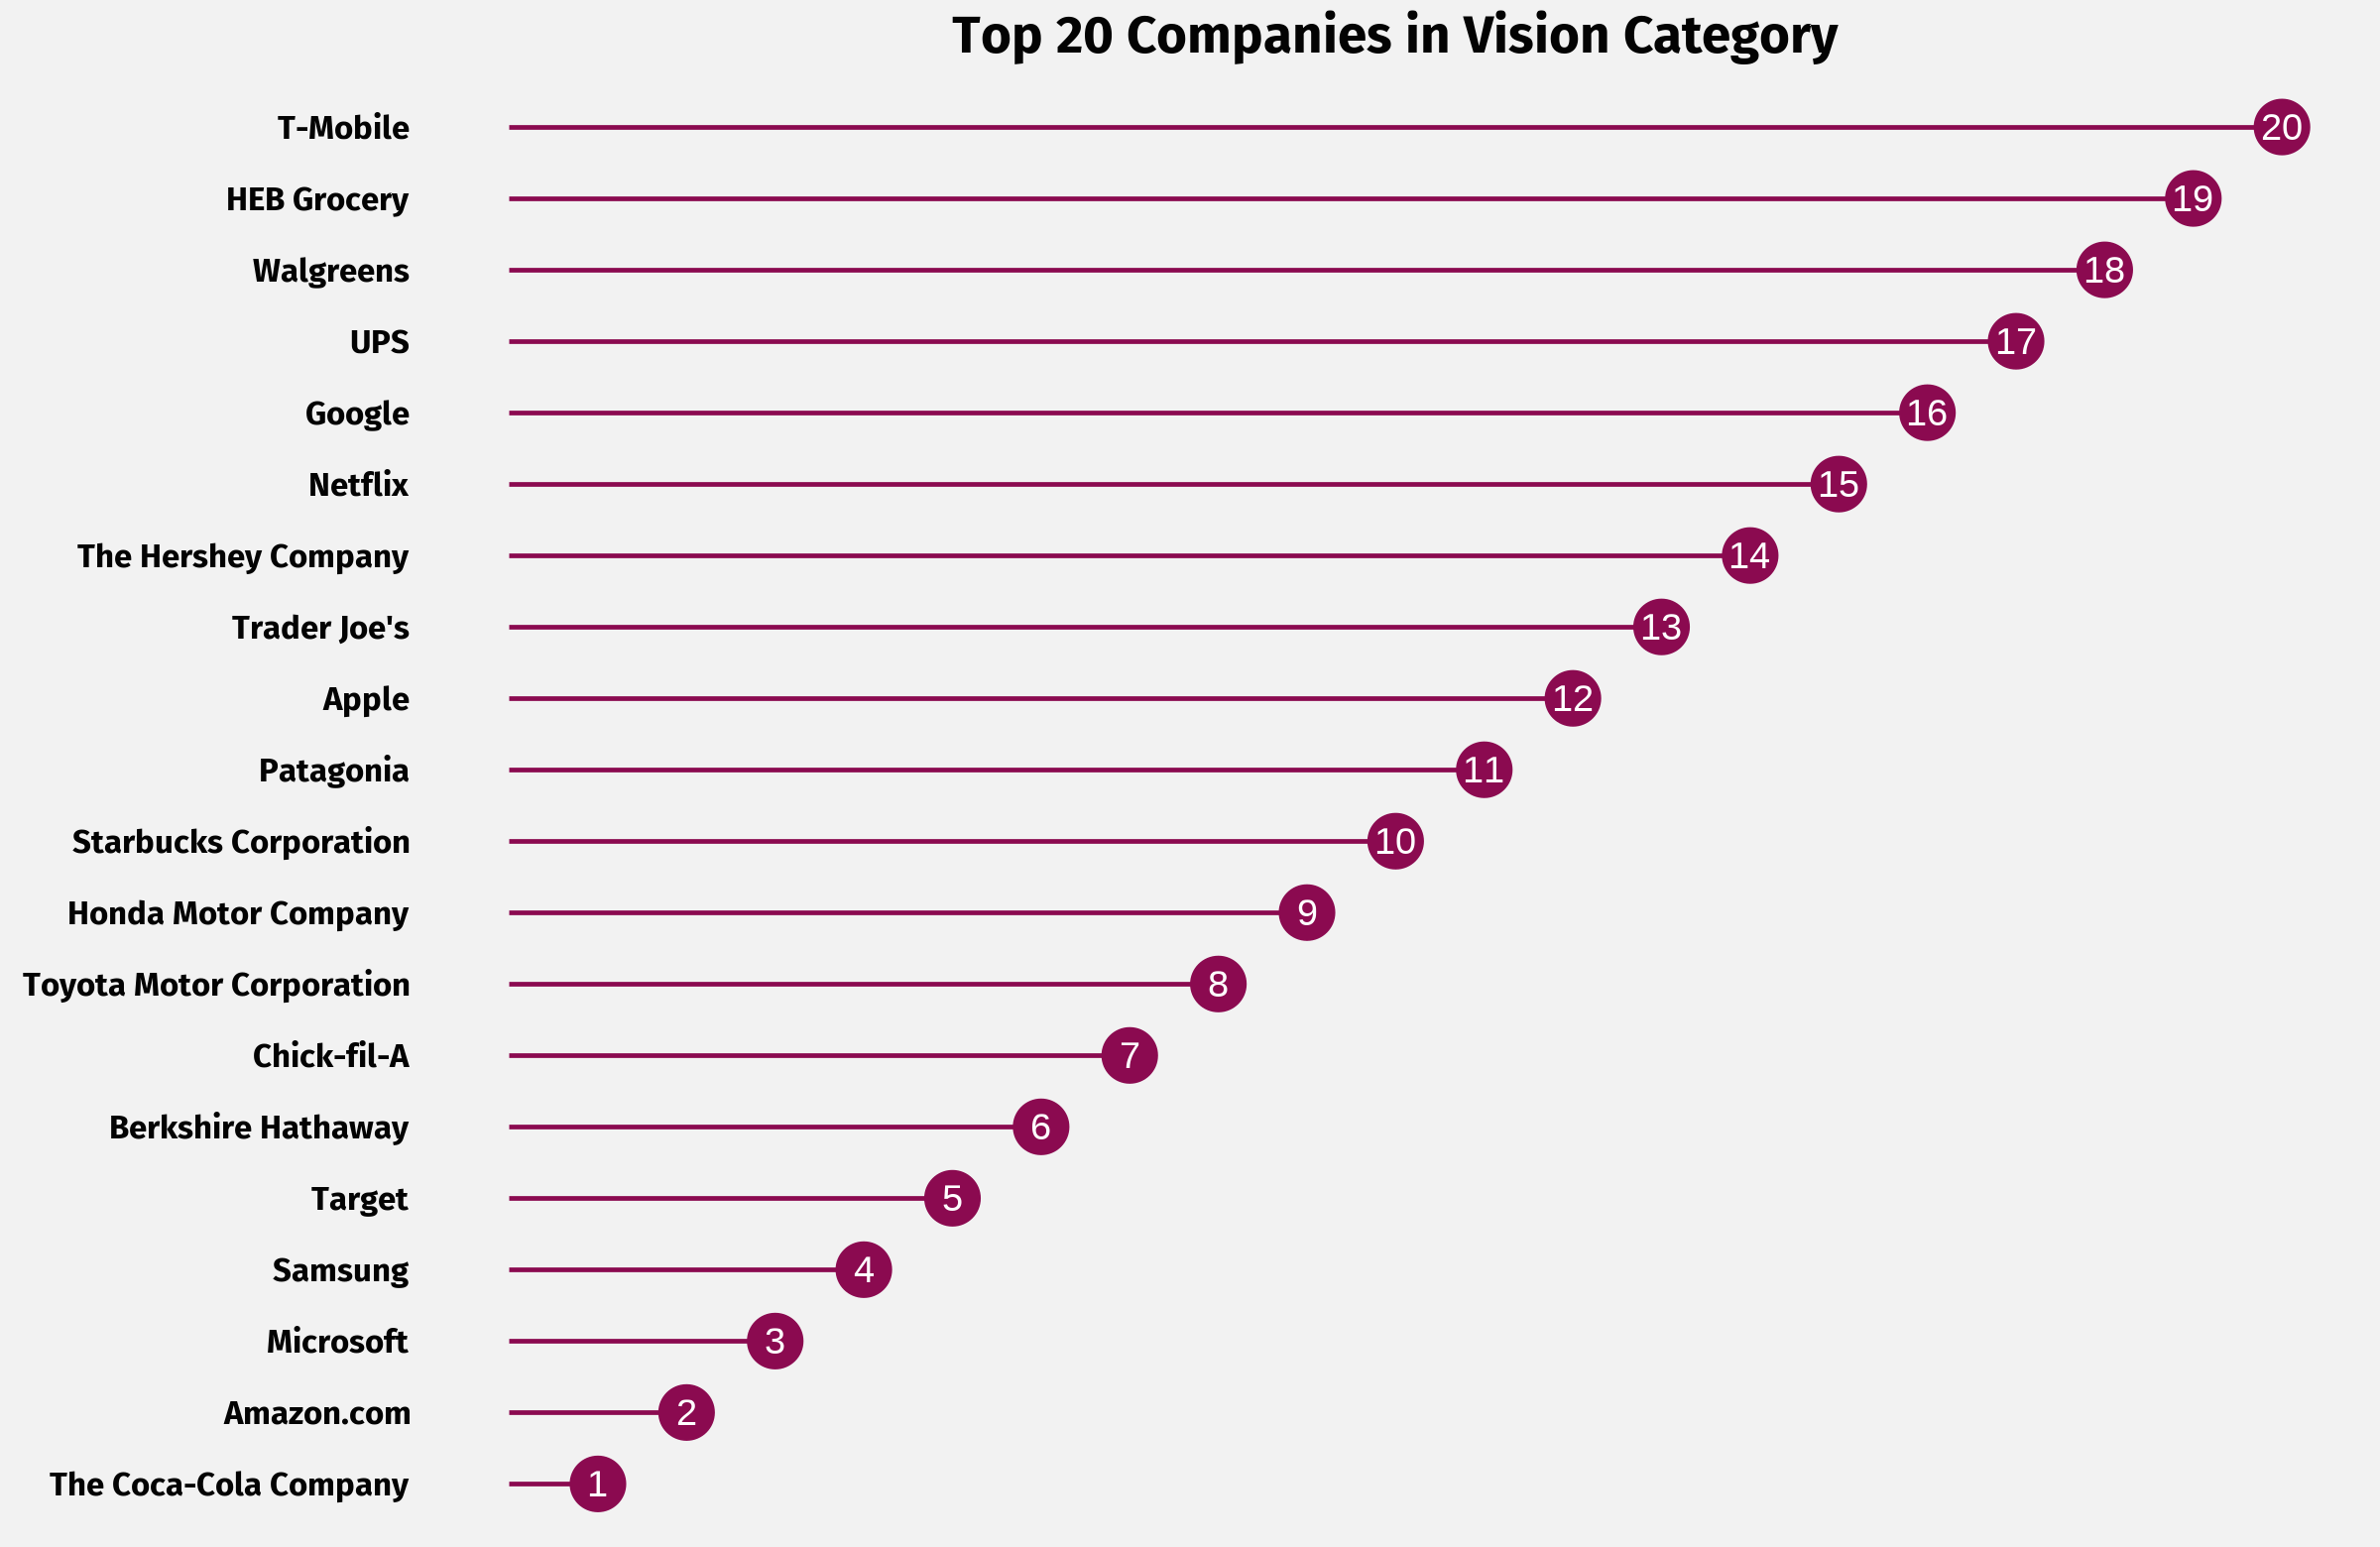

In [119]:
vi <- reputation %>%
filter(name == 'VISION')%>%
arrange(rank)%>%
head(20)%>%
ggplot(aes(reorder(company, rank),rank))+
geom_point(size=15, color="#8B0A50")  +
  geom_segment(aes(x=company, xend=company, y=0, yend=rank), color = '#8B0A50',size = 1) +
  geom_text(aes(label = rank), size = 10, color = 'white')+
  coord_flip()+
my_theme()+
labs(title = 'Top 20 Companies in Vision Category')+
theme(axis.title.x = element_blank())+
theme(axis.title.y = element_blank())+
theme(axis.text.x = element_blank())
vi

Top 3 Companies

- The Coca-Cola Company
- Amazon.com
- Microsoft

# Reputation According to Scores  

- **80 & above: Excellent**

- **75-79: Very Good**

- **70-74: Good** 

- **65-69: Fair**  

- **55-64: Poor**  

- **50-54: Very Poor** 

- **Below 50: Critical**

# Reputation of Tech Companies 

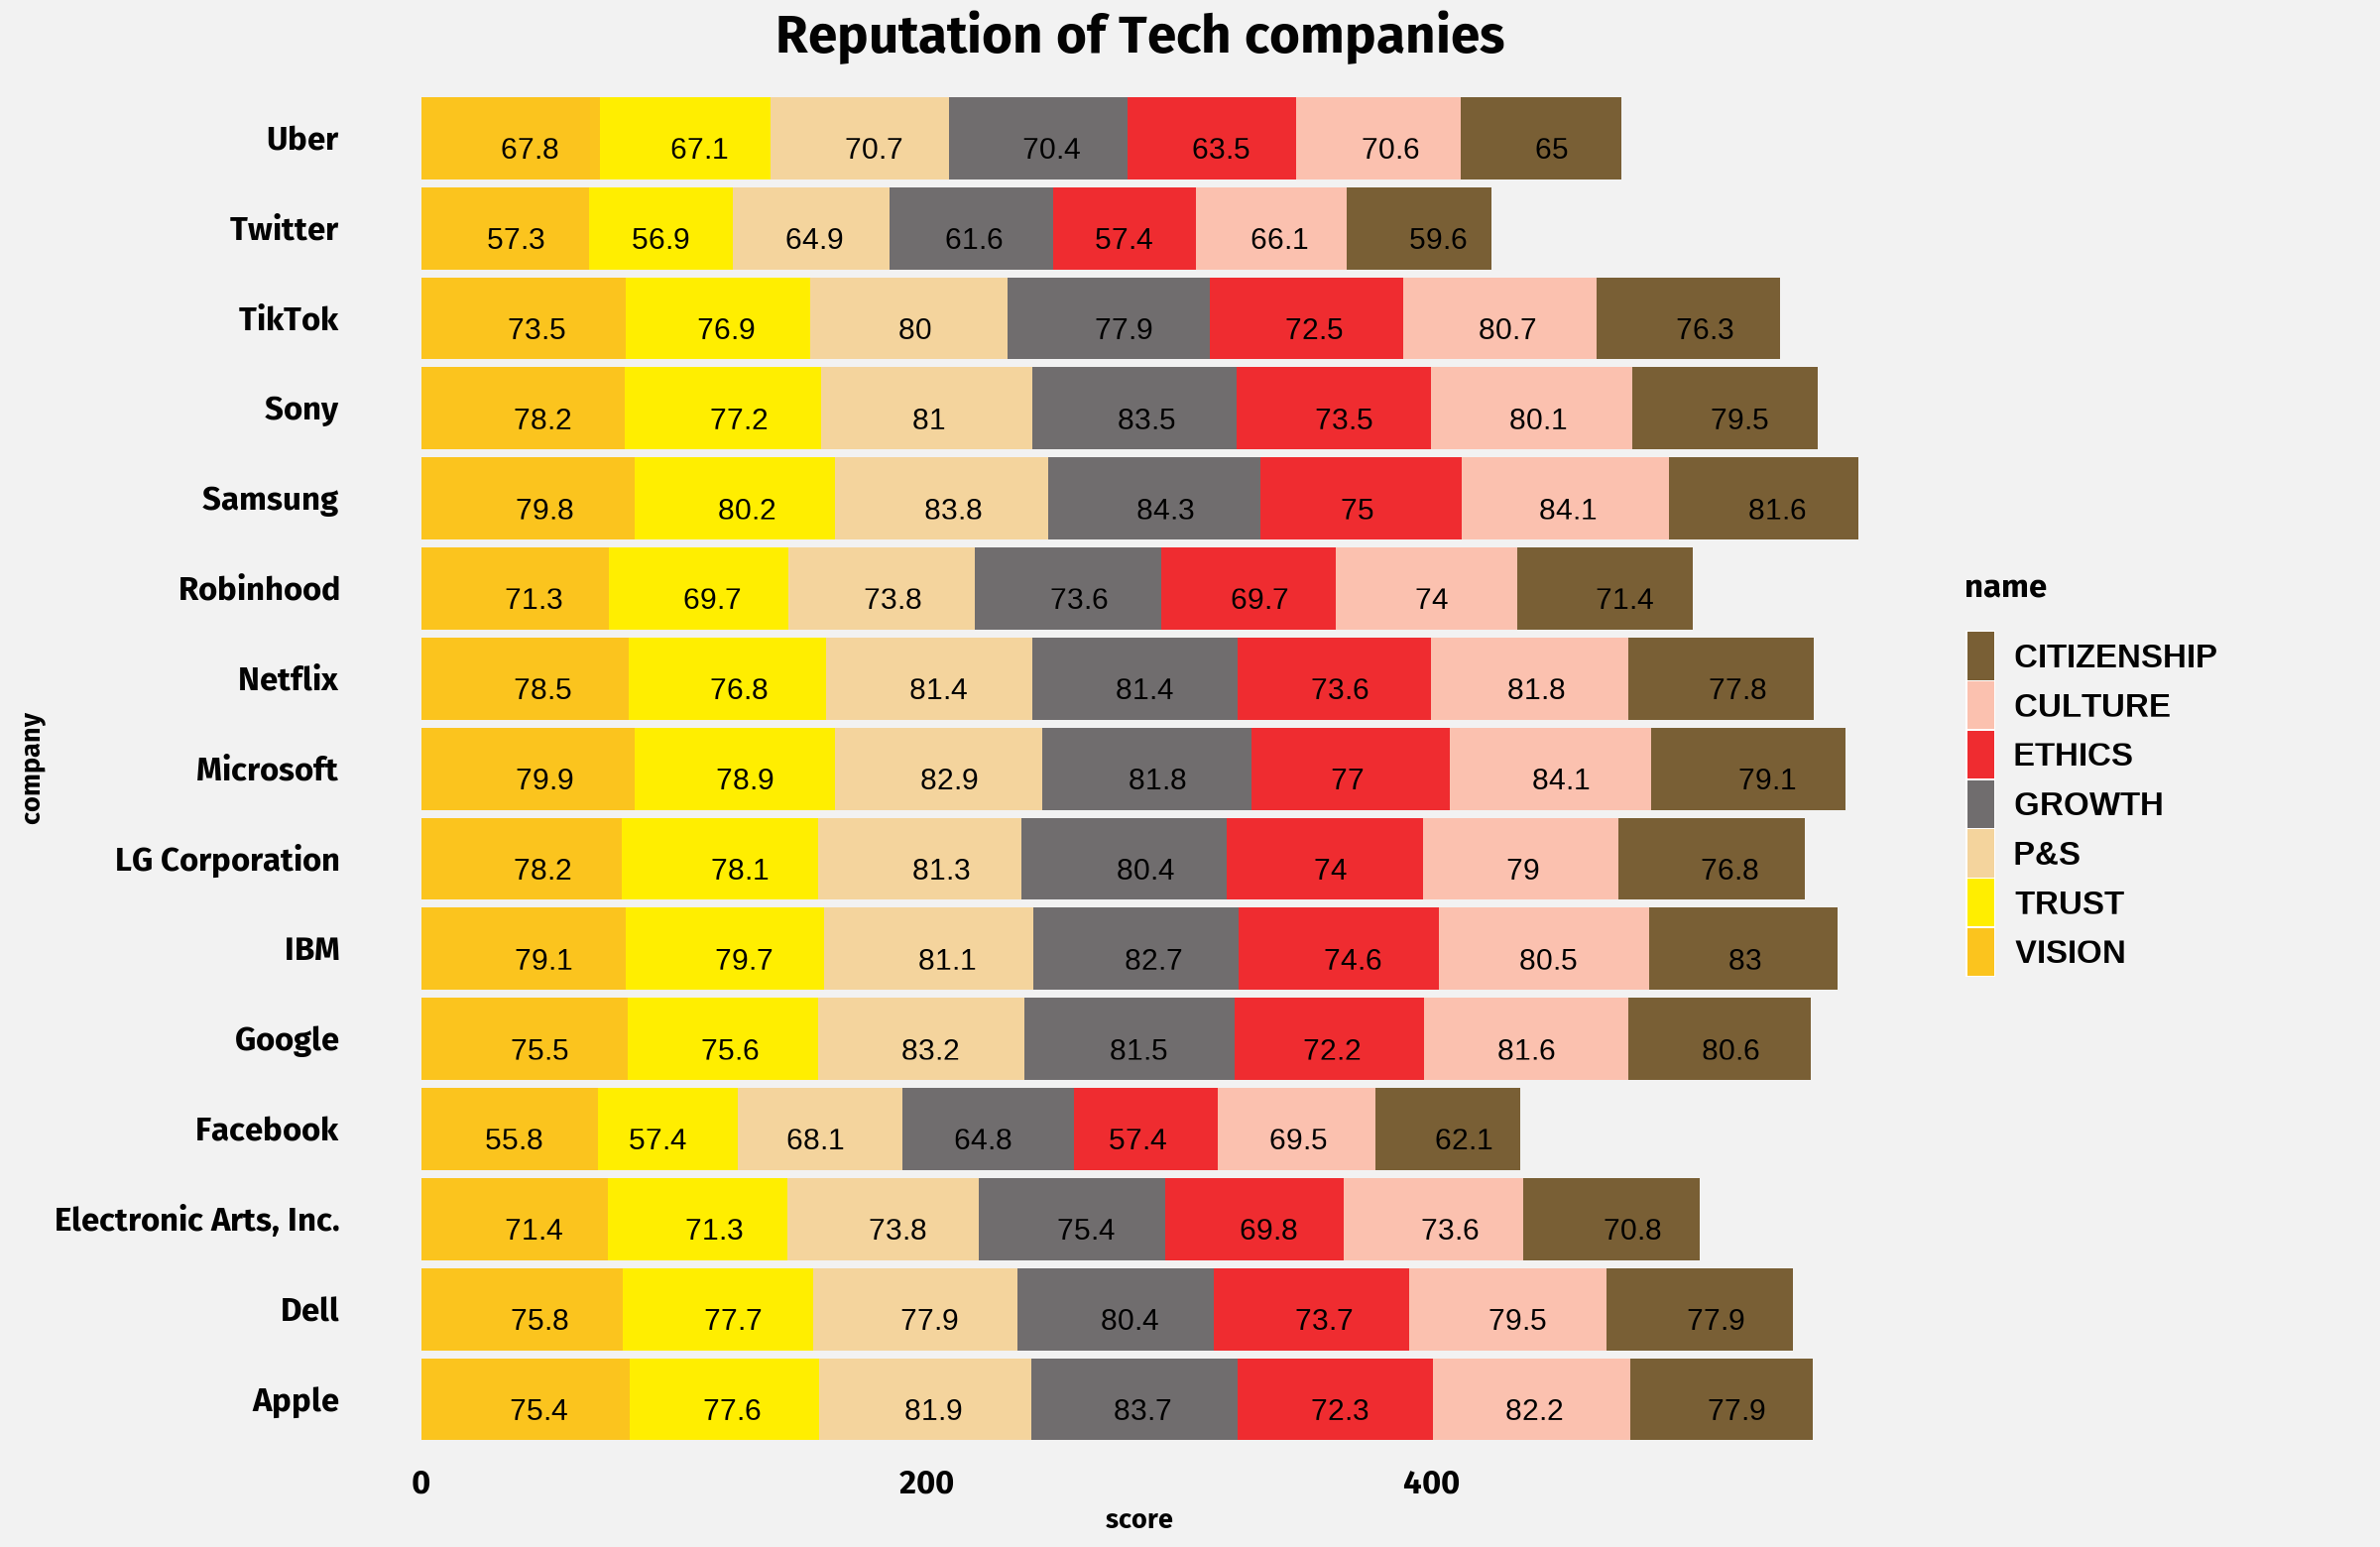

In [120]:
reputation %>%
filter(industry == 'Tech')%>%
group_by(company)%>%
mutate(pos = cumsum(score) - score/2) %>% 
ggplot() +
geom_bar(aes(x=company, y=score, fill = name),stat = "identity") +
geom_text(aes(x=company, y=pos, label = prettyNum(score,big.mark = ","))
              , vjust = 1,hjust = 0.1,  size = 8) +
scale_y_continuous(labels = scales::comma) +
scale_fill_paletteer_d("khroma::soil") +
coord_flip()+
my_theme()+
labs(title = "Reputation of Tech companies")

# Reputation of Retail Companies

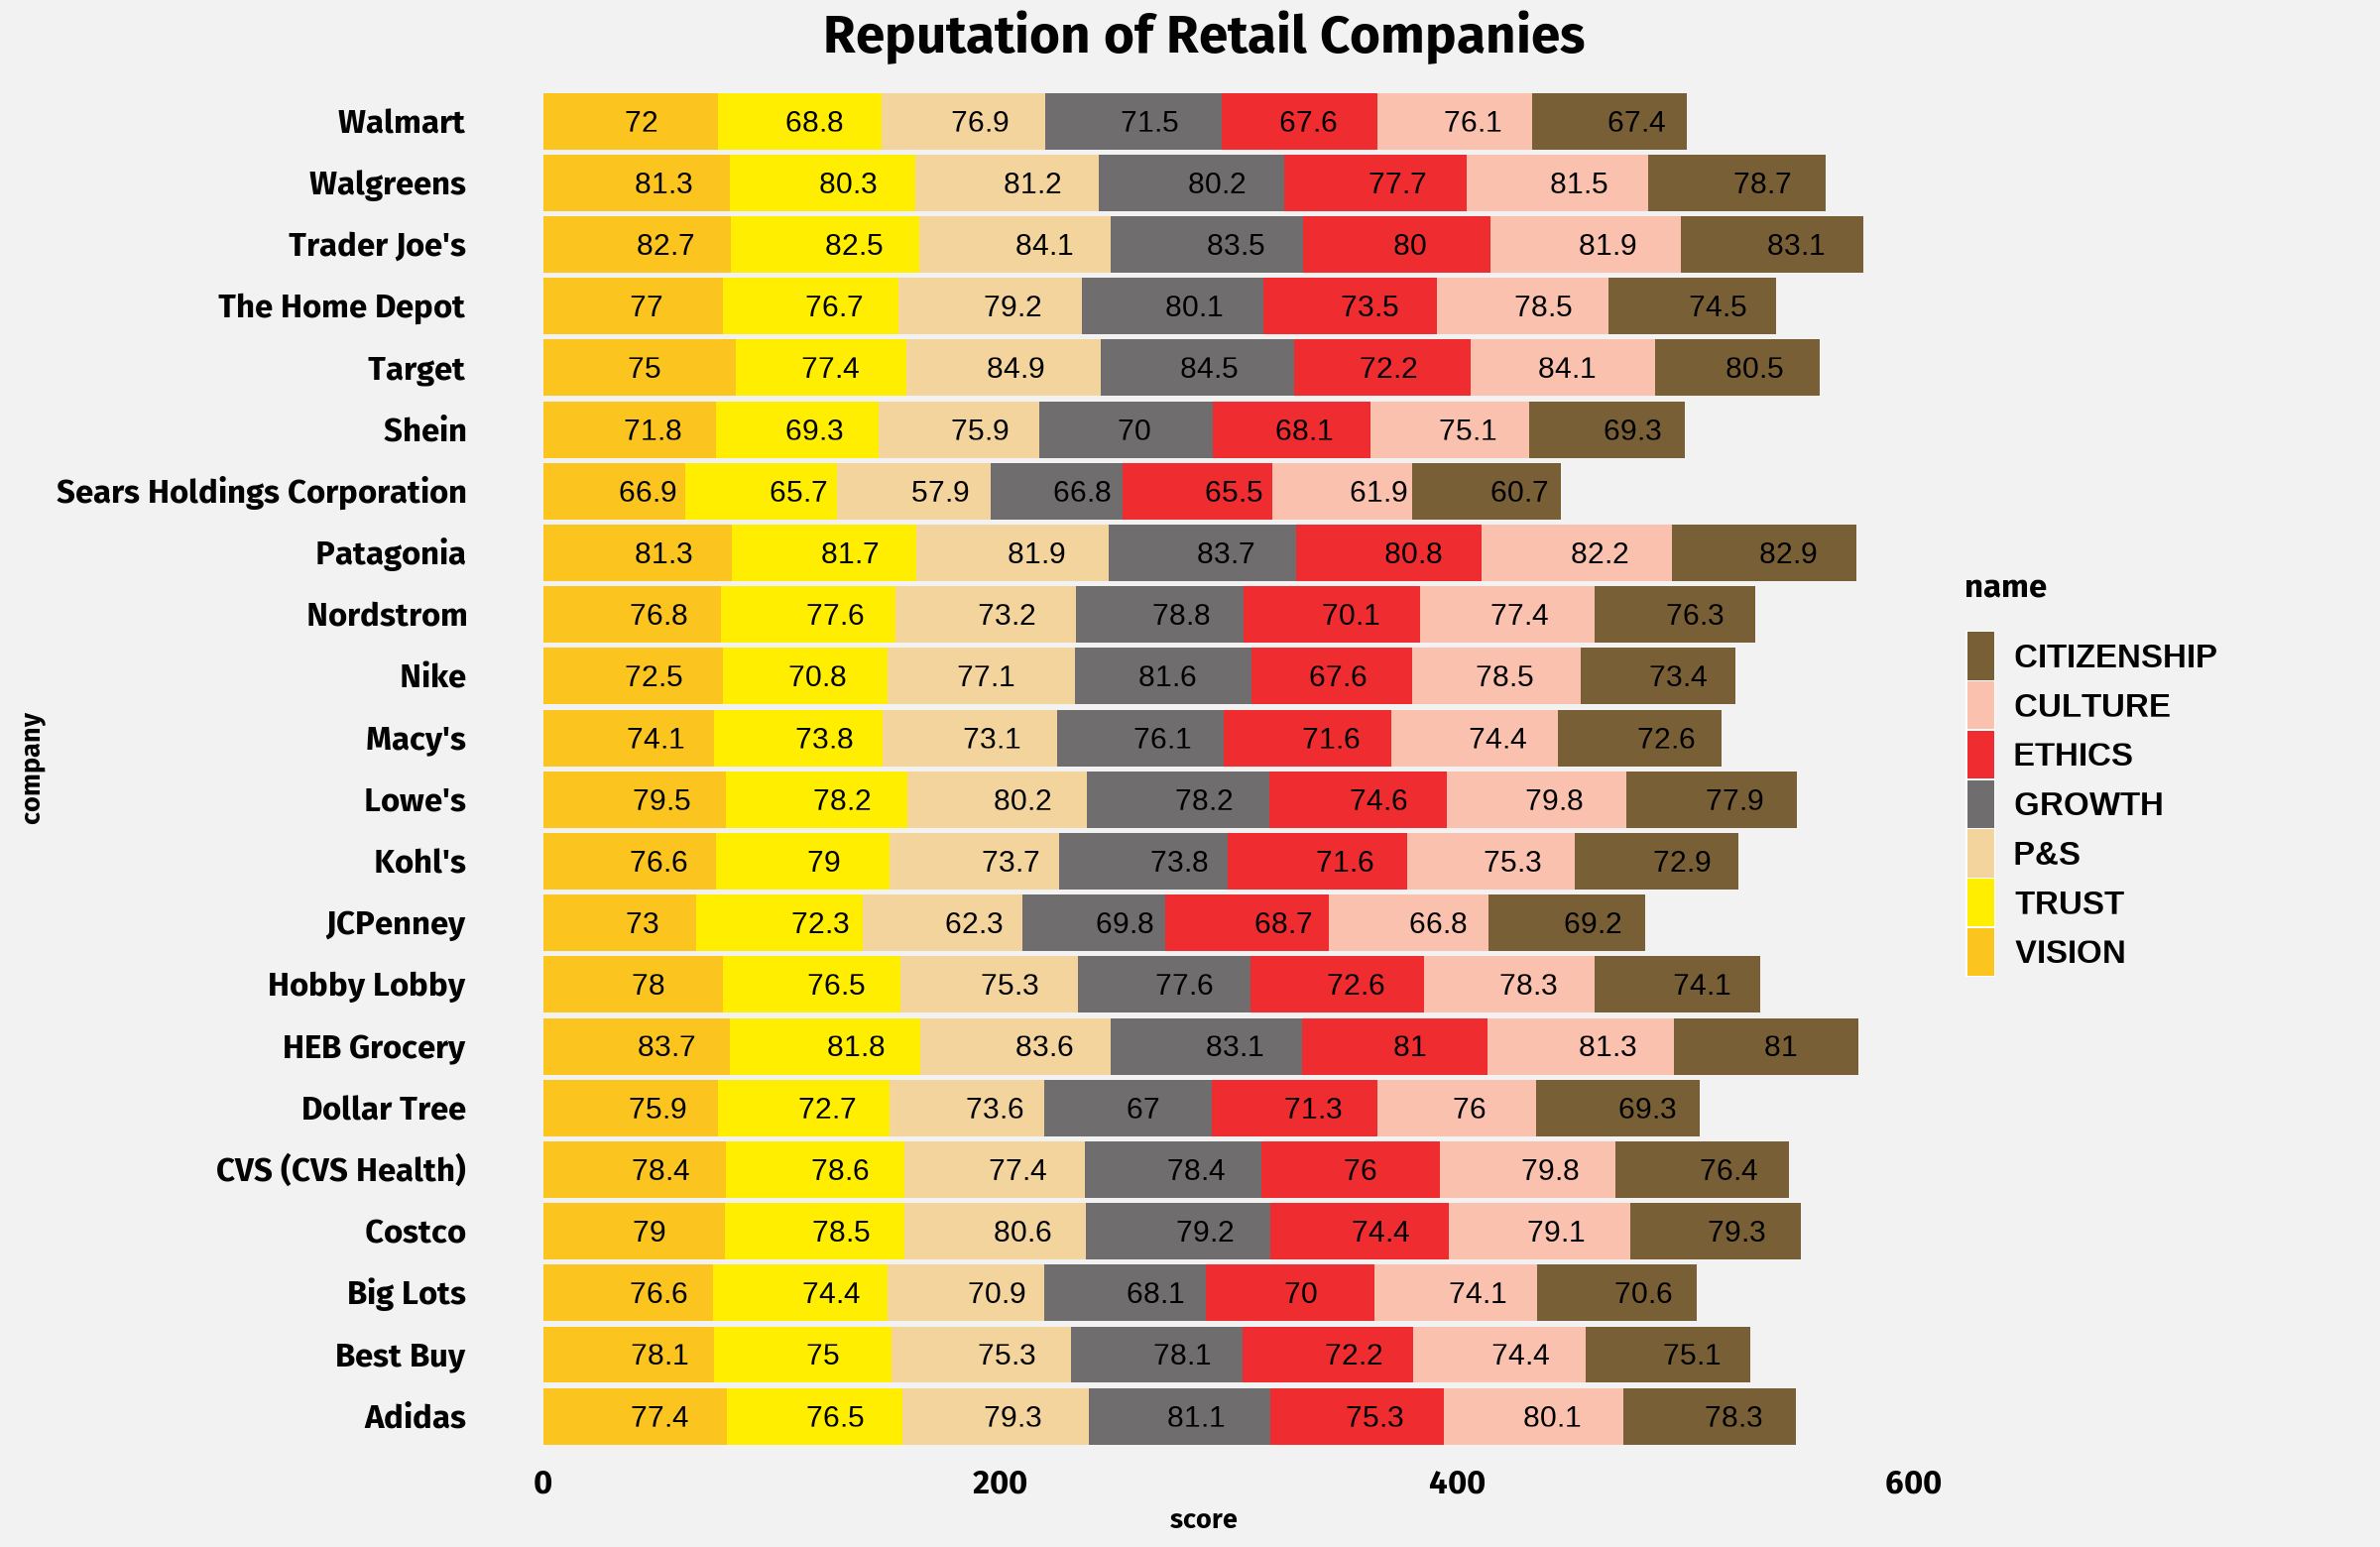

In [121]:
reputation %>%
filter(industry == 'Retail')%>%
group_by(company)%>%
mutate(pos = cumsum(score) - score/2) %>% 
ggplot() +
geom_bar(aes(x=company, y=score, fill = name),stat = "identity") +
geom_text(aes(x=company, y=pos, label = prettyNum(score,big.mark = ","))
              , vjust = 0.5,hjust = 0.01,  size = 8) +
scale_y_continuous(labels = scales::comma) +
scale_fill_paletteer_d("khroma::soil") +
coord_flip()+
my_theme()+
labs(title = "Reputation of Retail Companies")

# Reputation of Food and Beverage Companies

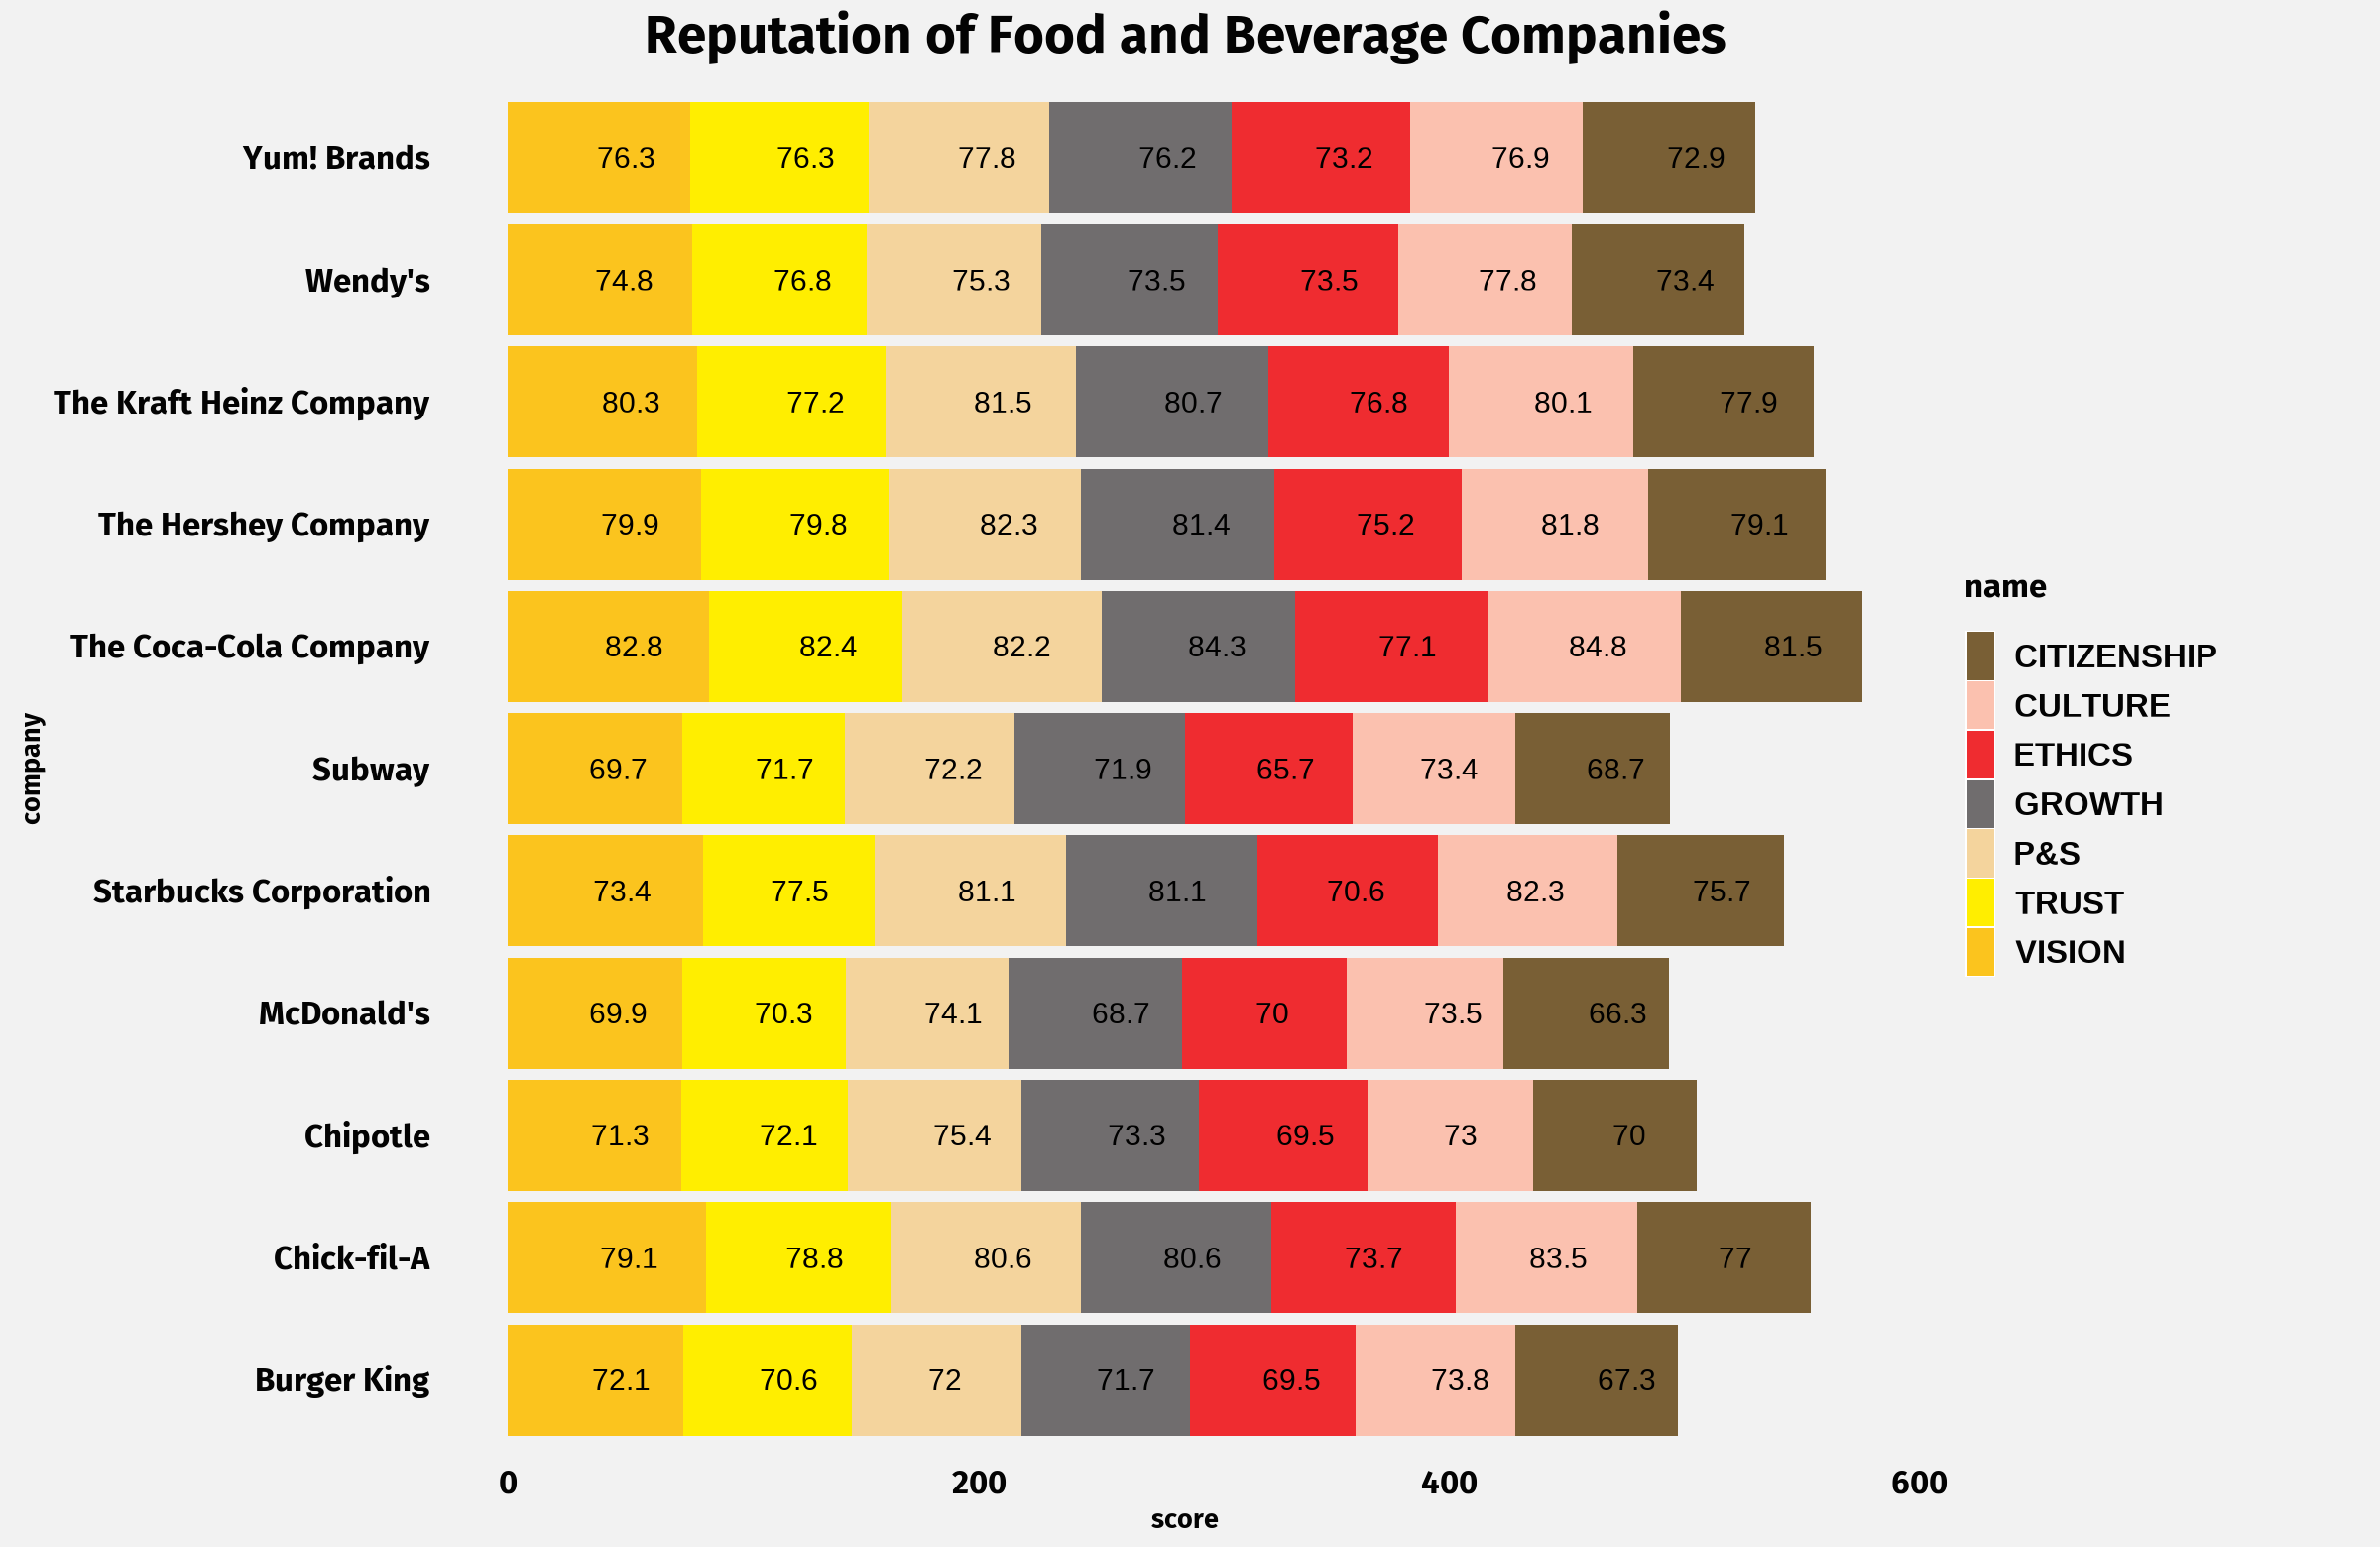

In [122]:
reputation %>%
filter(industry == 'Food & Beverage')%>%
group_by(company)%>%
mutate(pos = cumsum(score) - score/2) %>% 
ggplot() +
geom_bar(aes(x=company, y=score, fill = name),stat = "identity") +
geom_text(aes(x=company, y=pos, label = prettyNum(score,big.mark = ","))
              , vjust = 0.5,hjust = 0.01,  size = 8) +
scale_y_continuous(labels = scales::comma) +
scale_fill_paletteer_d("khroma::soil") +
coord_flip()+
my_theme()+
labs(title = "Reputation of Food and Beverage Companies")

# Reputation of Financial Services Companies

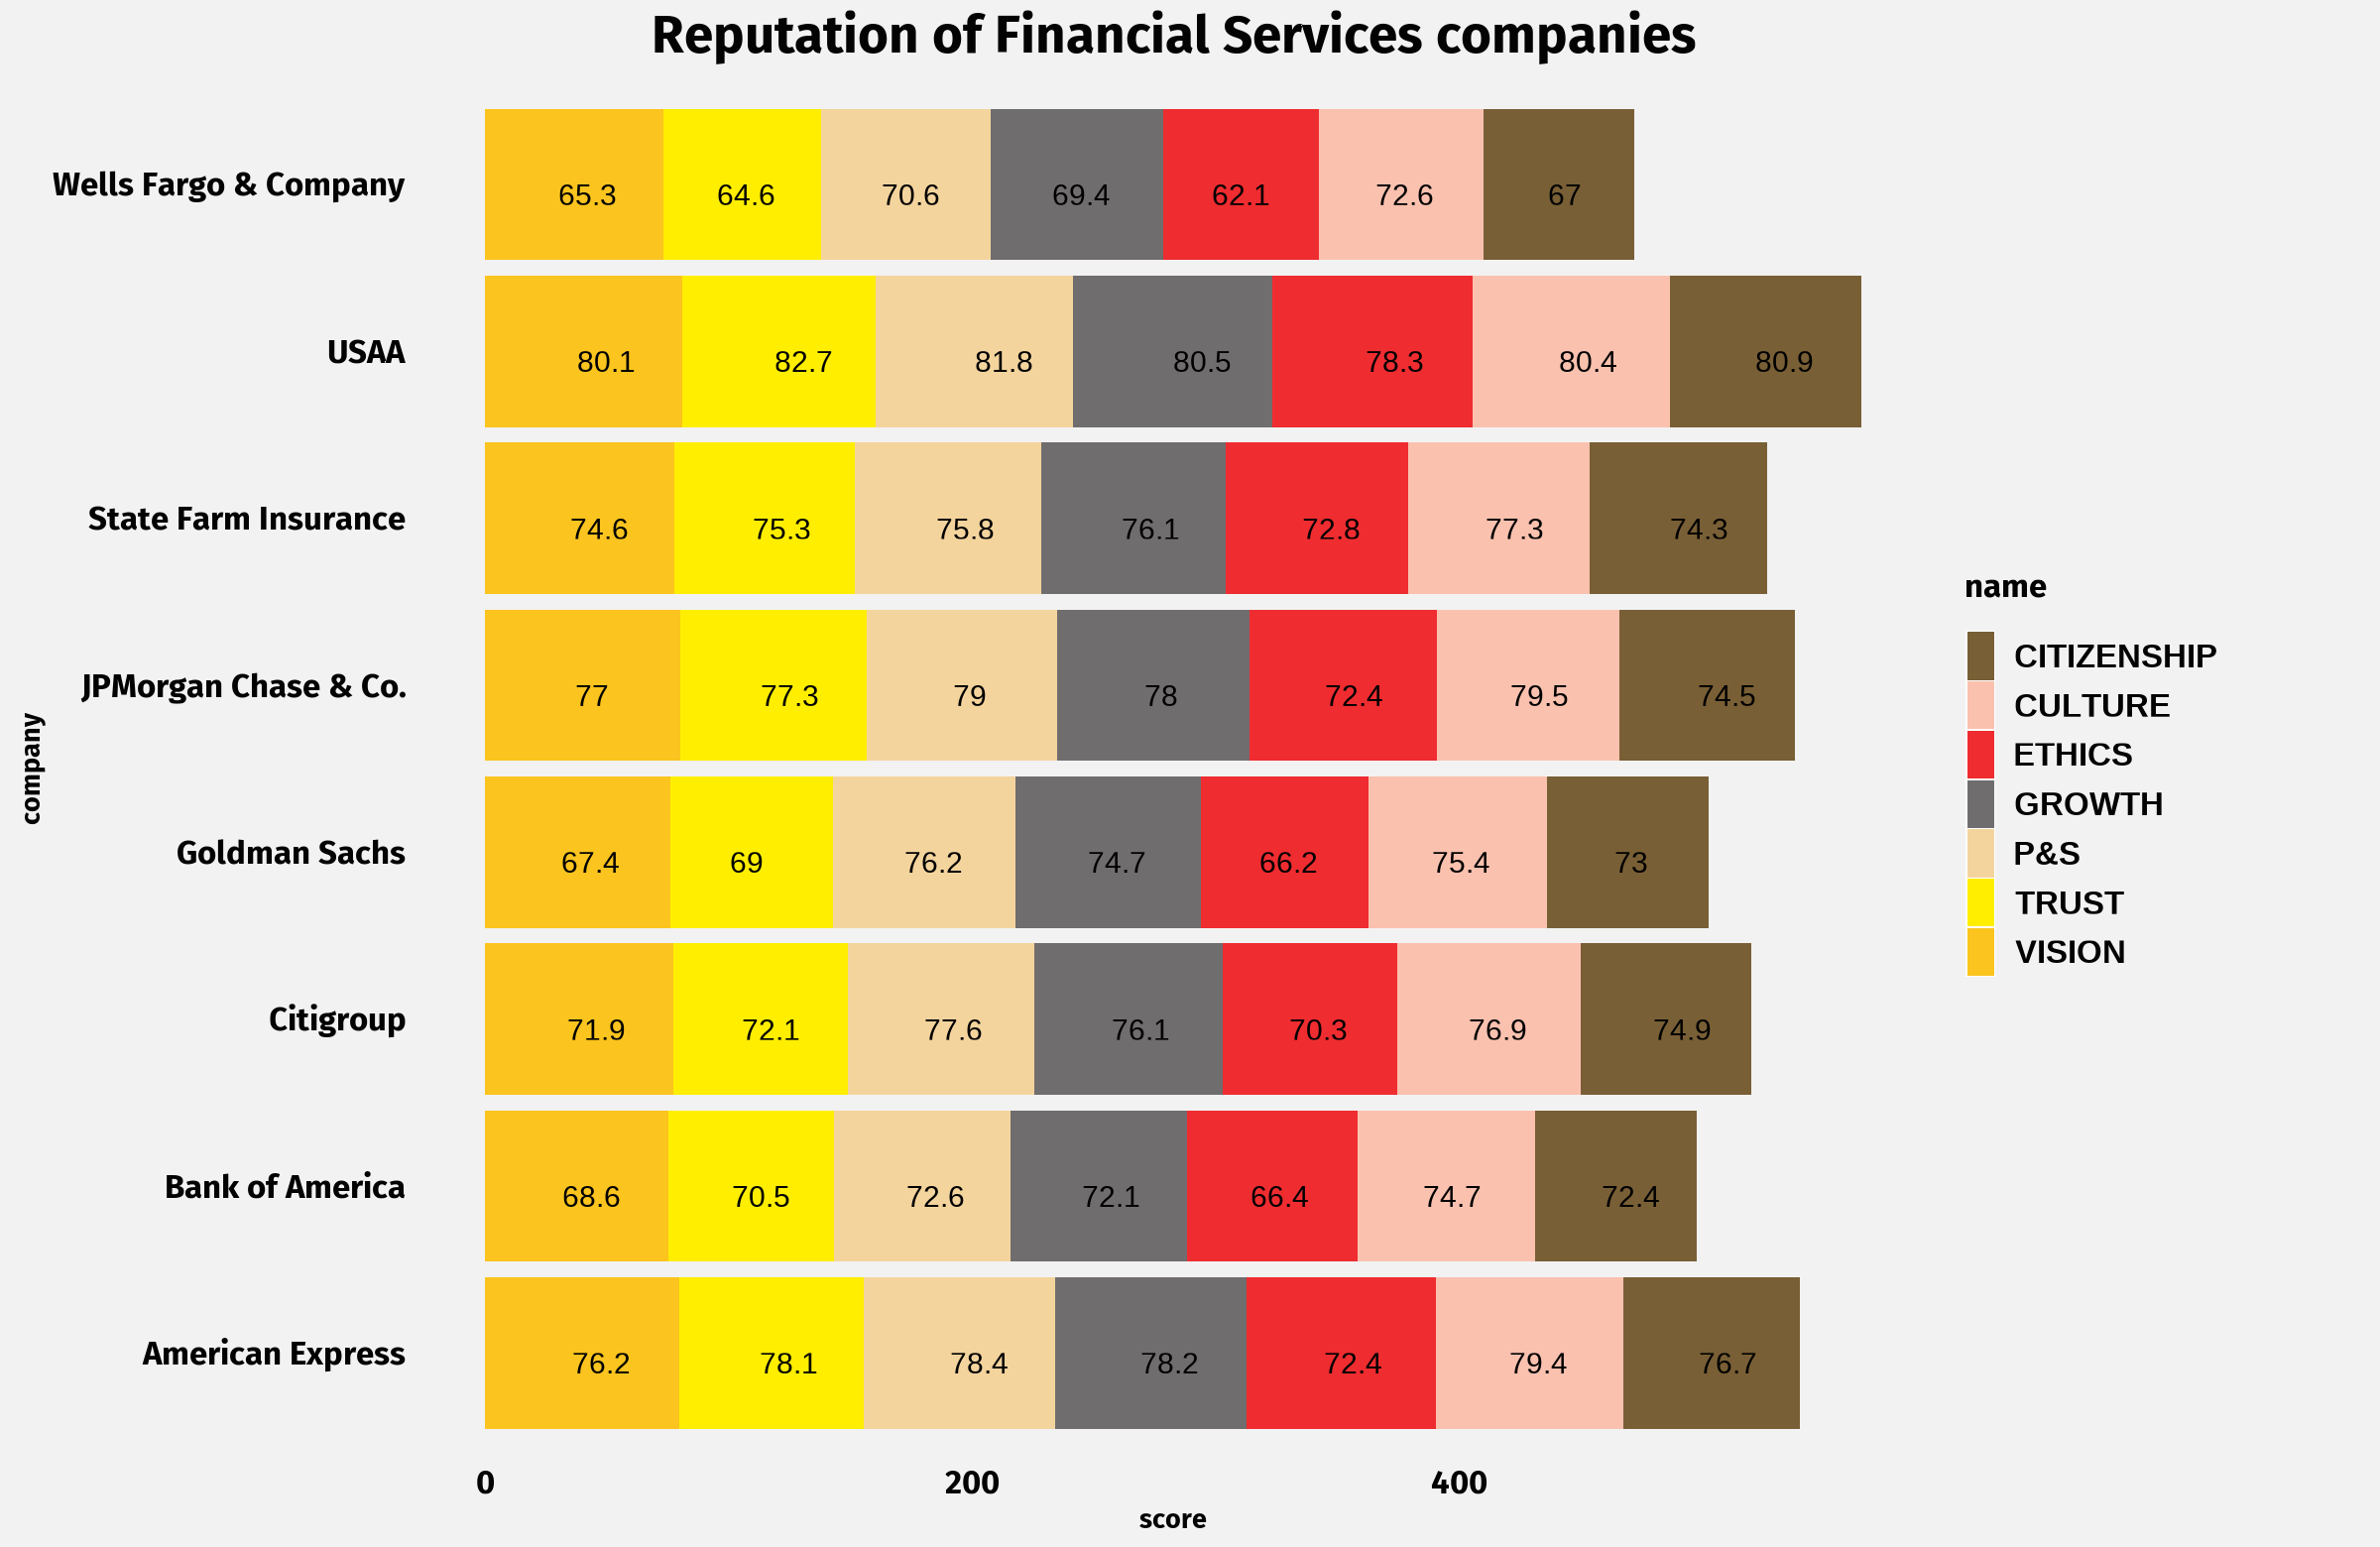

In [123]:
reputation %>%
filter(industry == 'Financial Services')%>%
group_by(company)%>%
mutate(pos = cumsum(score) - score/2) %>% 
ggplot() +
geom_bar(aes(x=company, y=score, fill = name),stat = "identity") +
geom_text(aes(x=company, y=pos, label = prettyNum(score,big.mark = ","))
              , vjust = 1,hjust = 0.1,  size = 8) +
scale_y_continuous(labels = scales::comma) +
scale_fill_paletteer_d("khroma::soil") +
coord_flip()+
my_theme()+
labs(title = "Reputation of Financial Services companies")